In [58]:
import pandas as pd
file_path = '../MONDO_0004975_associations_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Step 2: Check column names to confirm correct p-value column
print(df.columns)

# Step 3: Filter SNPs with p-value < 1e-8
filtered_df = df[df['pValue'] < 1e-4]

# Step 4: Keep only variantId ending with -A, -T, -C, or -G (exclude -?)
filtered_df = filtered_df[filtered_df['riskAllele'].str.match(r'^rs\d+-[ATCG]$', na=False)]
#convert - to _
filtered_df['riskAllele'] = filtered_df['riskAllele'].str.replace('-', '_')
print(filtered_df['riskAllele'].head())
p_value5_id = filtered_df['riskAllele'].tolist()
# Step 5: Print the first 5 SNPs with p-value < 1e-8
print("SNPs with p-value < 1e-8:")
for snp in p_value5_id:
    print(snp)

Index(['riskAllele', 'pValue', 'pValueAnnotation', 'riskFrequency', 'orValue',
       'beta', 'ci', 'mappedGenes', 'traitName', 'efoTraits', 'bgTraits',
       'accessionId', 'locations', 'pubmedId', 'author'],
      dtype='object')
1     rs8077028_T
2     rs2244526_T
3    rs17022021_T
4     rs1034435_A
5     rs4760243_A
Name: riskAllele, dtype: object
SNPs with p-value < 1e-8:
rs8077028_T
rs2244526_T
rs17022021_T
rs1034435_A
rs4760243_A
rs7260181_T
rs12716755_A
rs3820443_T
rs846858_A
rs5771225_T
rs7313581_T
rs2699450_A
rs6945197_T
rs184992198_T
rs115972394_A
rs73215707_T
rs79926713_T
rs73732514_A
rs62177277_T
rs73681522_A
rs2234017_C
rs147597631_T
rs145848414_A
rs147985478_A
rs116050881_T
rs186542490_A
rs186076999_T
rs141521929_T
rs73865608_A
rs184614511_T
rs193129245_A
rs150061627_T
rs190457471_A
rs141387448_T
rs117760708_T
rs187423924_A
rs181634374_T
rs145228677_C
rs188699384_A
rs148003968_A
rs185867524_A
rs117756856_A
rs184457411_A
rs180751169_T
rs188392327_A
rs192232892_T
rs149839

In [59]:
import pandas as pd
data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)

In [60]:
len(data_with_no_filtering.columns)

592538

In [61]:
id_of_pvalue5 = []
for col in data_with_no_filtering.columns:
    if col in p_value5_id:
        print(col, "is in the list")
        id_of_pvalue5.append(col)
print(id_of_pvalue5)


rs4255357_G is in the list
rs2970989_T is in the list
rs1552244_A is in the list
rs17022021_T is in the list
rs9832461_A is in the list
rs17785248_A is in the list
rs4974424_A is in the list
rs1923775_T is in the list
rs1448284_T is in the list
rs10012882_T is in the list
rs13178362_T is in the list
rs29745_A is in the list
rs6882046_A is in the list
rs543844_A is in the list
rs9381563_T is in the list
rs2718058_A is in the list
rs11771145_G is in the list
rs7016182_C is in the list
rs956225_A is in the list
rs474951_T is in the list
rs7155434_A is in the list
rs10498633_G is in the list
rs2456930_G is in the list
rs8049439_T is in the list
rs450674_T is in the list
rs16973424_A is in the list
rs440277_G is in the list
rs8106922_A is in the list
rs5167_T is in the list
['rs4255357_G', 'rs2970989_T', 'rs1552244_A', 'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A', 'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T', 'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs93815

In [62]:
# read the data again with the selected columns and first 6 columns of data and first 5 rows
metadata_cols = ['IID', 'SEX', 'PHENOTYPE',]

# Combine metadata columns with your filtered SNP rsIDs
columns_to_use = metadata_cols + id_of_pvalue5

# Read only those columns (first 5 + selected SNPs) and first 5 rows
data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


In [63]:
#caclulate missing values of every column
missing_values = data_with_filtering.isnull().sum()
# Print the missing values
print("Missing values in each column:")
print(missing_values)
#see the minimum and median and maximum of the data


Missing values in each column:
IID             0
SEX             0
PHENOTYPE       0
rs4255357_G     7
rs2970989_T     0
rs1552244_A     0
rs17022021_T    0
rs9832461_A     0
rs17785248_A    4
rs4974424_A     2
rs1923775_T     0
rs1448284_T     0
rs10012882_T    2
rs13178362_T    1
rs29745_A       1
rs6882046_A     2
rs543844_A      0
rs9381563_T     9
rs2718058_A     1
rs11771145_G    0
rs7016182_C     0
rs956225_A      0
rs474951_T      1
rs7155434_A     2
rs10498633_G    0
rs2456930_G     1
rs8049439_T     0
rs450674_T      0
rs16973424_A    1
rs440277_G      0
rs8106922_A     0
rs5167_T        0
dtype: int64


In [64]:
# Load ADNIMERGE
adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')

# Filter to baseline diagnoses
adni_dx = adni_merge[adni_merge['VISCODE'] == 'bl'][['RID', 'DX']]

# Extract RID from IID if needed (only if IID is like '014_S_0520')
data_with_filtering['RID'] = data_with_filtering['IID'].str.extract(r'_(\d+)$')[0].astype(int)

# Merge DX into your dataset
data_with_filtering = data_with_filtering.merge(adni_dx, on='RID', how='left')

# Drop RID if no longer needed
data_with_filtering.drop(columns=['RID'], inplace=True)

# Check merge result
print("Missing DX labels:", data_with_filtering['DX'].isna().sum())

Missing DX labels: 0


In [65]:
print(data_with_filtering.columns)


Index(['IID', 'SEX', 'PHENOTYPE', 'rs4255357_G', 'rs2970989_T', 'rs1552244_A',
       'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A',
       'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T',
       'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs9381563_T', 'rs2718058_A',
       'rs11771145_G', 'rs7016182_C', 'rs956225_A', 'rs474951_T',
       'rs7155434_A', 'rs10498633_G', 'rs2456930_G', 'rs8049439_T',
       'rs450674_T', 'rs16973424_A', 'rs440277_G', 'rs8106922_A', 'rs5167_T',
       'DX'],
      dtype='object')


In [66]:
columns_to_remove = [ 'IID','SEX','PHENOTYPE']  # Adjust the list based on your data

# Drop the specified columns
data_cleaned_with_just_dx_and_snp = data_with_filtering.drop(columns=columns_to_remove)
#convert data_cleaned_with_just_dx_and_snp to file

In [67]:
# Fill missing values with mode for all columns except 'DX'
for column in data_cleaned_with_just_dx_and_snp.columns:
    if column != 'DX':
        mode_value = data_cleaned_with_just_dx_and_snp[column].mode()[0]
        data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)

In [68]:
# Map DX values to numerical values
dx_mapping = {'CN': 0, 'MCI': 0, 'Dementia': 1}
data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)

In [69]:
print(data_cleaned_with_just_dx_and_snp['DX'].value_counts())

DX
0    577
1    180
Name: count, dtype: int64


In [70]:
#change all float64 columns to int64
for column in data_cleaned_with_just_dx_and_snp.columns:
    if data_cleaned_with_just_dx_and_snp[column].dtype == 'float64':
        data_cleaned_with_just_dx_and_snp[column] = data_cleaned_with_just_dx_and_snp[column].astype('int64')
#save the data_cleaned_with_just_dx_and_snp to a file

In [71]:
# train and test split
from sklearn.model_selection import train_test_split
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

Original distribution: Counter({0: 577, 1: 180})
Resampled distribution: Counter({1: 513, 0: 180})
Train distribution: Counter({1: 410, 0: 144})
Test distribution: Counter({1: 103, 0: 36})

=== Running: Logistic Regression ===
Best Parameters: {'clf__C': 10}


=== Evaluating: Logistic Regression ===
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC:                 0.1440
ROC AUC Score:       0.7818
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        36
           1       0.75      1.00      0.85       103

    accuracy                           0.75       139
   macro avg       0.87      0.51      0.45       139
weighted avg       0.81      0.75      0.65       139


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC

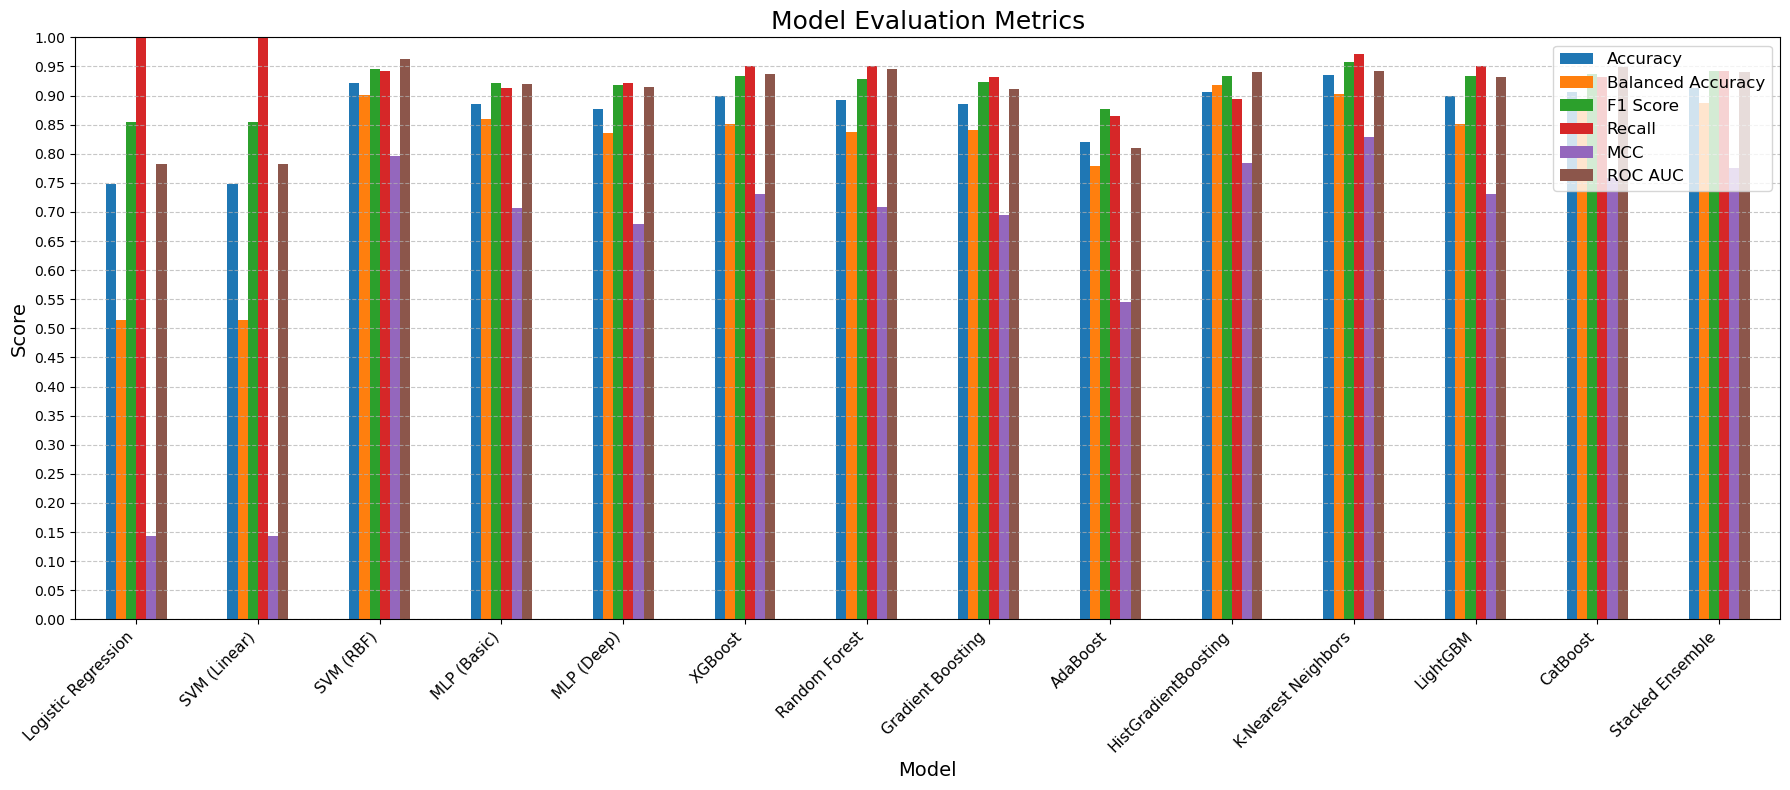

In [75]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from collections import Counter

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Imbalanced-learn
from imblearn.combine import SMOTEENN

# Boosting libs
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Helper: Best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    bacc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bacc:.4f}")
    print(f"F1 Score:            {f1:.4f}")
    print(f"Recall (Sensitivity):{recall:.4f}")
    print(f"MCC:                 {mcc:.4f}")
    print(f"ROC AUC Score:       {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    return {
        "Accuracy": acc,
        "Balanced Accuracy": bacc,
        "F1 Score": f1,
        "Recall": recall,
        "MCC": mcc,
        "ROC AUC": auc
    }

# ---------------------
# Load your SNP dataset
# ---------------------
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values

# ---------------------
# Data Augmentation BEFORE Split
# ---------------------
sampler = SMOTEENN(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

print("Original distribution:", Counter(y))
print("Resampled distribution:", Counter(y_resampled))

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# ---------------------
# Models + Pipelines
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Optional: Basic tuning for some models
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
}

# ---------------------
# Run all models and store metrics
# ---------------------
results = {}

for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    if name in param_grid:
        grid = GridSearchCV(pipe, param_grid[name], cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Parameters:", grid.best_params_)
    else:
        best_model = pipe 

    metrics = evaluate_model(name, best_model, X_train, y_train, X_test, y_test)
    results[name] = metrics

# ---------------------
# Plotting metrics
# ---------------------
df_results = pd.DataFrame(results).T

plot_metrics = ["Accuracy", "Balanced Accuracy", "F1 Score", "Recall", "MCC", "ROC AUC"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax = plt.subplots(figsize=(18, 8))
df_results[plot_metrics].plot(kind='bar', ax=ax, color=colors)

ax.set_title("Model Evaluation Metrics", fontsize=18)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=11)
ax.legend(loc="upper right", fontsize=12)

# Set y-axis ticks and format
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.05))  # Add this line for 0.05 increments
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

ax.grid(True, linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()


In [72]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from collections import Counter

# Sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Imbalanced-learn
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Boosting libs
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Helper: Best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]

    threshold = find_best_threshold(y_test, y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# ---------------------
# Load your SNP dataset
# ---------------------
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values

# ---------------------
# Data Augmentation BEFORE Split
# ---------------------
sampler = SMOTEENN(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

print("Original distribution:", Counter(y))
print("Resampled distribution:", Counter(y_resampled))

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# ---------------------
# Models + Pipelines
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Optional: Basic tuning for some models
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
}

# ---------------------
# Run all models
# ---------------------
for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    if name in param_grid:
        grid = GridSearchCV(pipe, param_grid[name], cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Parameters:", grid.best_params_)
    else:
        best_model = pipe 

    evaluate_model(name, best_model, X_train, y_train, X_test, y_test)



Original distribution: Counter({0: 577, 1: 180})
Resampled distribution: Counter({1: 513, 0: 180})
Train distribution: Counter({1: 410, 0: 144})
Test distribution: Counter({1: 103, 0: 36})

=== Running: Logistic Regression ===
Best Parameters: {'clf__C': 10}


=== Evaluating: Logistic Regression ===
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC:                 0.1440
ROC AUC Score:       0.7818
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        36
           1       0.75      1.00      0.85       103

    accuracy                           0.75       139
   macro avg       0.87      0.51      0.45       139
weighted avg       0.81      0.75      0.65       139


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC

In [73]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from collections import Counter

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Imbalanced-learn
from imblearn.combine import SMOTEENN

# Boosting libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Helper: Best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_split(name, model, X, y, split_name="Test"):
    y_proba = model.predict_proba(X)[:, 1]
    threshold = find_best_threshold(y, y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    print(f"\n--- {split_name} Set Evaluation ({name}) ---")
    print(f"Accuracy:            {accuracy_score(y, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y, y_pred):.4f}")
    print(f"F1 Score:            {f1_score(y, y_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y, y_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y, y_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y, y_pred, zero_division=0))

# ---------------------
# Load Data
# ---------------------
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values

# ---------------------
# Apply SMOTEENN BEFORE split
# ---------------------
sampler = SMOTEENN(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

print("Original distribution:", Counter(y))
print("Resampled distribution:", Counter(y_resampled))

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# ---------------------
# Models + Pipelines
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Optional: Basic tuning for some models
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
}

# ---------------------
# Run models
# ---------------------
for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    if name in param_grid:
        grid = GridSearchCV(pipe, param_grid[name], cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Parameters:", grid.best_params_)
    else:
        best_model = pipe
        best_model.fit(X_train, y_train)

    # Evaluate separately
    evaluate_split(name, best_model, X_train, y_train, split_name="Train")
    evaluate_split(name, best_model, X_test, y_test, split_name="Test")


Original distribution: Counter({0: 577, 1: 180})
Resampled distribution: Counter({1: 513, 0: 180})
Train distribution: Counter({1: 410, 0: 144})
Test distribution: Counter({1: 103, 0: 36})

=== Running: Logistic Regression ===
Best Parameters: {'clf__C': 10}

--- Train Set Evaluation (Logistic Regression) ---
Accuracy:            0.8394
Balanced Accuracy:   0.7608
F1 Score:            0.8949
Recall (Sensitivity):0.9244
MCC:                 0.5605
ROC AUC Score:       0.8738
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       144
           1       0.87      0.92      0.89       410

    accuracy                           0.84       554
   macro avg       0.80      0.76      0.78       554
weighted avg       0.83      0.84      0.83       554


--- Test Set Evaluation (Logistic Regression) ---
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC:    

In [36]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, matthews_corrcoef, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek  # UPDATED FROM SMOTEENN

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

# Load your dataset
# X, y = ...

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=87)
print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# Sampler
sampler = SMOTETomek(random_state=42)

# Stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Base models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Param grid for grid search
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
    "MLP (Basic)": {'clf__alpha': [0.0001, 0.001], 'clf__hidden_layer_sizes': [(64,), (128,)]},
    "MLP (Deep)": {'clf__alpha': [0.0005, 0.001], 'clf__hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)]},
    "XGBoost": {'clf__n_estimators': [100, 200], 'clf__max_depth': [3, 5, 7]},
    "Gradient Boosting": {'clf__n_estimators': [100, 200], 'clf__learning_rate': [0.05, 0.1]},
    "AdaBoost": {'clf__n_estimators': [50, 100], 'clf__learning_rate': [0.5, 1.0]},
    "K-Nearest Neighbors": {'clf__n_neighbors': [3, 5, 7]},
    "LightGBM": {'clf__num_leaves': [31, 64], 'clf__learning_rate': [0.05, 0.1]},
    "CatBoost": {'clf__depth': [4, 6], 'clf__learning_rate': [0.03, 0.1]}
}

# Evaluation function
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n=== Evaluating: {name} ===")
    print("Accuracy:            {:.4f}".format(accuracy_score(y_test, y_pred)))
    print("Balanced Accuracy:   {:.4f}".format(balanced_accuracy_score(y_test, y_pred)))
    print("F1 Score:            {:.4f}".format(f1_score(y_test, y_pred)))
    print("Recall (Sensitivity):{:.4f}".format(recall_score(y_test, y_pred)))
    print("MCC:                 {:.4f}".format(matthews_corrcoef(y_test, y_pred)))
    if y_proba is not None:
        print("ROC AUC Score:       {:.4f}".format(roc_auc_score(y_test, y_proba)))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Run all models
for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")

    pipe = ImbPipeline([
        ('sampler', sampler),
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    if name in param_grid:
        grid = GridSearchCV(
            pipe,
            param_grid[name],
            cv=stratified_cv,
            scoring={'f1': 'f1', 'balanced_accuracy': 'balanced_accuracy'},
            refit='f1',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Parameters:", grid.best_params_)
    else:
        best_model = pipe
        best_model.fit(X_train, y_train)

    evaluate_model(name, best_model, X_train, y_train, X_test, y_test)


Train distribution: Counter({0: 432, 1: 135})
Test distribution: Counter({0: 145, 1: 45})

=== Running: Logistic Regression ===
Best Parameters: {'clf__C': 1}

=== Evaluating: Logistic Regression ===
Accuracy:            0.6158
Balanced Accuracy:   0.5261
F1 Score:            0.3048
Recall (Sensitivity):0.3556
MCC:                 0.0477
ROC AUC Score:       0.5065
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.73       145
           1       0.27      0.36      0.30        45

    accuracy                           0.62       190
   macro avg       0.52      0.53      0.52       190
weighted avg       0.66      0.62      0.63       190


=== Running: SVM (Linear) ===

=== Evaluating: SVM (Linear) ===
Accuracy:            0.5947
Balanced Accuracy:   0.5123
F1 Score:            0.2936
Recall (Sensitivity):0.3556
MCC:                 0.0221
ROC AUC Score:       0.4999
Classification Report:
               precision 


====================== RANDOM STATE: 42 ======================
Train distribution: Counter({0: 432, 1: 135})
Test distribution: Counter({0: 145, 1: 45})

>>> Training: Logistic Regression
Best Parameters: {'clf__C': 0.1}

--- Evaluation: Logistic Regression ---
Accuracy:            0.6000
Balanced Accuracy:   0.4467
F1 Score:            0.1556
Recall (Sensitivity):0.1556
MCC:                 -0.1065
ROC AUC Score:       0.5182
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       145
           1       0.16      0.16      0.16        45

    accuracy                           0.60       190
   macro avg       0.45      0.45      0.45       190
weighted avg       0.60      0.60      0.60       190



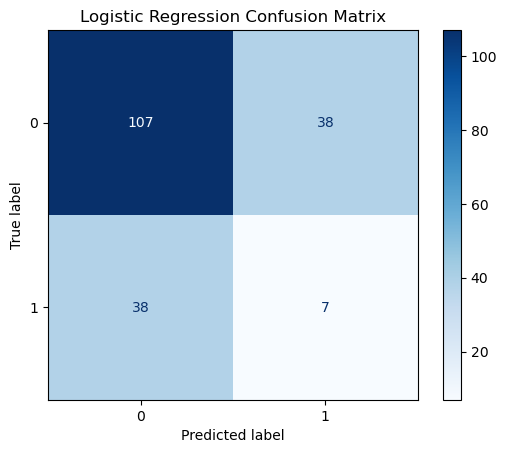


>>> Training: SVM (Linear)

--- Evaluation: SVM (Linear) ---
Accuracy:            0.6368
Balanced Accuracy:   0.4862
F1 Score:            0.2069
Recall (Sensitivity):0.2000
MCC:                 -0.0283
ROC AUC Score:       0.5212
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       145
           1       0.21      0.20      0.21        45

    accuracy                           0.64       190
   macro avg       0.49      0.49      0.49       190
weighted avg       0.63      0.64      0.63       190



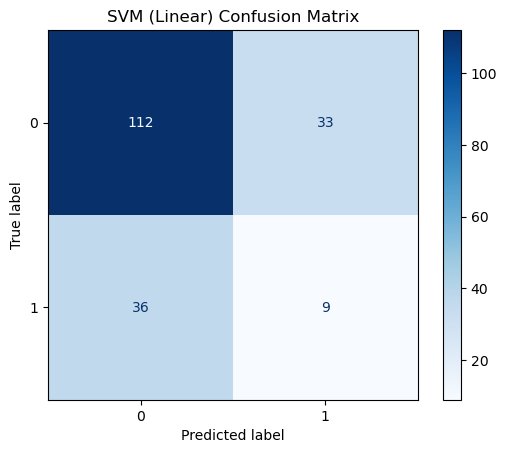


>>> Training: SVM (RBF)
Best Parameters: {'clf__C': 10, 'clf__gamma': 'scale'}

--- Evaluation: SVM (RBF) ---
Accuracy:            0.6842
Balanced Accuracy:   0.5019
F1 Score:            0.1892
Recall (Sensitivity):0.1556
MCC:                 0.0045
ROC AUC Score:       0.5480
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       145
           1       0.24      0.16      0.19        45

    accuracy                           0.68       190
   macro avg       0.50      0.50      0.50       190
weighted avg       0.64      0.68      0.66       190



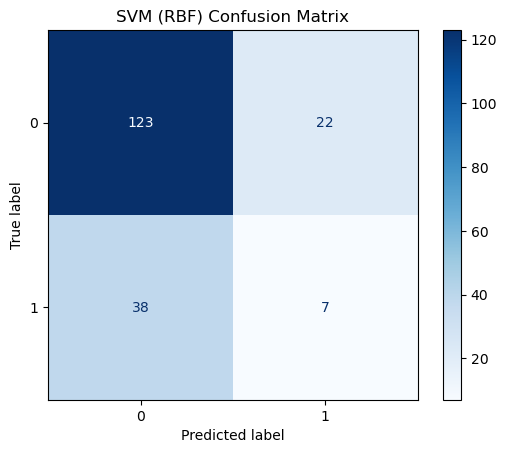


>>> Training: MLP (Basic)
Best Parameters: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (64,)}

--- Evaluation: MLP (Basic) ---
Accuracy:            0.6211
Balanced Accuracy:   0.4759
F1 Score:            0.2000
Recall (Sensitivity):0.2000
MCC:                 -0.0483
ROC AUC Score:       0.5186
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       145
           1       0.20      0.20      0.20        45

    accuracy                           0.62       190
   macro avg       0.48      0.48      0.48       190
weighted avg       0.62      0.62      0.62       190



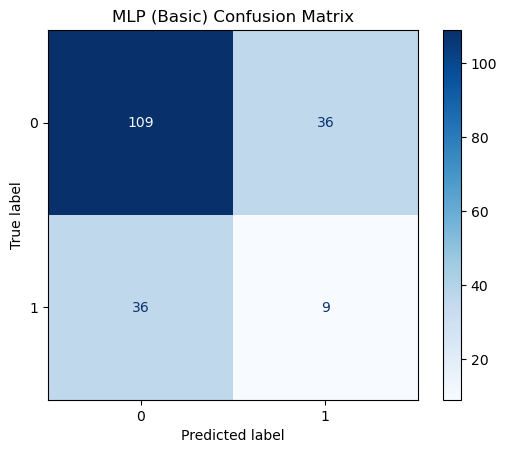


>>> Training: MLP (Deep)
Best Parameters: {'clf__alpha': 0.0005, 'clf__hidden_layer_sizes': (256, 128, 64)}

--- Evaluation: MLP (Deep) ---
Accuracy:            0.6632
Balanced Accuracy:   0.5034
F1 Score:            0.2195
Recall (Sensitivity):0.2000
MCC:                 0.0074
ROC AUC Score:       0.5036
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       145
           1       0.24      0.20      0.22        45

    accuracy                           0.66       190
   macro avg       0.50      0.50      0.50       190
weighted avg       0.64      0.66      0.65       190



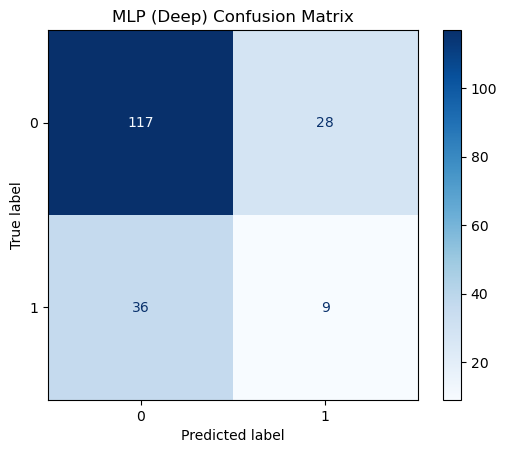


>>> Training: XGBoost
Best Parameters: {'clf__max_depth': 3, 'clf__n_estimators': 100}

--- Evaluation: XGBoost ---
Accuracy:            0.6579
Balanced Accuracy:   0.5153
F1 Score:            0.2529
Recall (Sensitivity):0.2444
MCC:                 0.0314
ROC AUC Score:       0.5428
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       145
           1       0.26      0.24      0.25        45

    accuracy                           0.66       190
   macro avg       0.52      0.52      0.52       190
weighted avg       0.65      0.66      0.65       190



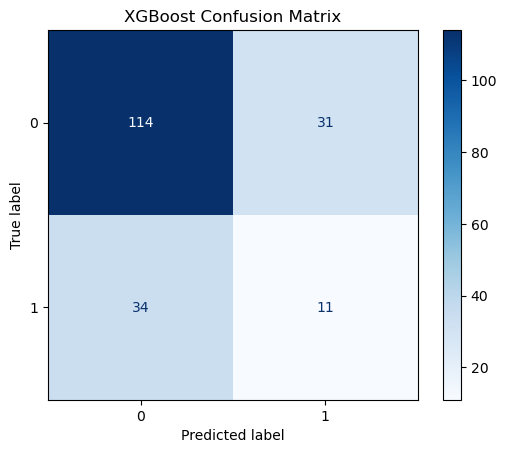


>>> Training: Random Forest
Best Parameters: {'clf__max_depth': None, 'clf__n_estimators': 100}

--- Evaluation: Random Forest ---
Accuracy:            0.7105
Balanced Accuracy:   0.4962
F1 Score:            0.1270
Recall (Sensitivity):0.0889
MCC:                 -0.0111
ROC AUC Score:       0.4864
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       145
           1       0.22      0.09      0.13        45

    accuracy                           0.71       190
   macro avg       0.49      0.50      0.48       190
weighted avg       0.63      0.71      0.66       190



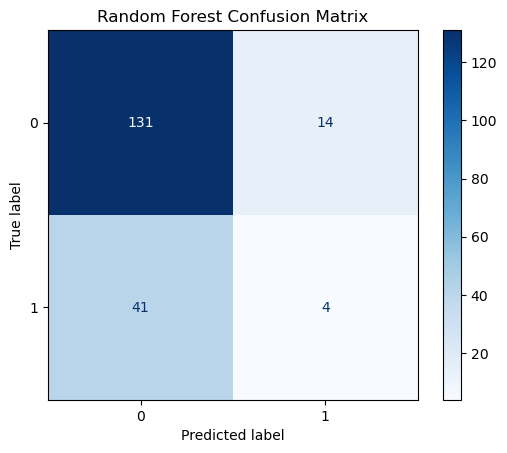


>>> Training: Gradient Boosting
Best Parameters: {'clf__learning_rate': 0.05, 'clf__n_estimators': 200}

--- Evaluation: Gradient Boosting ---
Accuracy:            0.6474
Balanced Accuracy:   0.5084
F1 Score:            0.2472
Recall (Sensitivity):0.2444
MCC:                 0.0170
ROC AUC Score:       0.5116
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       145
           1       0.25      0.24      0.25        45

    accuracy                           0.65       190
   macro avg       0.51      0.51      0.51       190
weighted avg       0.64      0.65      0.65       190



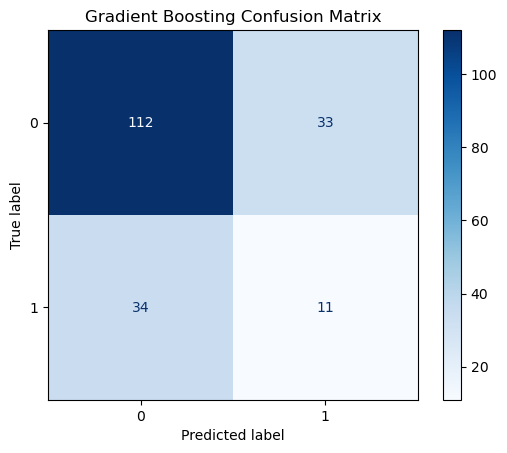


>>> Training: AdaBoost
Best Parameters: {'clf__learning_rate': 1.0, 'clf__n_estimators': 50}

--- Evaluation: AdaBoost ---
Accuracy:            0.6053
Balanced Accuracy:   0.4808
F1 Score:            0.2268
Recall (Sensitivity):0.2444
MCC:                 -0.0365
ROC AUC Score:       0.5114
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       145
           1       0.21      0.24      0.23        45

    accuracy                           0.61       190
   macro avg       0.48      0.48      0.48       190
weighted avg       0.63      0.61      0.61       190



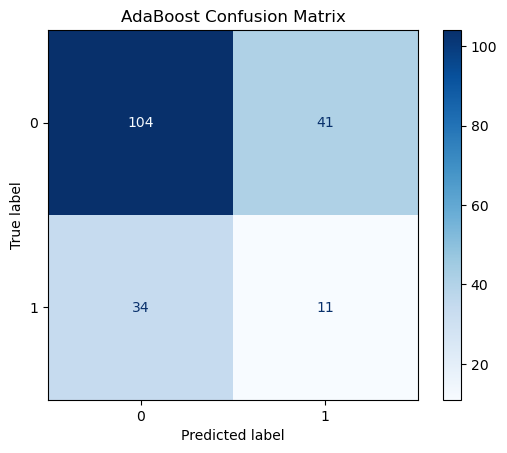


>>> Training: HistGradientBoosting

--- Evaluation: HistGradientBoosting ---
Accuracy:            0.6316
Balanced Accuracy:   0.5134
F1 Score:            0.2708
Recall (Sensitivity):0.2889
MCC:                 0.0257
ROC AUC Score:       0.5160
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       145
           1       0.25      0.29      0.27        45

    accuracy                           0.63       190
   macro avg       0.51      0.51      0.51       190
weighted avg       0.65      0.63      0.64       190



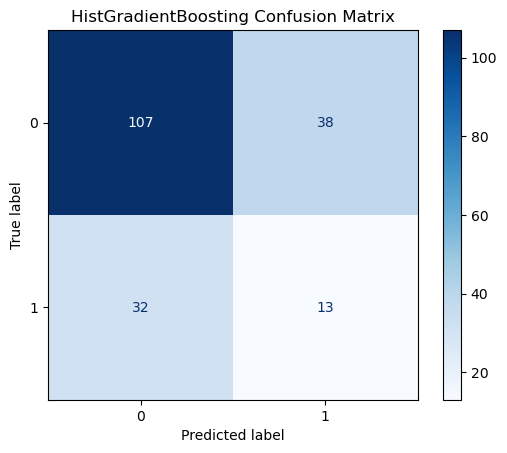


>>> Training: K-Nearest Neighbors
Best Parameters: {'clf__n_neighbors': 5}

--- Evaluation: K-Nearest Neighbors ---
Accuracy:            0.6158
Balanced Accuracy:   0.5720
F1 Score:            0.3761
Recall (Sensitivity):0.4889
MCC:                 0.1262
ROC AUC Score:       0.5760
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.72       145
           1       0.31      0.49      0.38        45

    accuracy                           0.62       190
   macro avg       0.56      0.57      0.55       190
weighted avg       0.69      0.62      0.64       190



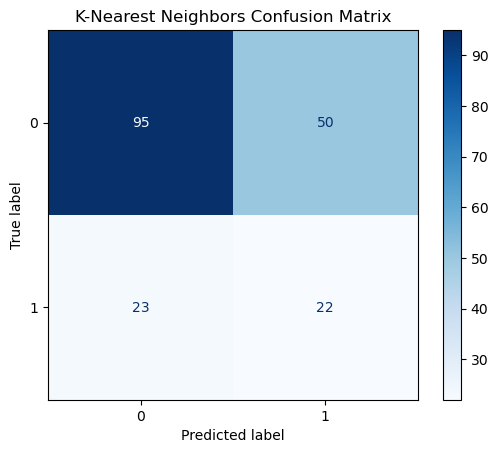


>>> Training: LightGBM
Best Parameters: {'clf__learning_rate': 0.05, 'clf__num_leaves': 31}

--- Evaluation: LightGBM ---
Accuracy:            0.6737
Balanced Accuracy:   0.4950
F1 Score:            0.1842
Recall (Sensitivity):0.1556
MCC:                 -0.0115
ROC AUC Score:       0.4861
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       145
           1       0.23      0.16      0.18        45

    accuracy                           0.67       190
   macro avg       0.49      0.50      0.49       190
weighted avg       0.63      0.67      0.65       190



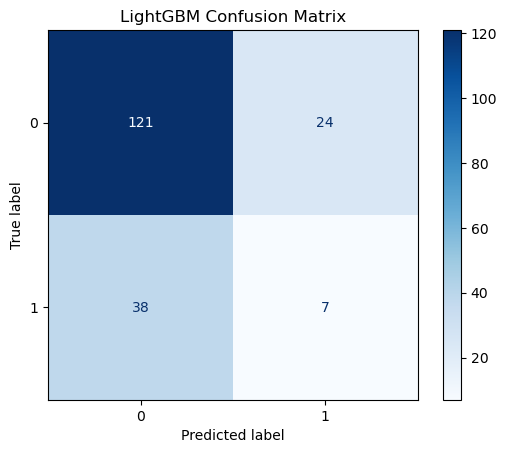


>>> Training: CatBoost


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estimator.fit(Xt, yt, **last_step_params["fit"])
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\catboost\core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\catboost\core.py", line 2321, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 6601, in _catboost._check_train_params
  File "_catboost.pyx", line 6623, in _catboost._check_train_params
_catboost.CatBoostError: catboost/private/libs/options/json_helper.h:41: Can't parse parameter "class_weights" with value: "Balanced"


In [38]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score, 
    matthews_corrcoef, roc_auc_score, classification_report, ConfusionMatrixDisplay
)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt

# Load your dataset
# X, y = ...

random_states = [42]

# Base models with class_weight where applicable
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced'),
    "CatBoost": CatBoostClassifier(verbose=0, class_weights='Balanced')
}

# Hyperparameter grid
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
    "MLP (Basic)": {'clf__alpha': [0.0001, 0.001], 'clf__hidden_layer_sizes': [(64,), (128,)]},
    "MLP (Deep)": {'clf__alpha': [0.0005, 0.001], 'clf__hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)]},
    "XGBoost": {'clf__n_estimators': [100, 200], 'clf__max_depth': [3, 5, 7]},
    "Gradient Boosting": {'clf__n_estimators': [100, 200], 'clf__learning_rate': [0.05, 0.1]},
    "AdaBoost": {'clf__n_estimators': [50, 100], 'clf__learning_rate': [0.5, 1.0]},
    "K-Nearest Neighbors": {'clf__n_neighbors': [3, 5, 7]},
    "LightGBM": {'clf__num_leaves': [31, 64], 'clf__learning_rate': [0.05, 0.1]},
    "CatBoost": {'clf__depth': [4, 6], 'clf__learning_rate': [0.03, 0.1]}
}

# Evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n--- Evaluation: {name} ---")
    print("Accuracy:            {:.4f}".format(accuracy_score(y_test, y_pred)))
    print("Balanced Accuracy:   {:.4f}".format(balanced_accuracy_score(y_test, y_pred)))
    print("F1 Score:            {:.4f}".format(f1_score(y_test, y_pred)))
    print("Recall (Sensitivity):{:.4f}".format(recall_score(y_test, y_pred)))
    print("MCC:                 {:.4f}".format(matthews_corrcoef(y_test, y_pred)))
    if y_proba is not None:
        print("ROC AUC Score:       {:.4f}".format(roc_auc_score(y_test, y_proba)))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Optional: plot confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f"{name} Confusion Matrix")
    plt.show()

# Loop over different random states
for seed in random_states:
    print(f"\n====================== RANDOM STATE: {seed} ======================")
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=seed)
    
    print("Train distribution:", Counter(y_train))
    print("Test distribution:", Counter(y_test))
    
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    sampler = ADASYN(random_state=seed)
    
    for name, model in base_models.items():
        print(f"\n>>> Training: {name}")
        
        pipe = ImbPipeline([
            ('sampler', sampler),
            ('scaler', StandardScaler()),
            ('clf', model)
        ])
        
        if name in param_grid:
            grid = GridSearchCV(
                pipe,
                param_grid[name],
                cv=stratified_cv,
                scoring={'f1': 'f1', 'balanced_accuracy': 'balanced_accuracy'},
                refit='f1',
                n_jobs=-1
            )
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            print("Best Parameters:", grid.best_params_)
        else:
            best_model = pipe
            best_model.fit(X_train, y_train)
        
        evaluate_model(name, best_model, X_test, y_test)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, matthews_corrcoef, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Set your features and target
# X, y = ...

# Define random states
random_states = [42,66, 20, 87, 141, 69, 90]

# Sampler base setup (reinitialized inside loop for reproducibility)
sampler_random_state = 42

# Base models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Hyperparameter grid
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
    "MLP (Basic)": {'clf__alpha': [0.0001, 0.001], 'clf__hidden_layer_sizes': [(64,), (128,)]},
    "MLP (Deep)": {'clf__alpha': [0.0005, 0.001], 'clf__hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)]},
    "XGBoost": {'clf__n_estimators': [100, 200], 'clf__max_depth': [3, 5, 7]},
    "Gradient Boosting": {'clf__n_estimators': [100, 200], 'clf__learning_rate': [0.05, 0.1]},
    "AdaBoost": {'clf__n_estimators': [50, 100], 'clf__learning_rate': [0.5, 1.0]},
    "K-Nearest Neighbors": {'clf__n_neighbors': [3, 5, 7]},
    "LightGBM": {'clf__num_leaves': [31, 64], 'clf__learning_rate': [0.05, 0.1]},
    "CatBoost": {'clf__depth': [4, 6], 'clf__learning_rate': [0.03, 0.1]}
}

# Evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n--- Evaluation: {name} ---")
    print("Accuracy:            {:.4f}".format(accuracy_score(y_test, y_pred)))
    print("Balanced Accuracy:   {:.4f}".format(balanced_accuracy_score(y_test, y_pred)))
    print("F1 Score:            {:.4f}".format(f1_score(y_test, y_pred)))
    print("Recall (Sensitivity):{:.4f}".format(recall_score(y_test, y_pred)))
    print("MCC:                 {:.4f}".format(matthews_corrcoef(y_test, y_pred)))
    if y_proba is not None:
        print("ROC AUC Score:       {:.4f}".format(roc_auc_score(y_test, y_proba)))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Outer loop over random states
for seed in random_states:
    print(f"\n====================== RANDOM STATE: {seed} ======================")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=seed)
    
    print("Train distribution:", Counter(y_train))
    print("Test distribution:", Counter(y_test))
    
    # Stratified K-Fold with consistent random_state
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    
    # Sampler for balancing
    sampler = SMOTETomek(random_state=sampler_random_state)
    
    # Loop through all models
    for name, model in base_models.items():
        print(f"\n>>> Training: {name}")
        
        pipe = ImbPipeline([
            ('sampler', sampler),
            ('scaler', StandardScaler()),
            ('clf', model)
        ])
        
        if name in param_grid:
            grid = GridSearchCV(
                pipe,
                param_grid[name],
                cv=stratified_cv,
                scoring={'f1': 'f1', 'balanced_accuracy': 'balanced_accuracy'},
                refit='f1',
                n_jobs=-1
            )
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            print("Best Parameters:", grid.best_params_)
        else:
            best_model = pipe
            best_model.fit(X_train, y_train)
        
        # Evaluation
        evaluate_model(name, best_model, X_test, y_test)



====================== RANDOM STATE: 66 ======================
Train distribution: Counter({0: 432, 1: 135})
Test distribution: Counter({0: 145, 1: 45})

>>> Training: Logistic Regression
Best Parameters: {'clf__C': 1}

--- Evaluation: Logistic Regression ---
Accuracy:            0.5737
Balanced Accuracy:   0.4831
F1 Score:            0.2569
Recall (Sensitivity):0.3111
MCC:                 -0.0303
ROC AUC Score:       0.5059
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       145
           1       0.22      0.31      0.26        45

    accuracy                           0.57       190
   macro avg       0.49      0.48      0.48       190
weighted avg       0.63      0.57      0.60       190


>>> Training: SVM (Linear)

--- Evaluation: SVM (Linear) ---
Accuracy:            0.5895
Balanced Accuracy:   0.5088
F1 Score:            0.2909
Recall (Sensitivity):0.3556
MCC:                 0.0158
ROC AUC Score:   

In [41]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from collections import Counter

# Sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Boosting libs
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Helper: Best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]

    threshold = find_best_threshold(y_test, y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# ---------------------
# Load your SNP dataset
# ---------------------
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# ---------------------
# Data Augmentation
# ---------------------
sampler = SMOTEENN(random_state=42)

# ---------------------
# Models + Pipelines
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Optional: Basic tuning for some models
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
}

# ---------------------
# Run all models
# ---------------------
for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    
    pipe = ImbPipeline([
        ('sampler', sampler),
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    if name in param_grid:
        grid = GridSearchCV(pipe, param_grid[name], cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Parameters:", grid.best_params_)
    else:
        best_model = pipe
    
    evaluate_model(name, best_model, X_train, y_train, X_test, y_test)


Train distribution: Counter({0: 461, 1: 144})
Test distribution: Counter({0: 116, 1: 36})

=== Running: Logistic Regression ===
Best Parameters: {'clf__C': 10}


=== Evaluating: Logistic Regression ===
Accuracy:            0.6579
Balanced Accuracy:   0.6034
F1 Score:            0.4091
Recall (Sensitivity):0.5000
MCC:                 0.1854
ROC AUC Score:       0.5845
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       116
           1       0.35      0.50      0.41        36

    accuracy                           0.66       152
   macro avg       0.58      0.60      0.58       152
weighted avg       0.71      0.66      0.68       152


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.5526
Balanced Accuracy:   0.6015
F1 Score:            0.4237
Recall (Sensitivity):0.6944
MCC:                 0.1732
ROC AUC Score:       0.5891
Classification Report:
              precision

In [33]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from collections import Counter

# Sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Boosting libs
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Helper: Best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]

    threshold = find_best_threshold(y_test, y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# ---------------------
# Load your SNP dataset
# ---------------------
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# ---------------------
# Data Augmentation
# ---------------------
sampler = SMOTEENN(random_state=42)

# ---------------------
# Models + Pipelines
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Optional: Basic tuning for some models
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
}

# ---------------------
# Run all models
# ---------------------
for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    
    pipe = ImbPipeline([
        ('sampler', sampler),
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    if name in param_grid:
        grid = GridSearchCV(pipe, param_grid[name], cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Parameters:", grid.best_params_)
    else:
        best_model = pipe
    
    evaluate_model(name, best_model, X_train, y_train, X_test, y_test)


Train distribution: Counter({0: 461, 1: 144})
Test distribution: Counter({0: 116, 1: 36})

=== Running: Logistic Regression ===
Best Parameters: {'clf__C': 10}


=== Evaluating: Logistic Regression ===
Accuracy:            0.6579
Balanced Accuracy:   0.6034
F1 Score:            0.4091
Recall (Sensitivity):0.5000
MCC:                 0.1854
ROC AUC Score:       0.5845
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       116
           1       0.35      0.50      0.41        36

    accuracy                           0.66       152
   macro avg       0.58      0.60      0.58       152
weighted avg       0.71      0.66      0.68       152


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.5526
Balanced Accuracy:   0.6015
F1 Score:            0.4237
Recall (Sensitivity):0.6944
MCC:                 0.1732
ROC AUC Score:       0.5893
Classification Report:
              precision

In [32]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from collections import Counter

# Sklearn modules
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN, SMOTETomek
# ---------------------
# Helper: Best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]

    threshold = find_best_threshold(y_test, y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# ---------------------
# Load your SNP dataset
# ---------------------
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))
smote_method = SMOTEENN(random_state=42)
# ---------------------
# Models + Hyperparams
# ---------------------
pipelines = {
    "Logistic Regression": ImbPipeline([
        ('smote', smote_method),
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(solver='liblinear'))
    ]),
    
    "Random Forest": ImbPipeline([
        ('smote', smote_method),
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())
    ]),

    "SVM (RBF)": ImbPipeline([
        ('smote', smote_method),
        ('scaler', StandardScaler()),
        ('clf', SVC(kernel='rbf', probability=True))
    ])
}

params = {
    "Logistic Regression": {
        'clf__C': [0.01, 0.1, 1, 10]
    },
    "Random Forest": {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20]
    },
    "SVM (RBF)": {
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 'auto']
    }
}

# ---------------------
# Training + GridSearch + Evaluation
# ---------------------
for name in pipelines:
    print(f"\n=== Grid Search for: {name} ===")
    
    grid = GridSearchCV(
        estimator=pipelines[name],
        param_grid=params[name],
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    
    print("Best Parameters:", grid.best_params_)
    evaluate_model(name, grid.best_estimator_, X_train, y_train, X_test, y_test)


Train distribution: Counter({0: 461, 1: 144})
Test distribution: Counter({0: 116, 1: 36})

=== Grid Search for: Logistic Regression ===
Best Parameters: {'clf__C': 10}


=== Evaluating: Logistic Regression ===
Accuracy:            0.6579
Balanced Accuracy:   0.6034
F1 Score:            0.4091
Recall (Sensitivity):0.5000
MCC:                 0.1854
ROC AUC Score:       0.5845
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       116
           1       0.35      0.50      0.41        36

    accuracy                           0.66       152
   macro avg       0.58      0.60      0.58       152
weighted avg       0.71      0.66      0.68       152


=== Grid Search for: Random Forest ===
Best Parameters: {'clf__max_depth': 10, 'clf__n_estimators': 200}


=== Evaluating: Random Forest ===
Accuracy:            0.2829
Balanced Accuracy:   0.5302
F1 Score:            0.3978
Recall (Sensitivity):1.0000
MCC:              

In [23]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report,
    precision_recall_curve
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
# ---------------------
# Load your SNP dataset
# ---------------------
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values

# ---------------------
# Helper: Find best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# CV Evaluation on Training Set
# ---------------------
def evaluate_model(name, model, X, y):
    print(f"\n--- {name} (CV) ---")
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        model.fit(X_train, y_train)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        threshold = find_best_threshold(y_val, y_val_proba)
        y_val_pred = (y_val_proba >= threshold).astype(int)

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    print(f"CV Accuracy:            {np.mean(accs):.4f}")
    print(f"CV Balanced Accuracy:   {np.mean(baccs):.4f}")
    print(f"CV F1 Score:            {np.mean(f1s):.4f}")
    print(f"CV Recall (Sens.):      {np.mean(recalls):.4f}")
    print(f"CV MCC:                 {np.mean(mccs):.4f}")
    print(f"CV ROC AUC Score:       {np.mean(aucs):.4f}")

# ---------------------
# Final Test Evaluation
# ---------------------
def train_and_evaluate_with_test(name, model, X_train, y_train, X_test, y_test):
    evaluate_model(name, model, X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

    threshold = find_best_threshold(y_test, y_test_proba)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_test_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

# ---------------------
# Models Dictionary
# ---------------------
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=87
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# ---------------------
# Run All Models
# ---------------------
for name, model in models.items():
    train_and_evaluate_with_test(name, model, X_train, y_train, X_test, y_test)


Train distribution: Counter({0: 461, 1: 144})
Test distribution: Counter({0: 116, 1: 36})

--- Logistic Regression (CV) ---
CV Accuracy:            0.4636
CV Balanced Accuracy:   0.5927
CV F1 Score:            0.4306
CV Recall (Sens.):      0.8397
CV MCC:                 0.1885
CV ROC AUC Score:       0.5617

--- Final Test Performance ---
Accuracy:            0.4671
Balanced Accuracy:   0.5934
F1 Score:            0.4255
Recall (Sensitivity):0.8333
MCC:                 0.1718
ROC AUC Score:       0.5560
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.35      0.50       116
           1       0.29      0.83      0.43        36

    accuracy                           0.47       152
   macro avg       0.58      0.59      0.46       152
weighted avg       0.73      0.47      0.48       152


--- SVM (Linear) (CV) ---
CV Accuracy:            0.4413
CV Balanced Accuracy:   0.5767
CV F1 Score:            0.4204
CV Recall (Sens.):  

In [15]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)
from imblearn.combine import SMOTETomek

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ----------------------------------------
# Define Your Models Here (You can add more)
# ----------------------------------------
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', class_weight='balanced'),
    "MLP (Simple)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.001, max_iter=500, early_stopping=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
}

# ----------------------------------------
# SMOTETomek after train-test split
# ----------------------------------------
def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

# ----------------------------------------
# Find optimal threshold (optional)
# ----------------------------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ----------------------------------------
# Evaluation
# ----------------------------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n--- {name} ---")

    # Cross-validation metrics
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    print(f"CV Accuracy:            {np.mean(accs):.4f}")
    print(f"CV Balanced Accuracy:   {np.mean(baccs):.4f}")
    print(f"CV F1 Score:            {np.mean(f1s):.4f}")
    print(f"CV Recall (Sens.):      {np.mean(recalls):.4f}")
    print(f"CV MCC:                 {np.mean(mccs):.4f}")
    print(f"CV ROC AUC Score:       {np.mean(aucs):.4f}")

    # Final test performance
    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_test_proba)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_test_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))


# ----------------------------------------
# Main Execution Loop
# ----------------------------------------
random_states = [66]

for seed in random_states:
    print(f"\n================ Random State: {seed} ================\n")

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)
    print("Train distribution before SMOTE:", Counter(y_train))

    # Apply SMOTETomek to training data
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)
    print("Train distribution after SMOTE:", Counter(y_train_aug))

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate all models
    for name, model in models.items():
        evaluate_model(name, model, X_train_scaled, y_train_aug, X_test_scaled, y_test)



================ Random State: 66 ================

Train distribution before SMOTE: Counter({0: 461, 1: 144})
Train distribution after SMOTE: Counter({0: 454, 1: 454})

--- Logistic Regression ---
CV Accuracy:            0.6520
CV Balanced Accuracy:   0.6520
CV F1 Score:            0.6506
CV Recall (Sens.):      0.6496
CV MCC:                 0.3050
CV ROC AUC Score:       0.7012

--- Final Test Performance ---
Accuracy:            0.5132
Balanced Accuracy:   0.6044
F1 Score:            0.4308
Recall (Sensitivity):0.7778
MCC:                 0.1828
ROC AUC Score:       0.5948
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.43      0.57       116
           1       0.30      0.78      0.43        36

    accuracy                           0.51       152
   macro avg       0.58      0.60      0.50       152
weighted avg       0.73      0.51      0.54       152


--- MLP (Simple) ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


CV Accuracy:            0.6746
CV Balanced Accuracy:   0.6746
CV F1 Score:            0.6692
CV Recall (Sens.):      0.6618
CV MCC:                 0.3507
CV ROC AUC Score:       0.7324

--- Final Test Performance ---
Accuracy:            0.4211
Balanced Accuracy:   0.6015
F1 Score:            0.4359
Recall (Sensitivity):0.9444
MCC:                 0.2118
ROC AUC Score:       0.5850
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.26      0.41       116
           1       0.28      0.94      0.44        36

    accuracy                           0.42       152
   macro avg       0.61      0.60      0.42       152
weighted avg       0.78      0.42      0.41       152


--- XGBoost ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.8139
CV Balanced Accuracy:   0.8138
CV F1 Score:            0.8174
CV Recall (Sens.):      0.8336
CV MCC:                 0.6306
CV ROC AUC Score:       0.8996

--- Final Test Performance ---
Accuracy:            0.5921
Balanced Accuracy:   0.6178
F1 Score:            0.4364
Recall (Sensitivity):0.6667
MCC:                 0.2004
ROC AUC Score:       0.5797
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       116
           1       0.32      0.67      0.44        36

    accuracy                           0.59       152
   macro avg       0.59      0.62      0.56       152
weighted avg       0.72      0.59      0.62       152


--- LightGBM ---
CV Accuracy:            0.8133
CV Balanced Accuracy:   0.8133
CV F1 Score:            0.8188
CV Recall (Sens.):      0.8446
CV MCC:                 0.6299
CV ROC AUC Score:       0.8968

--- Final Test Performance ---
Accuracy:            0.4145


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.8145
CV Balanced Accuracy:   0.8146
CV F1 Score:            0.8177
CV Recall (Sens.):      0.8315
CV MCC:                 0.6300
CV ROC AUC Score:       0.9010

--- Final Test Performance ---
Accuracy:            0.3158
Balanced Accuracy:   0.5421
F1 Score:            0.4023
Recall (Sensitivity):0.9722
MCC:                 0.1239
ROC AUC Score:       0.5081
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.11      0.20       116
           1       0.25      0.97      0.40        36

    accuracy                           0.32       152
   macro avg       0.59      0.54      0.30       152
weighted avg       0.77      0.32      0.25       152


--- LightGBM ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.8123
CV Balanced Accuracy:   0.8124
CV F1 Score:            0.8138
CV Recall (Sens.):      0.8239
CV MCC:                 0.6261
CV ROC AUC Score:       0.8935

--- Final Test Performance ---
Accuracy:            0.2895
Balanced Accuracy:   0.5345
F1 Score:            0.4000
Recall (Sensitivity):1.0000
MCC:                 0.1313
ROC AUC Score:       0.4830
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13       116
           1       0.25      1.00      0.40        36

    accuracy                           0.29       152
   macro avg       0.62      0.53      0.26       152
weighted avg       0.82      0.29      0.19       152


--- CatBoost ---
CV Accuracy:            0.8310
CV Balanced Accuracy:   0.8311
CV F1 Score:            0.8306
CV Recall (Sens.):      0.8294
CV MCC:                 0.6628
CV ROC AUC Score:       0.9089

--- Final Test Performance ---
Accuracy:            0.3026


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.8297
CV Balanced Accuracy:   0.8297
CV F1 Score:            0.8341
CV Recall (Sens.):      0.8549
CV MCC:                 0.6619
CV ROC AUC Score:       0.9087

--- Final Test Performance ---
Accuracy:            0.2500
Balanced Accuracy:   0.5086
F1 Score:            0.3871
Recall (Sensitivity):1.0000
MCC:                 0.0643
ROC AUC Score:       0.5012
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       116
           1       0.24      1.00      0.39        36

    accuracy                           0.25       152
   macro avg       0.62      0.51      0.21       152
weighted avg       0.82      0.25      0.12       152


--- LightGBM ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.8220
CV Balanced Accuracy:   0.8220
CV F1 Score:            0.8262
CV Recall (Sens.):      0.8451
CV MCC:                 0.6464
CV ROC AUC Score:       0.9056

--- Final Test Performance ---
Accuracy:            0.4539
Balanced Accuracy:   0.5560
F1 Score:            0.3942
Recall (Sensitivity):0.7500
MCC:                 0.1009
ROC AUC Score:       0.5017
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.36      0.50       116
           1       0.27      0.75      0.39        36

    accuracy                           0.45       152
   macro avg       0.55      0.56      0.45       152
weighted avg       0.69      0.45      0.48       152


--- CatBoost ---
CV Accuracy:            0.8407
CV Balanced Accuracy:   0.8407
CV F1 Score:            0.8429
CV Recall (Sens.):      0.8527
CV MCC:                 0.6832
CV ROC AUC Score:       0.9192

--- Final Test Performance ---
Accuracy:            0.2632


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.8186
CV Balanced Accuracy:   0.8186
CV F1 Score:            0.8236
CV Recall (Sens.):      0.8496
CV MCC:                 0.6394
CV ROC AUC Score:       0.9029


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Test Performance ---
Accuracy:            0.2632
Balanced Accuracy:   0.5172
F1 Score:            0.3913
Recall (Sensitivity):1.0000
MCC:                 0.0916
ROC AUC Score:       0.4052
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.07       116
           1       0.24      1.00      0.39        36

    accuracy                           0.26       152
   macro avg       0.62      0.52      0.23       152
weighted avg       0.82      0.26      0.14       152


--- LightGBM ---
CV Accuracy:            0.8192
CV Balanced Accuracy:   0.8192
CV F1 Score:            0.8228
CV Recall (Sens.):      0.8420
CV MCC:                 0.6396
CV ROC AUC Score:       0.8971

--- Final Test Performance ---
Accuracy:            0.3487
Balanced Accuracy:   0.5541
F1 Score:            0.4072
Recall (Sensitivity):0.9444
MCC:                 0.1334
ROC AUC Score:       0.4684
Classification Report:
              precision

In [20]:
import pandas as pd
import numpy as np
from collections import Counter
# from ctgan import CTGAN
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, classification_report,
    roc_auc_score, matthews_corrcoef, recall_score, precision_recall_curve
)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.combine import SMOTETomek

# Sampling strategy using SMOTETomek after split
def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

# Threshold optimization function
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# Evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []
    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))
    print(f"CV Accuracy:            {np.mean(accs):.4f}")
    print(f"CV Balanced Accuracy:   {np.mean(baccs):.4f}")
    print(f"CV F1 Score:            {np.mean(f1s):.4f}")
    print(f"CV Recall (Sens.):      {np.mean(recalls):.4f}")
    print(f"CV MCC:                 {np.mean(mccs):.4f}")
    print(f"CV ROC AUC Score:       {np.mean(aucs):.4f}")

    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_test_proba)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_test_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss')),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Run training pipeline for different random seeds
random_states = [66, 20, 87, 141, 69, 87, 90]

for seed in random_states:
    print(f"\n==================== Random State = {seed} ====================\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

    print("Train distribution before sampling:", Counter(y_train))

    # Apply SMOTETomek
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)
    print("Train distribution after SMOTETomek:", Counter(y_train_aug))

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)
    X_test_scaled = scaler.transform(X_test)

    # Apply SelectKBest
    

    for name, model in models.items():
        print(f"\n--- {name} ---")
        calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
        evaluate_model(calibrated_model, X_train_scaled, y_train_aug, X_test_scaled, y_test)



==================== Random State = 66 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({0: 454, 1: 454})

--- Logistic Regression ---
CV Accuracy:            0.6437
CV Balanced Accuracy:   0.6437
CV F1 Score:            0.6488
CV Recall (Sens.):      0.6606
CV MCC:                 0.2889
CV ROC AUC Score:       0.6974

--- Final Test Performance ---
Accuracy:            0.5921
Balanced Accuracy:   0.6178
F1 Score:            0.4364
Recall (Sensitivity):0.6667
MCC:                 0.2004
ROC AUC Score:       0.5958
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       116
           1       0.32      0.67      0.44        36

    accuracy                           0.59       152
   macro avg       0.59      0.62      0.56       152
weighted avg       0.72      0.59      0.62       152


--- SVM (Linear) ---
CV Accuracy:            0.


==================== Random State = 66 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({0: 454, 1: 454})

--- Logistic Regression ---
CV Accuracy:            0.6437
CV Balanced Accuracy:   0.6437
CV F1 Score:            0.6488
CV Recall (Sens.):      0.6606
CV MCC:                 0.2889
CV ROC AUC Score:       0.6974

--- Final Test Performance ---
Accuracy:            0.5921
Balanced Accuracy:   0.6178
F1 Score:            0.4364
Recall (Sensitivity):0.6667
MCC:                 0.2004
ROC AUC Score:       0.5958
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       116
           1       0.32      0.67      0.44        36

    accuracy                           0.59       152
   macro avg       0.59      0.62      0.56       152
weighted avg       0.72      0.59      0.62       152


--- SVM (Linear) ---
CV Accuracy:            0.

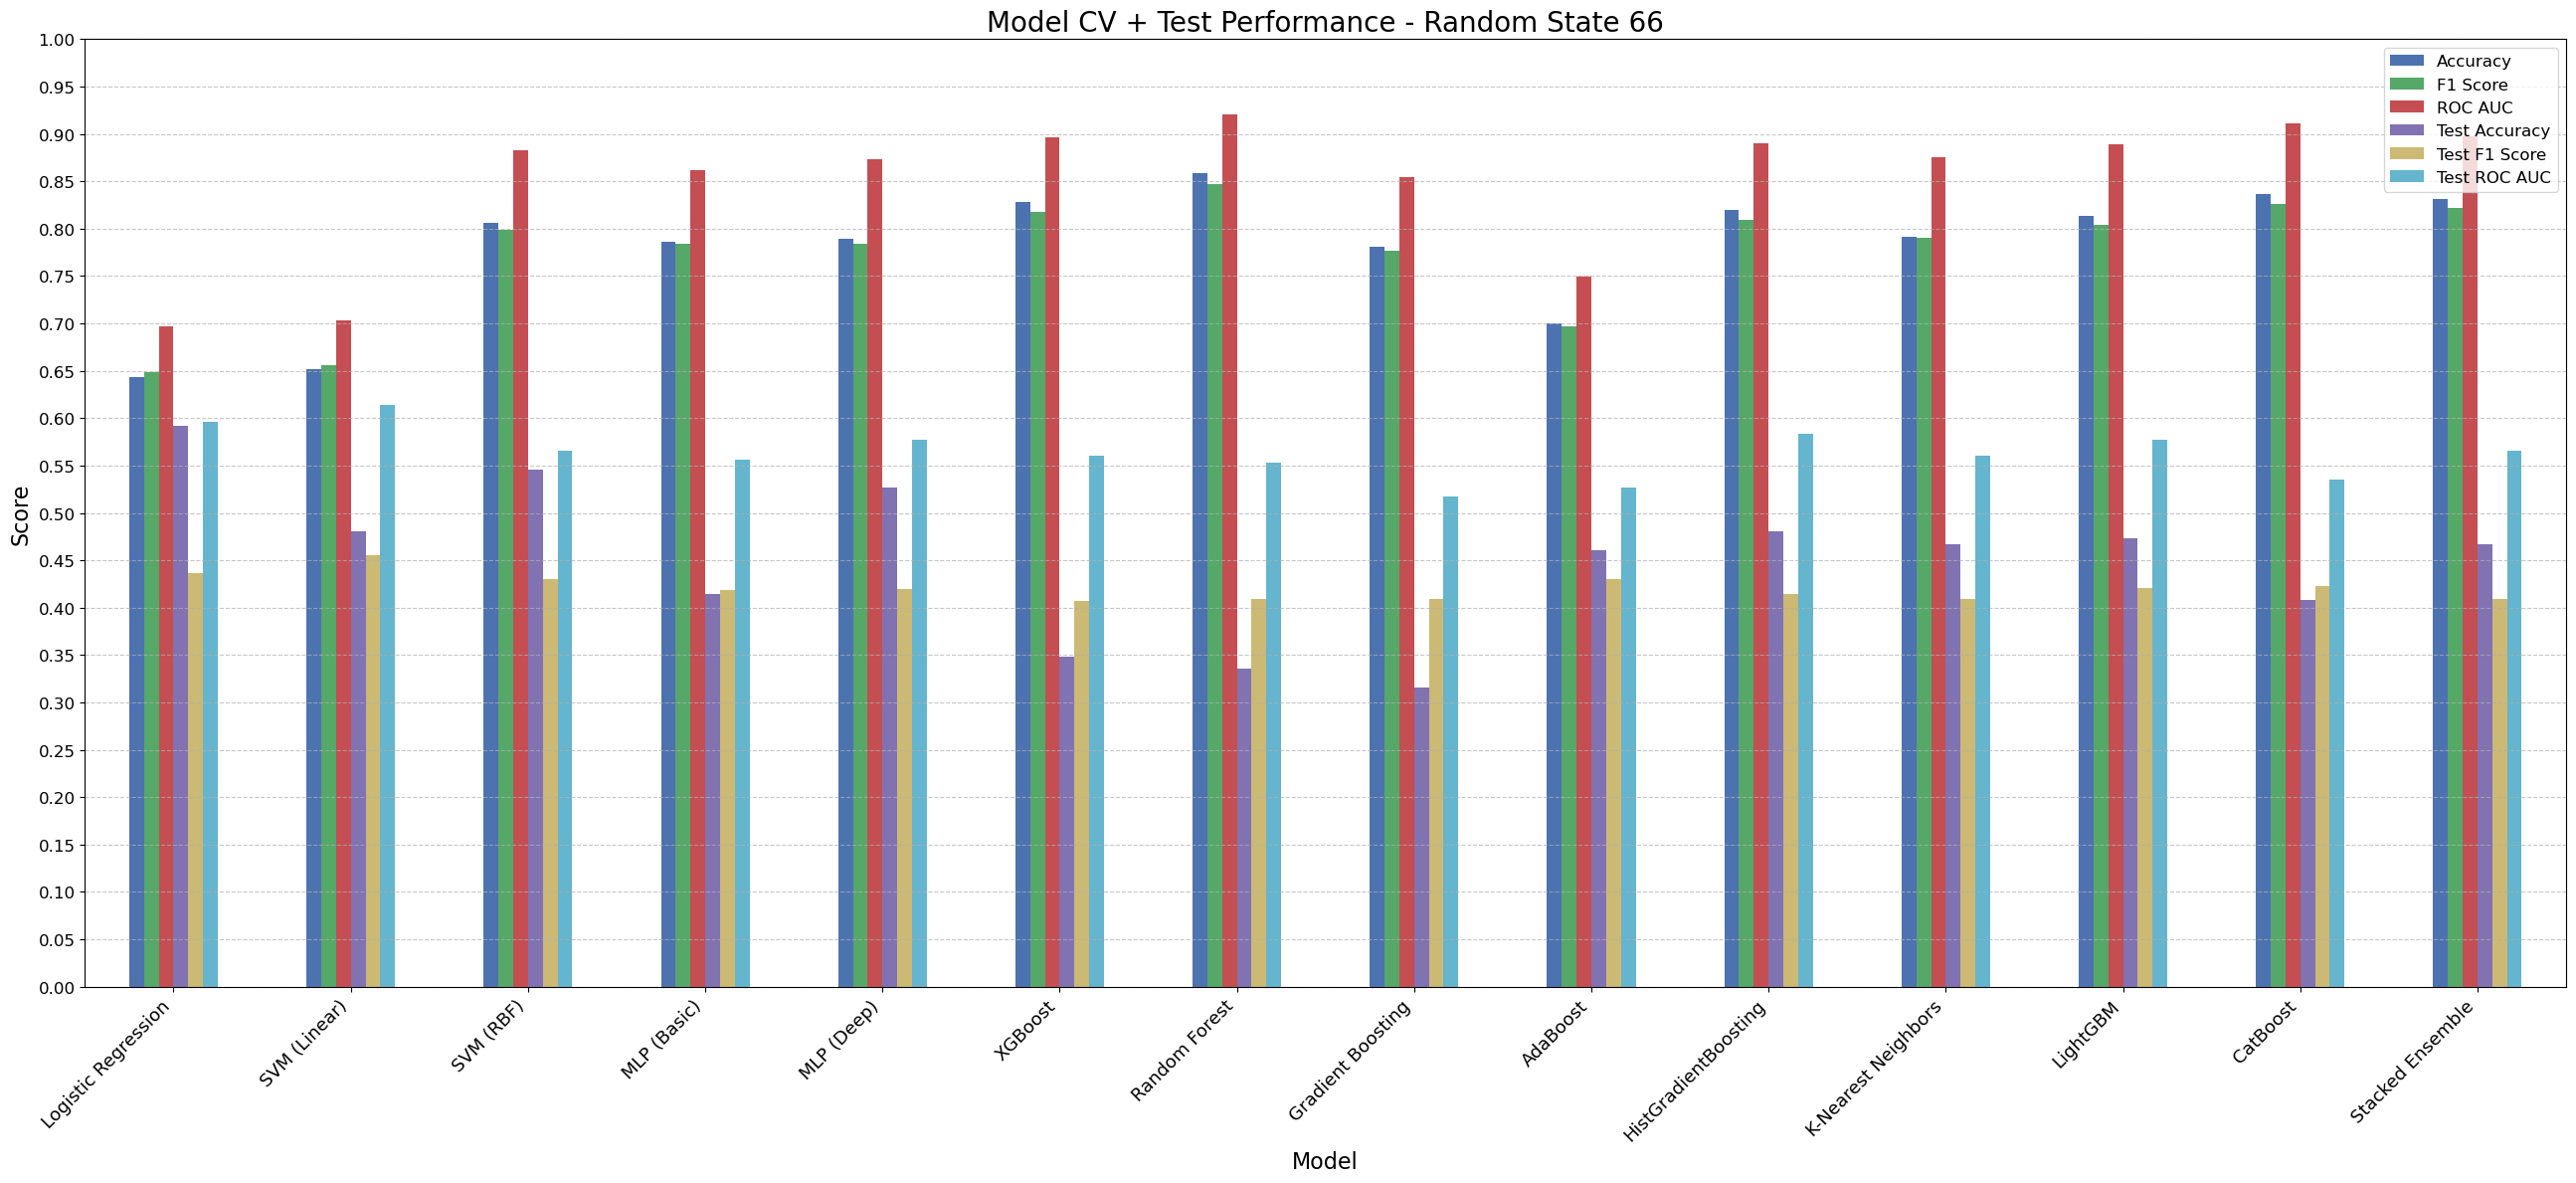


==================== Random State = 20 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({0: 457, 1: 457})

--- Logistic Regression ---
CV Accuracy:            0.6882
CV Balanced Accuracy:   0.6882
CV F1 Score:            0.6896
CV Recall (Sens.):      0.6948
CV MCC:                 0.3775
CV ROC AUC Score:       0.7230

--- Final Test Performance ---
Accuracy:            0.3355
Balanced Accuracy:   0.5455
F1 Score:            0.4024
Recall (Sensitivity):0.9444
MCC:                 0.1170
ROC AUC Score:       0.4743
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.15      0.25       116
           1       0.26      0.94      0.40        36

    accuracy                           0.34       152
   macro avg       0.58      0.55      0.33       152
weighted avg       0.74      0.34      0.29       152


--- SVM (Linear) ---
CV Accuracy:            0.

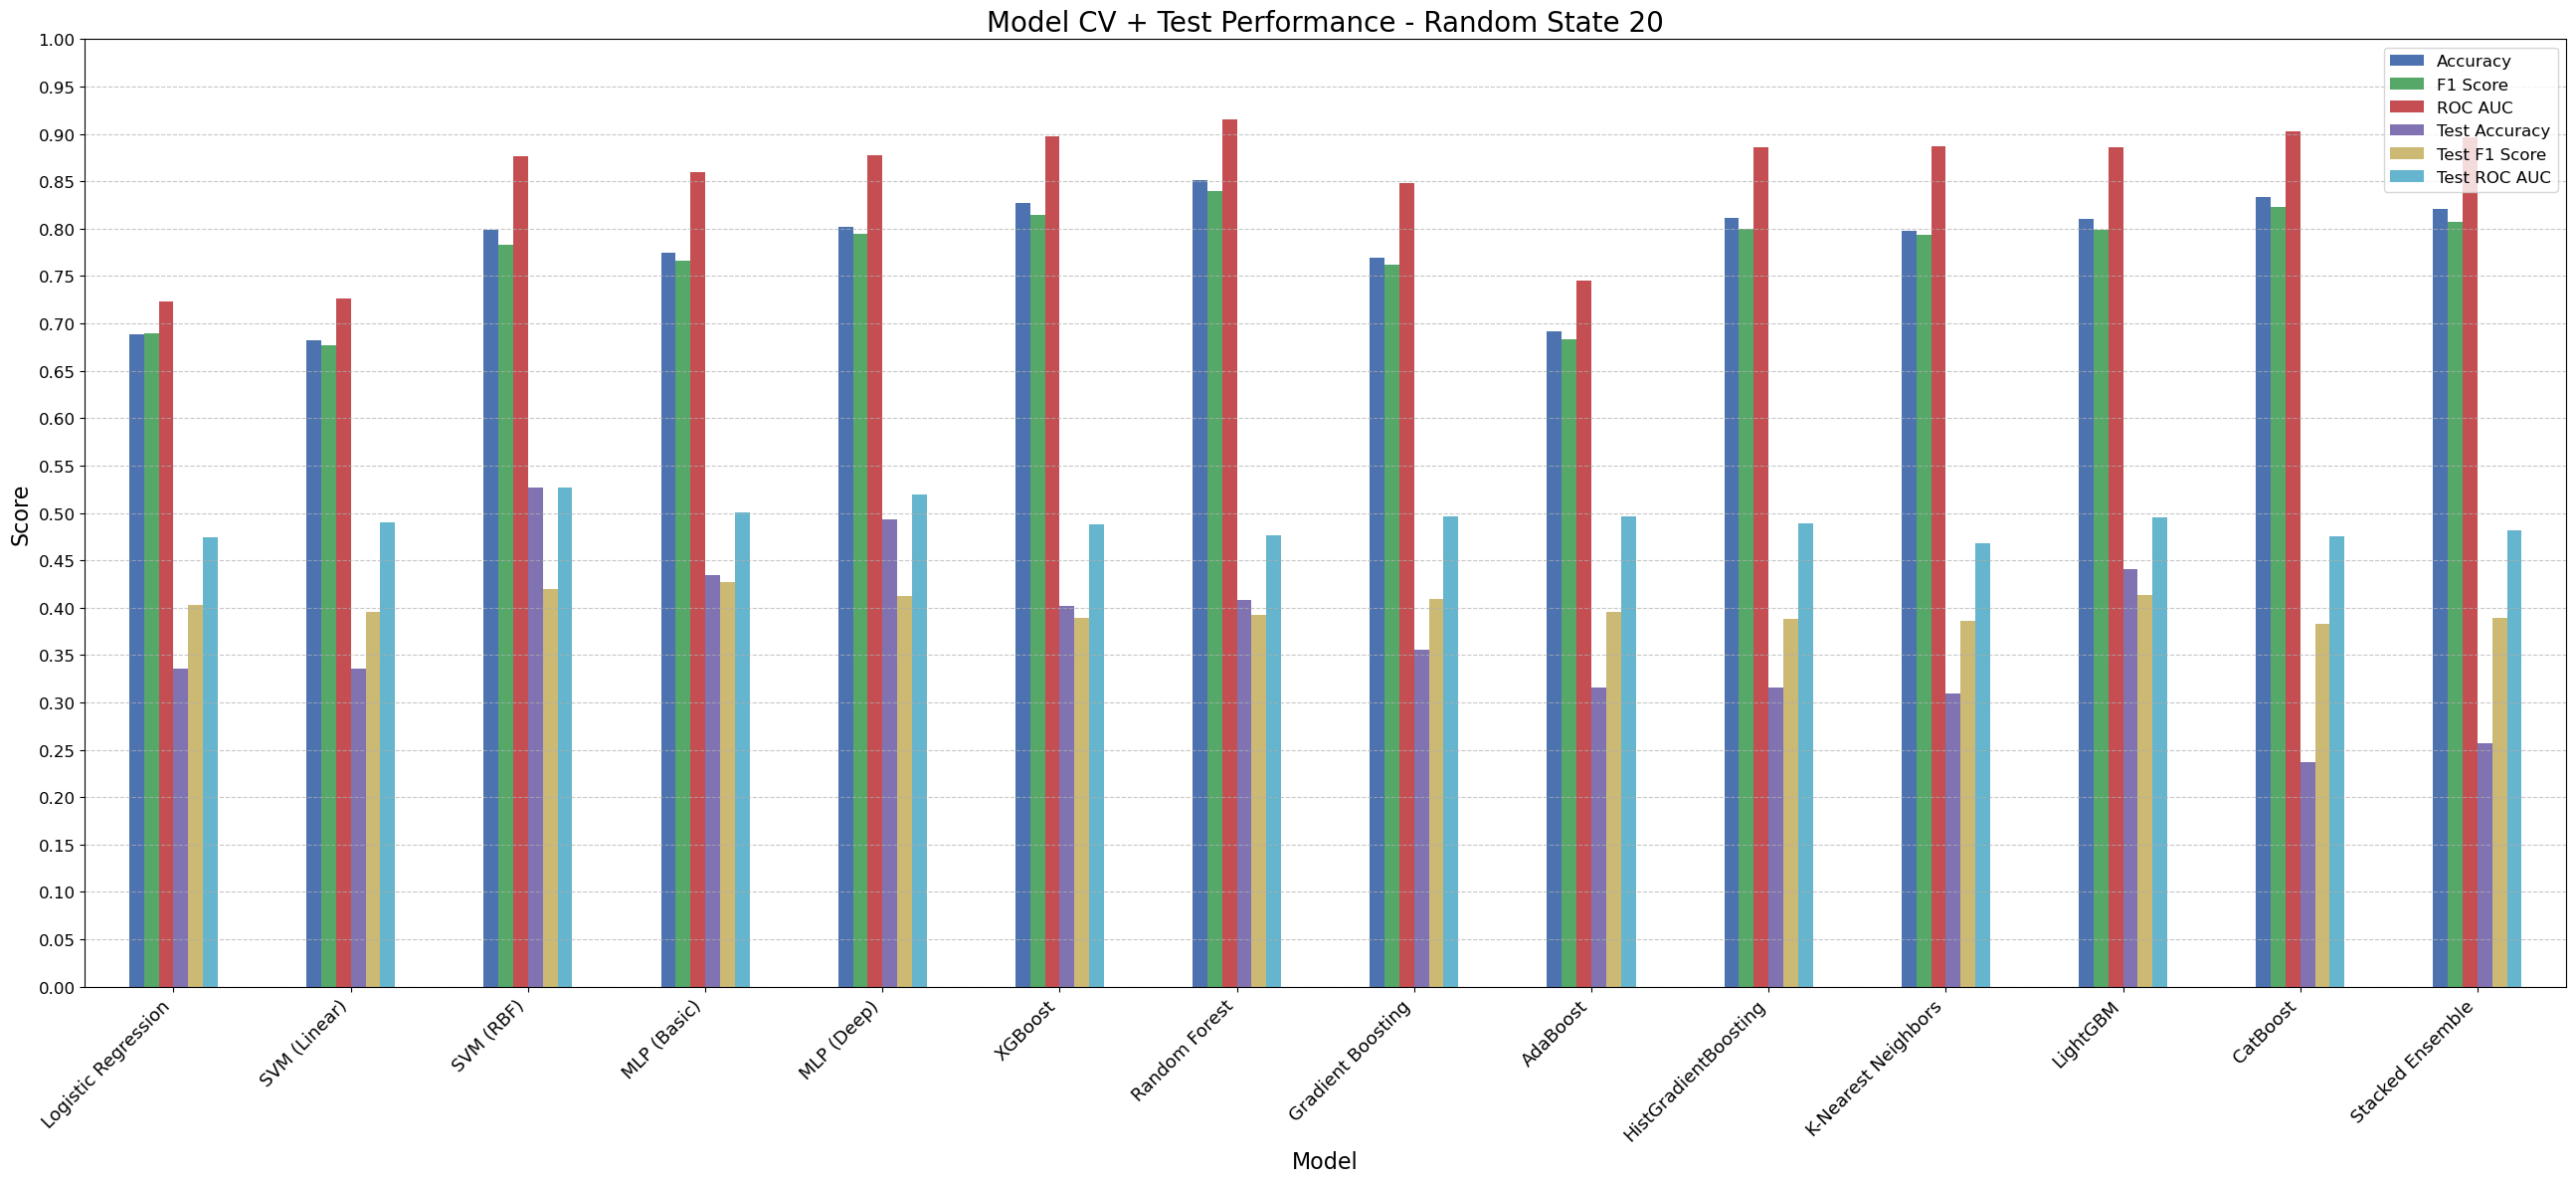


==================== Random State = 87 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({0: 455, 1: 455})

--- Logistic Regression ---
CV Accuracy:            0.6879
CV Balanced Accuracy:   0.6879
CV F1 Score:            0.6983
CV Recall (Sens.):      0.7253
CV MCC:                 0.3798
CV ROC AUC Score:       0.7391

--- Final Test Performance ---
Accuracy:            0.2368
Balanced Accuracy:   0.5000
F1 Score:            0.3830
Recall (Sensitivity):1.0000
MCC:                 0.0000
ROC AUC Score:       0.5114
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.24      1.00      0.38        36

    accuracy                           0.24       152
   macro avg       0.12      0.50      0.19       152
weighted avg       0.06      0.24      0.09       152


--- SVM (Linear) ---
CV Accuracy:            0.

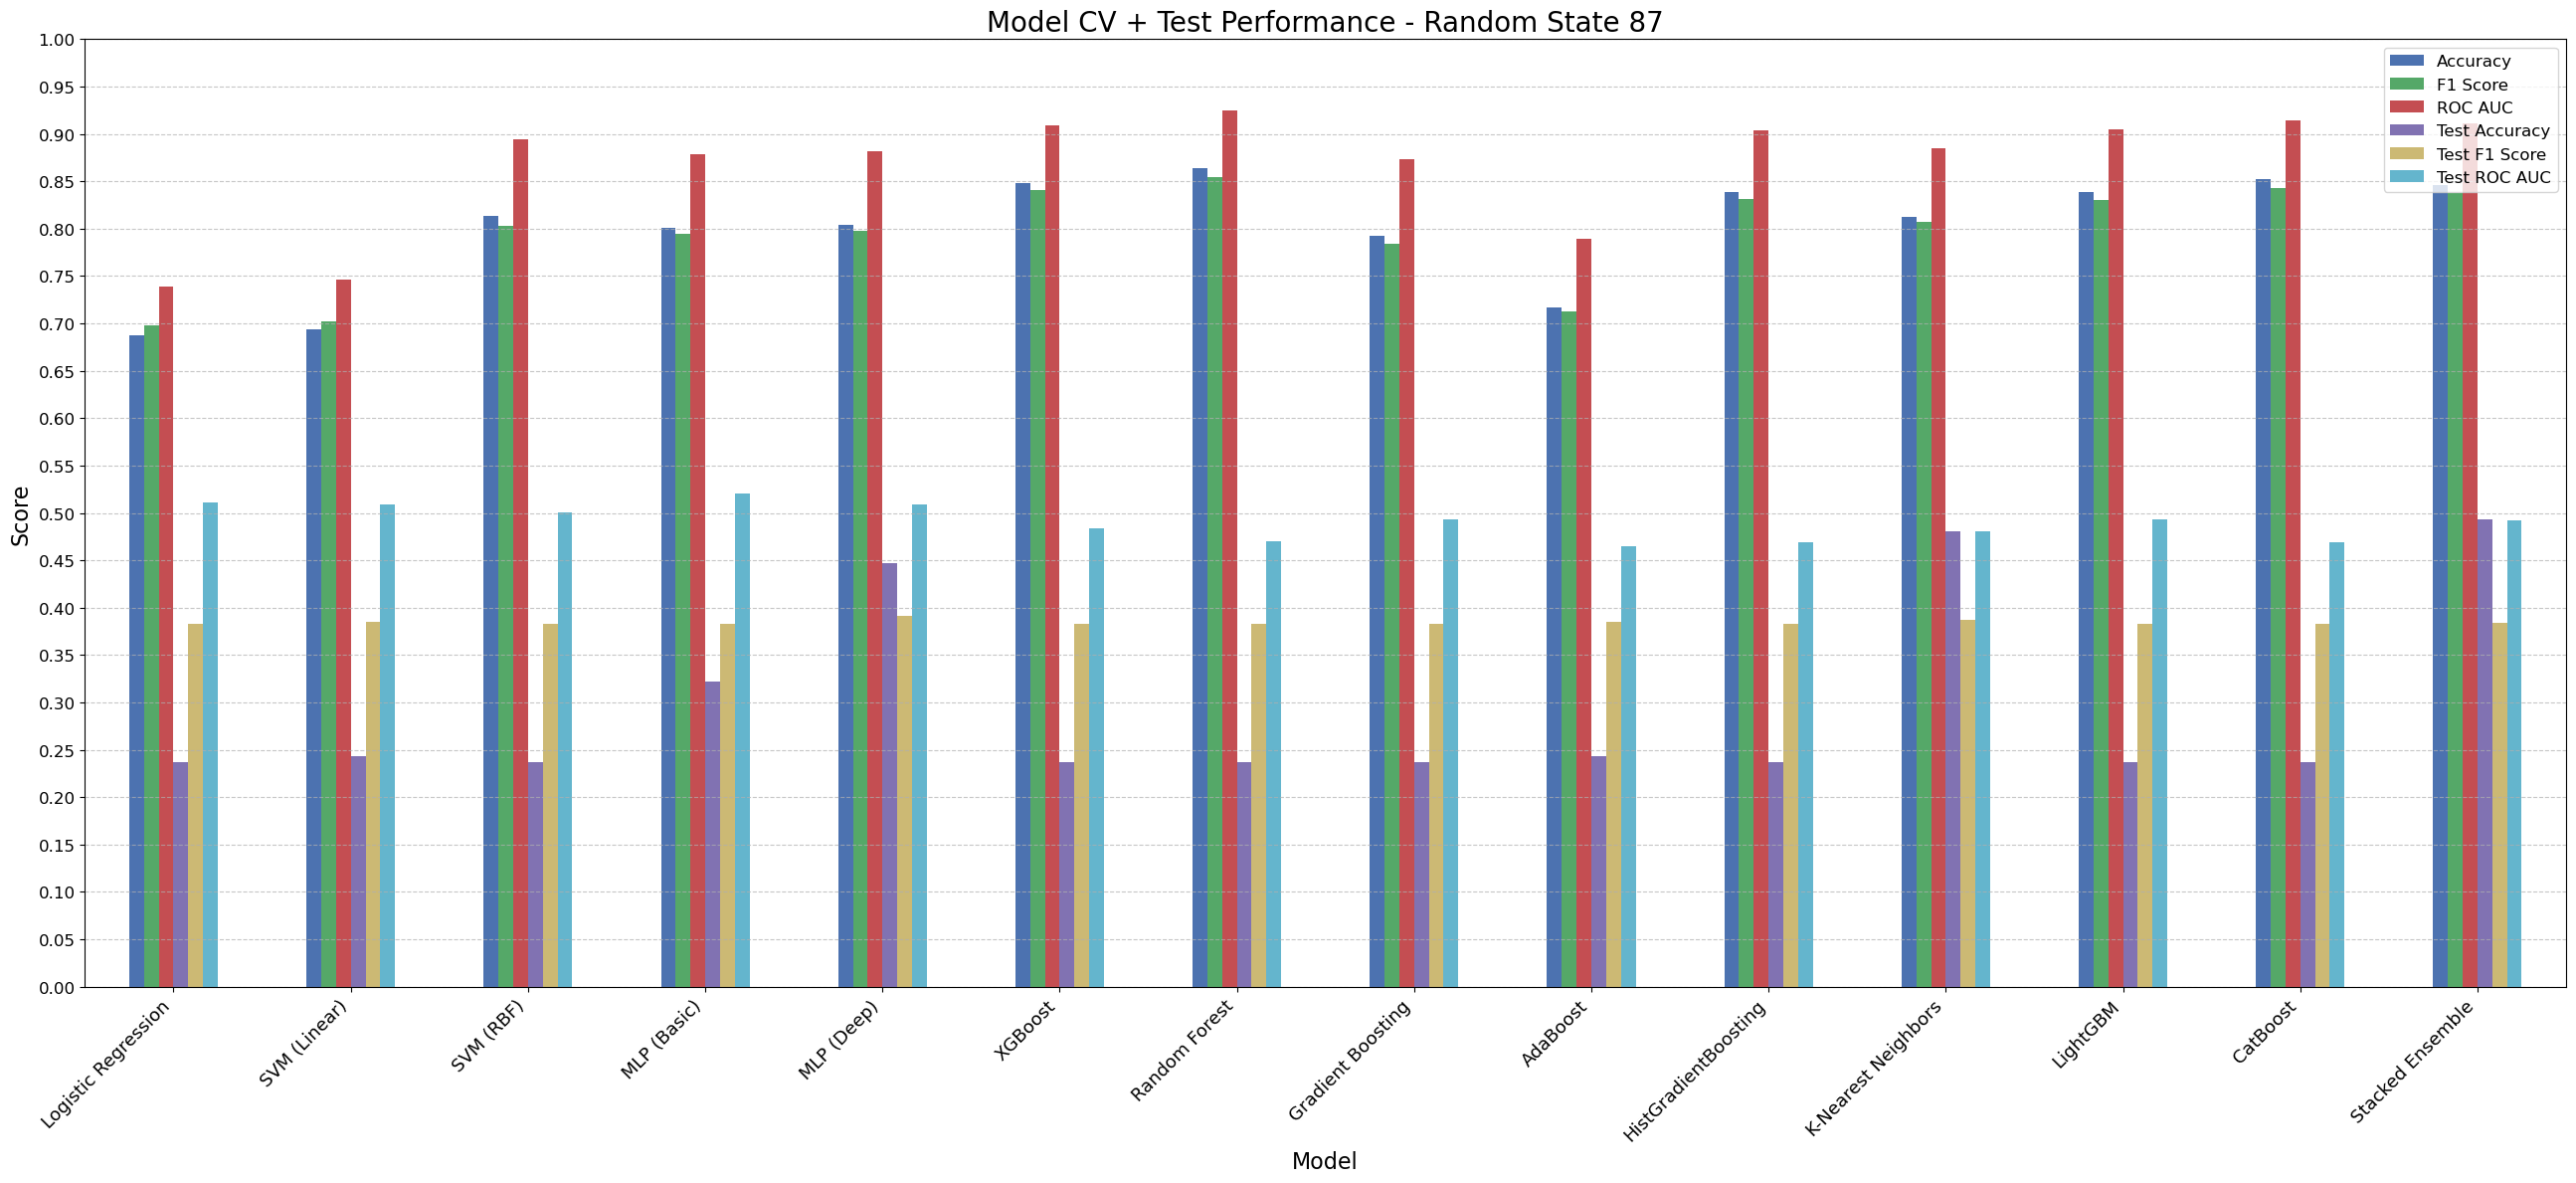


==================== Random State = 141 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({1: 459, 0: 459})

--- Logistic Regression ---
CV Accuracy:            0.6596
CV Balanced Accuracy:   0.6596
CV F1 Score:            0.6624
CV Recall (Sens.):      0.6678
CV MCC:                 0.3205
CV ROC AUC Score:       0.7234

--- Final Test Performance ---
Accuracy:            0.2632
Balanced Accuracy:   0.5172
F1 Score:            0.3913
Recall (Sensitivity):1.0000
MCC:                 0.0916
ROC AUC Score:       0.4587
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.07       116
           1       0.24      1.00      0.39        36

    accuracy                           0.26       152
   macro avg       0.62      0.52      0.23       152
weighted avg       0.82      0.26      0.14       152


--- SVM (Linear) ---
CV Accuracy:            0

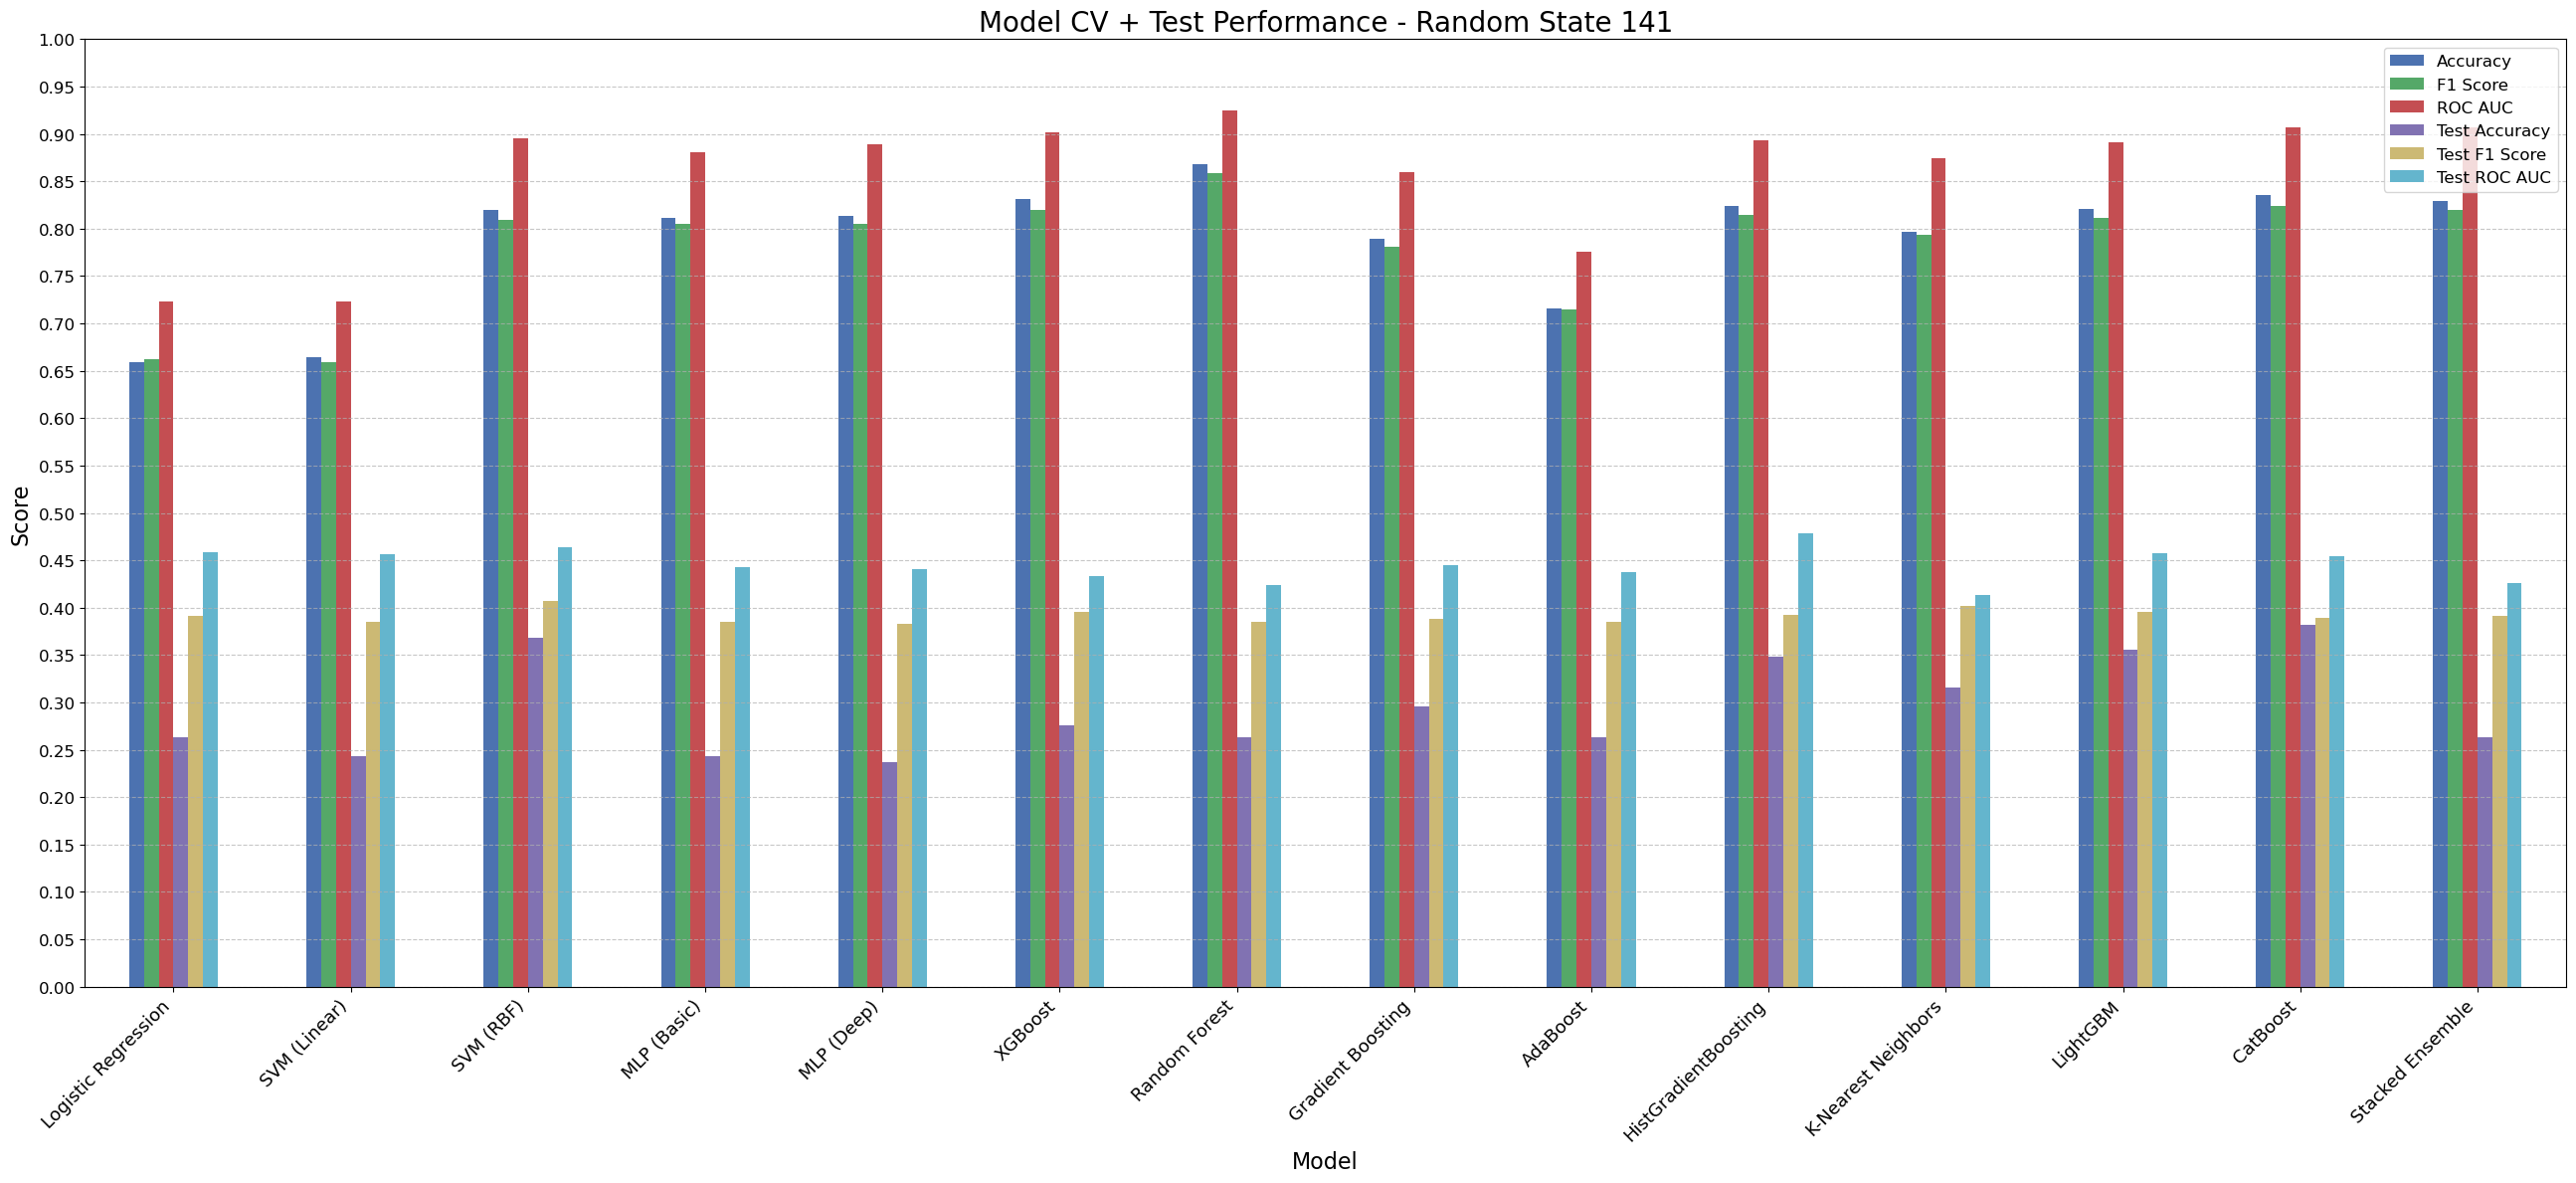


==================== Random State = 69 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({0: 455, 1: 455})

--- Logistic Regression ---
CV Accuracy:            0.6780
CV Balanced Accuracy:   0.6780
CV F1 Score:            0.6755
CV Recall (Sens.):      0.6736
CV MCC:                 0.3577
CV ROC AUC Score:       0.7455

--- Final Test Performance ---
Accuracy:            0.2368
Balanced Accuracy:   0.5000
F1 Score:            0.3830
Recall (Sensitivity):1.0000
MCC:                 0.0000
ROC AUC Score:       0.4852
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.24      1.00      0.38        36

    accuracy                           0.24       152
   macro avg       0.12      0.50      0.19       152
weighted avg       0.06      0.24      0.09       152


--- SVM (Linear) ---
CV Accuracy:            0.

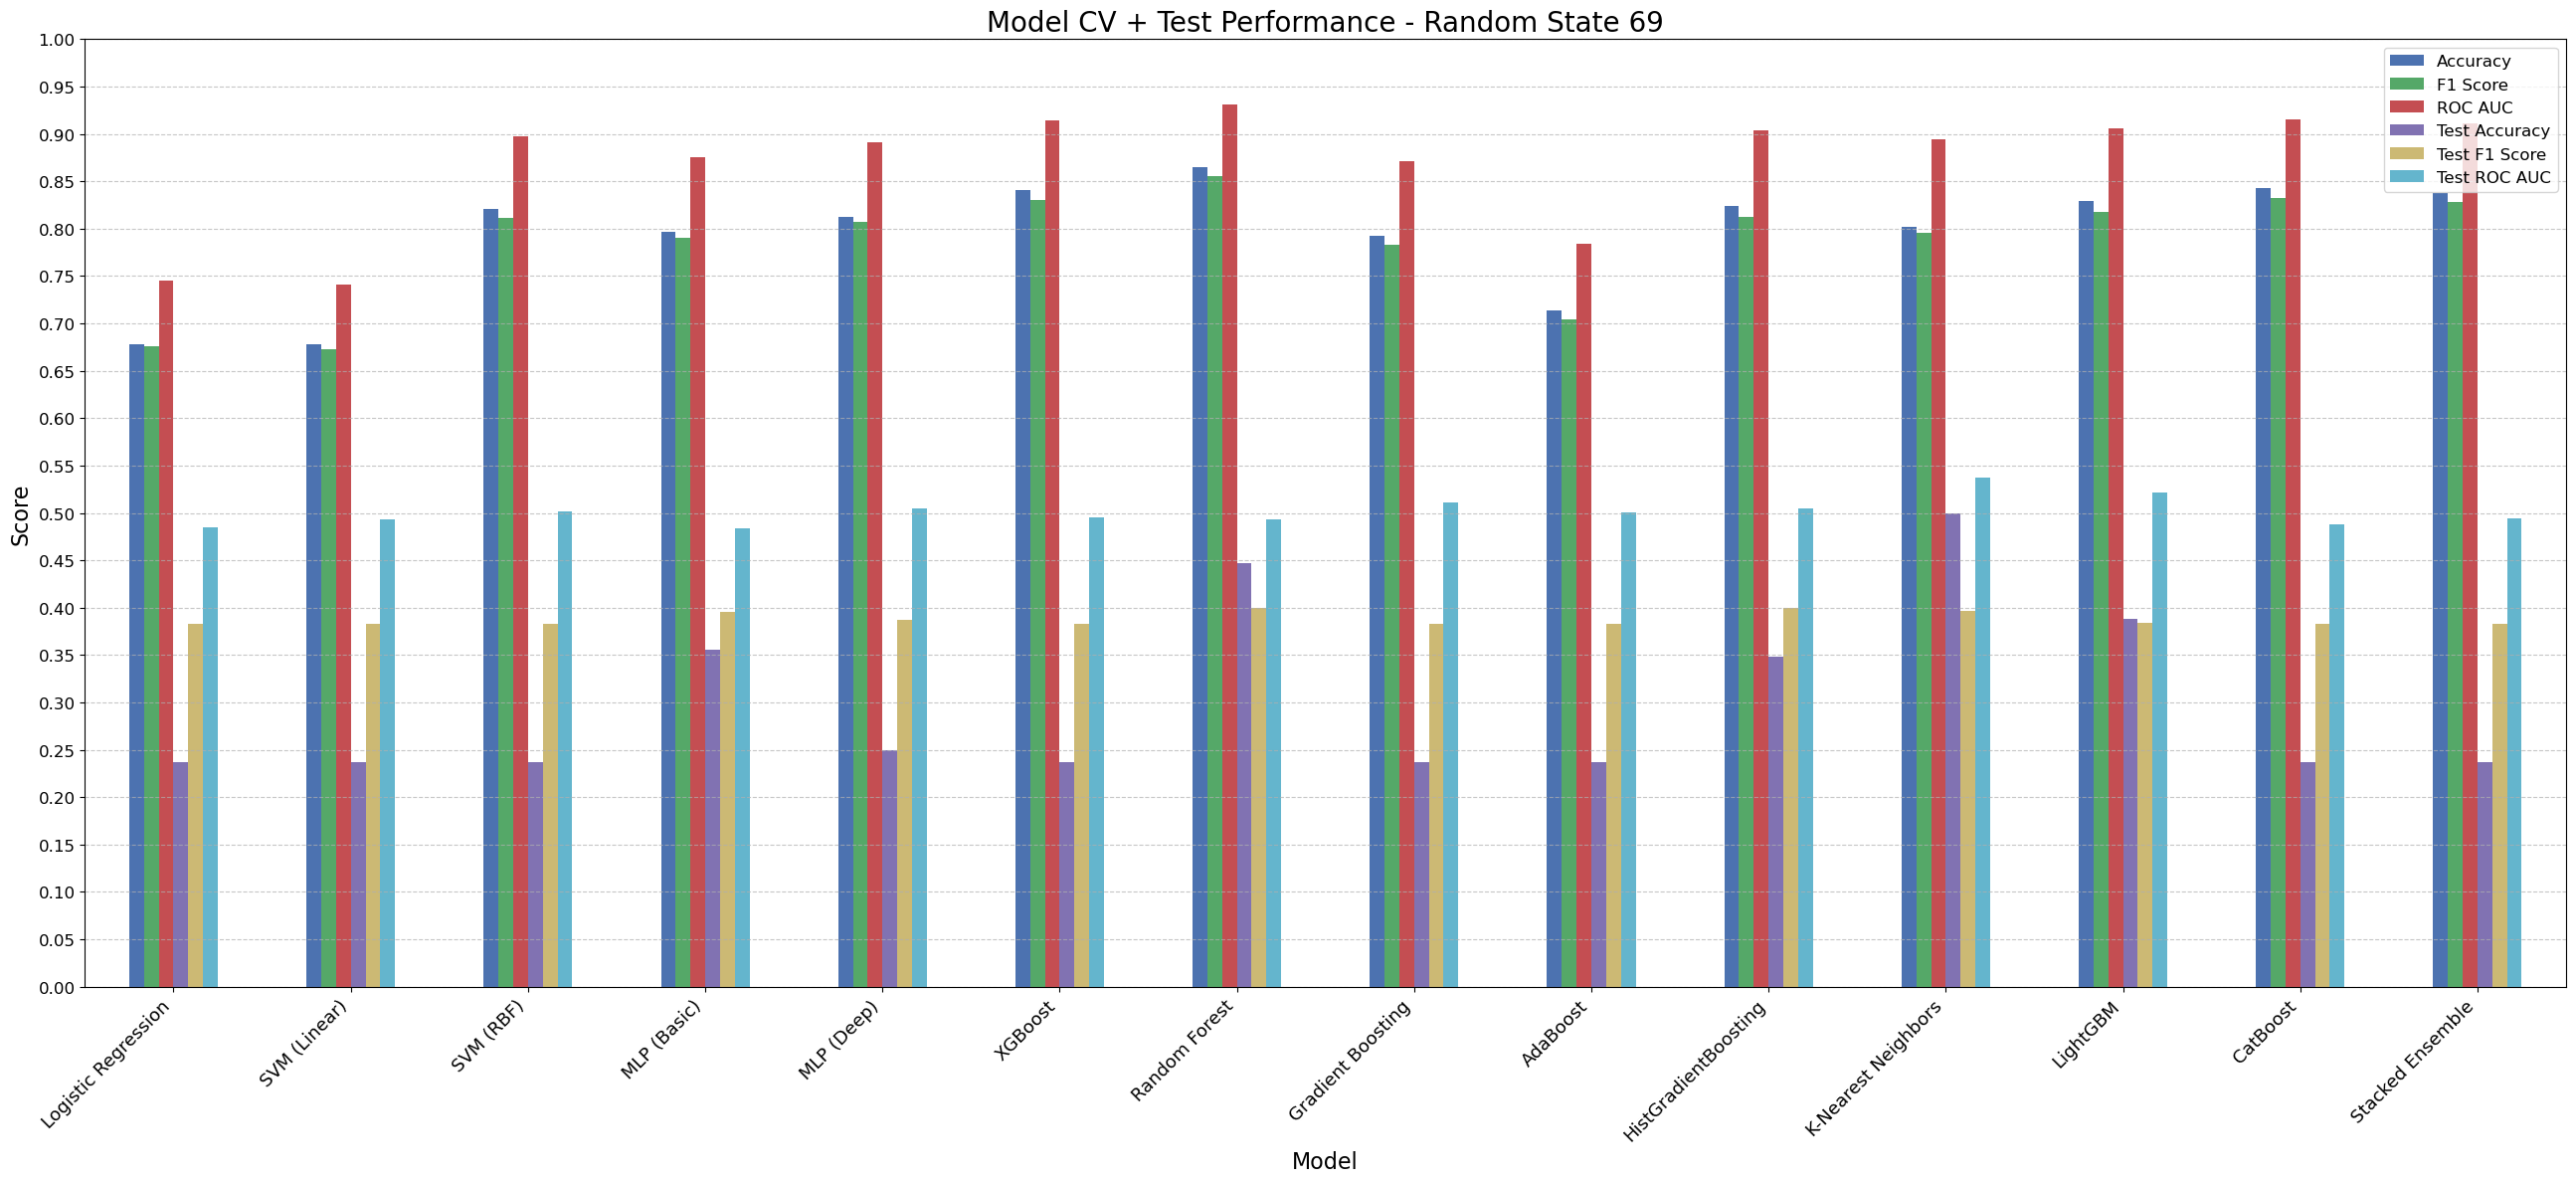


==================== Random State = 87 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({0: 455, 1: 455})

--- Logistic Regression ---
CV Accuracy:            0.6879
CV Balanced Accuracy:   0.6879
CV F1 Score:            0.6983
CV Recall (Sens.):      0.7253
CV MCC:                 0.3798
CV ROC AUC Score:       0.7391

--- Final Test Performance ---
Accuracy:            0.2368
Balanced Accuracy:   0.5000
F1 Score:            0.3830
Recall (Sensitivity):1.0000
MCC:                 0.0000
ROC AUC Score:       0.5114
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.24      1.00      0.38        36

    accuracy                           0.24       152
   macro avg       0.12      0.50      0.19       152
weighted avg       0.06      0.24      0.09       152


--- SVM (Linear) ---
CV Accuracy:            0.

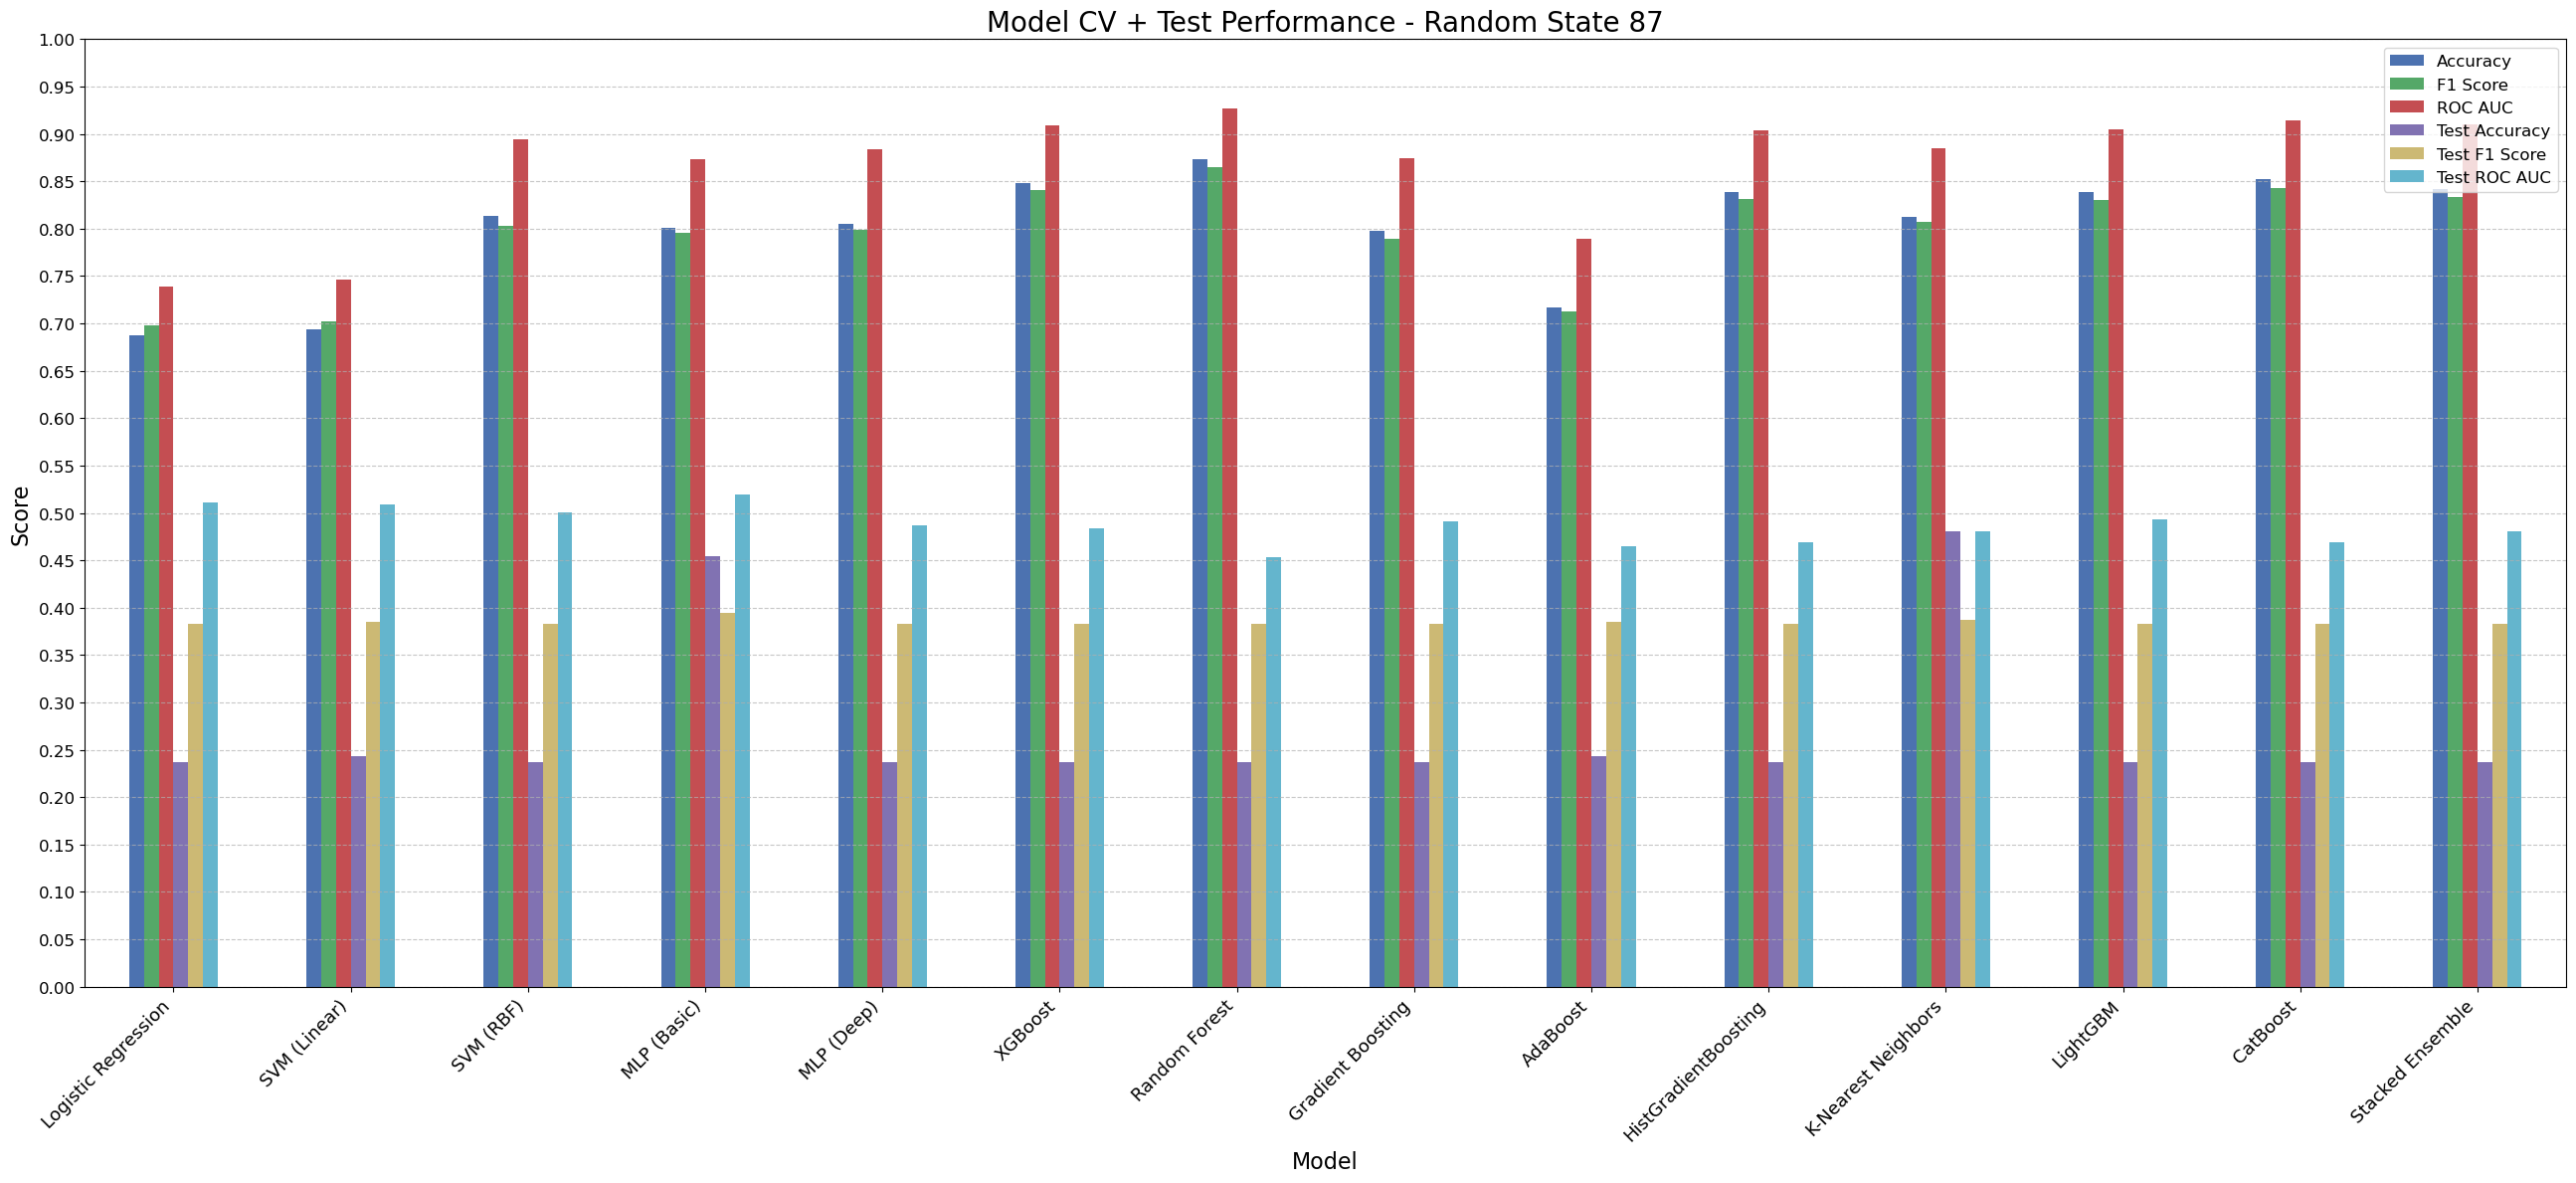


==================== Random State = 90 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({0: 456, 1: 456})

--- Logistic Regression ---
CV Accuracy:            0.6732
CV Balanced Accuracy:   0.6732
CV F1 Score:            0.6732
CV Recall (Sens.):      0.6742
CV MCC:                 0.3479
CV ROC AUC Score:       0.7355

--- Final Test Performance ---
Accuracy:            0.3092
Balanced Accuracy:   0.5187
F1 Score:            0.3860
Recall (Sensitivity):0.9167
MCC:                 0.0504
ROC AUC Score:       0.4515
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.12      0.21       116
           1       0.24      0.92      0.39        36

    accuracy                           0.31       152
   macro avg       0.53      0.52      0.30       152
weighted avg       0.69      0.31      0.25       152


--- SVM (Linear) ---
CV Accuracy:            0.

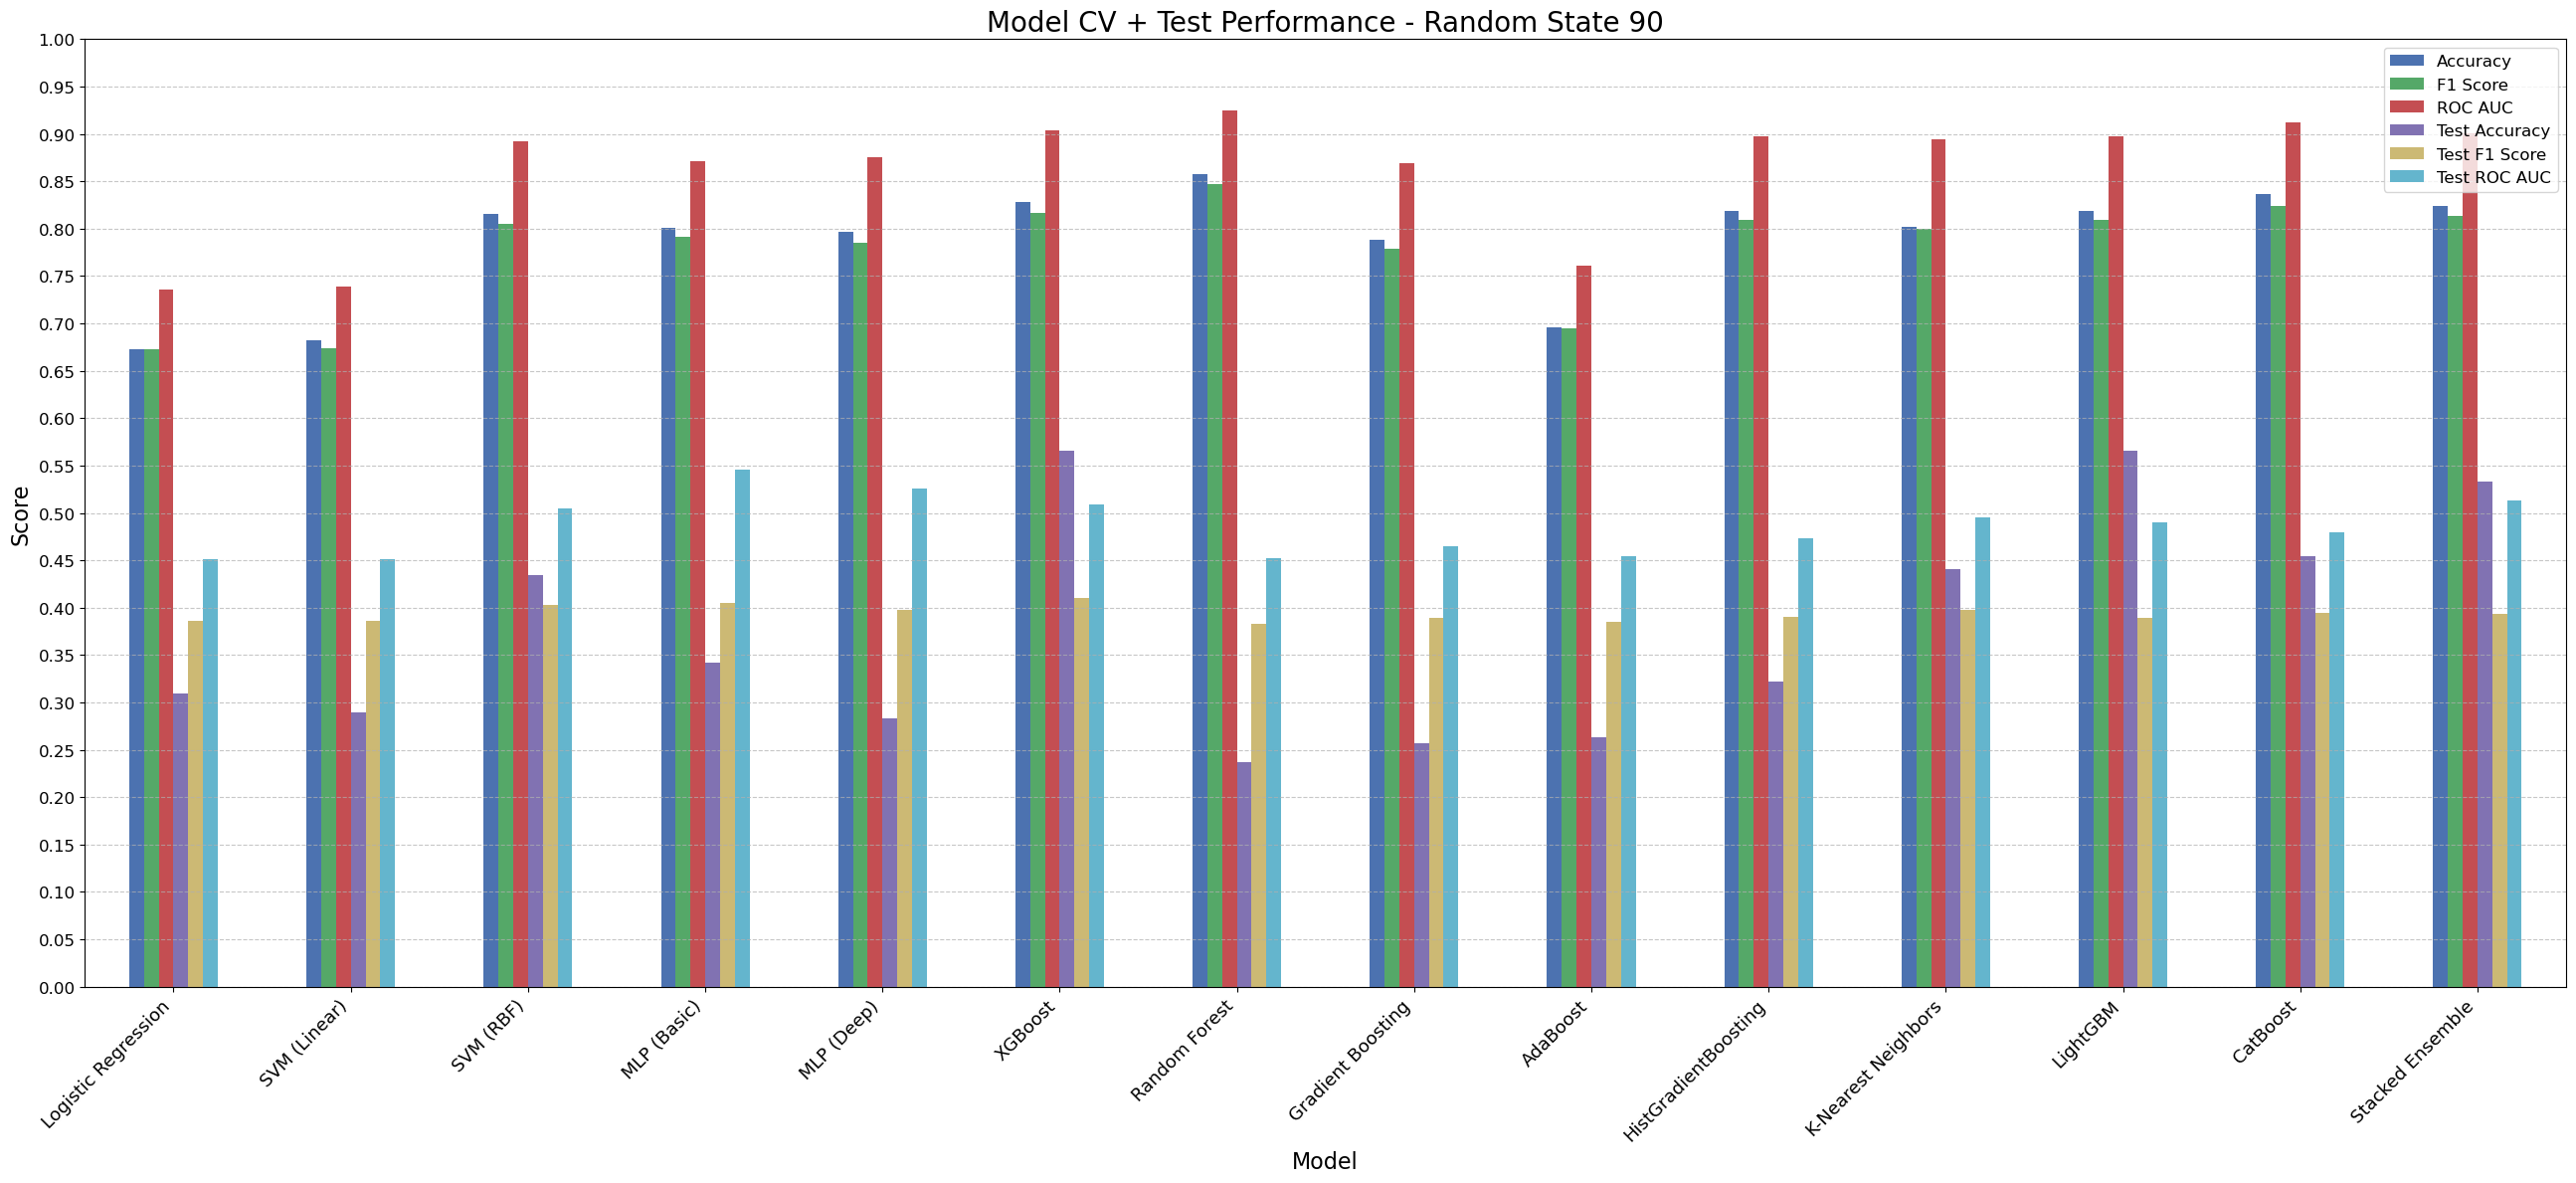

In [21]:
# This code adds performance metric plotting to the user's existing evaluation pipeline,
# without modifying the training or evaluation logic.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
from collections import Counter

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, classification_report,
    roc_auc_score, matthews_corrcoef, recall_score, precision_recall_curve
)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.combine import SMOTETomek

warnings.filterwarnings("ignore")

# Sampling strategy using SMOTETomek after split
def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

# Threshold optimization function
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# Evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []
    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))
    print(f"CV Accuracy:            {np.mean(accs):.4f}")
    print(f"CV Balanced Accuracy:   {np.mean(baccs):.4f}")
    print(f"CV F1 Score:            {np.mean(f1s):.4f}")
    print(f"CV Recall (Sens.):      {np.mean(recalls):.4f}")
    print(f"CV MCC:                 {np.mean(mccs):.4f}")
    print(f"CV ROC AUC Score:       {np.mean(aucs):.4f}")

    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_test_proba)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_test_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    
    return {
        "Accuracy": np.mean(accs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test F1 Score": f1_score(y_test, y_test_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_test_proba)
    }

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss')),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Plotting colors
custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

# Replace with your actual data
# X = ...
# y = ...

random_states = [66, 20, 87, 141, 69, 87, 90]
all_results = {}

for seed in random_states:
    print(f"\n==================== Random State = {seed} ====================\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

    print("Train distribution before sampling:", Counter(y_train))
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)
    print("Train distribution after SMOTETomek:", Counter(y_train_aug))

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)
    X_test_scaled = scaler.transform(X_test)

    result_dict = {}
    for name, model in models.items():
        print(f"\n--- {name} ---")
        calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
        metrics = evaluate_model(calibrated_model, X_train_scaled, y_train_aug, X_test_scaled, y_test)
        result_dict[name] = metrics

    df_results = pd.DataFrame(result_dict).T
    all_results[seed] = df_results

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



==================== Random State = 66 ====================

Train distribution: Counter({0: 461, 1: 144})

--- Logistic Regression ---
Accuracy:            0.4934
Balanced Accuracy:   0.5053
F1 Score:            0.3304
Recall:              0.5278
MCC:                 0.0090
ROC AUC Score:       0.5803
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59       116
           1       0.24      0.53      0.33        36

    accuracy                           0.49       152
   macro avg       0.50      0.51      0.46       152
weighted avg       0.64      0.49      0.53       152


--- SVM (Linear) ---
Accuracy:            0.5658
Balanced Accuracy:   0.5335
F1 Score:            0.3400
Recall:              0.4722
MCC:                 0.0577
ROC AUC Score:       0.5758
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.59      0.68       116
           1       0.27

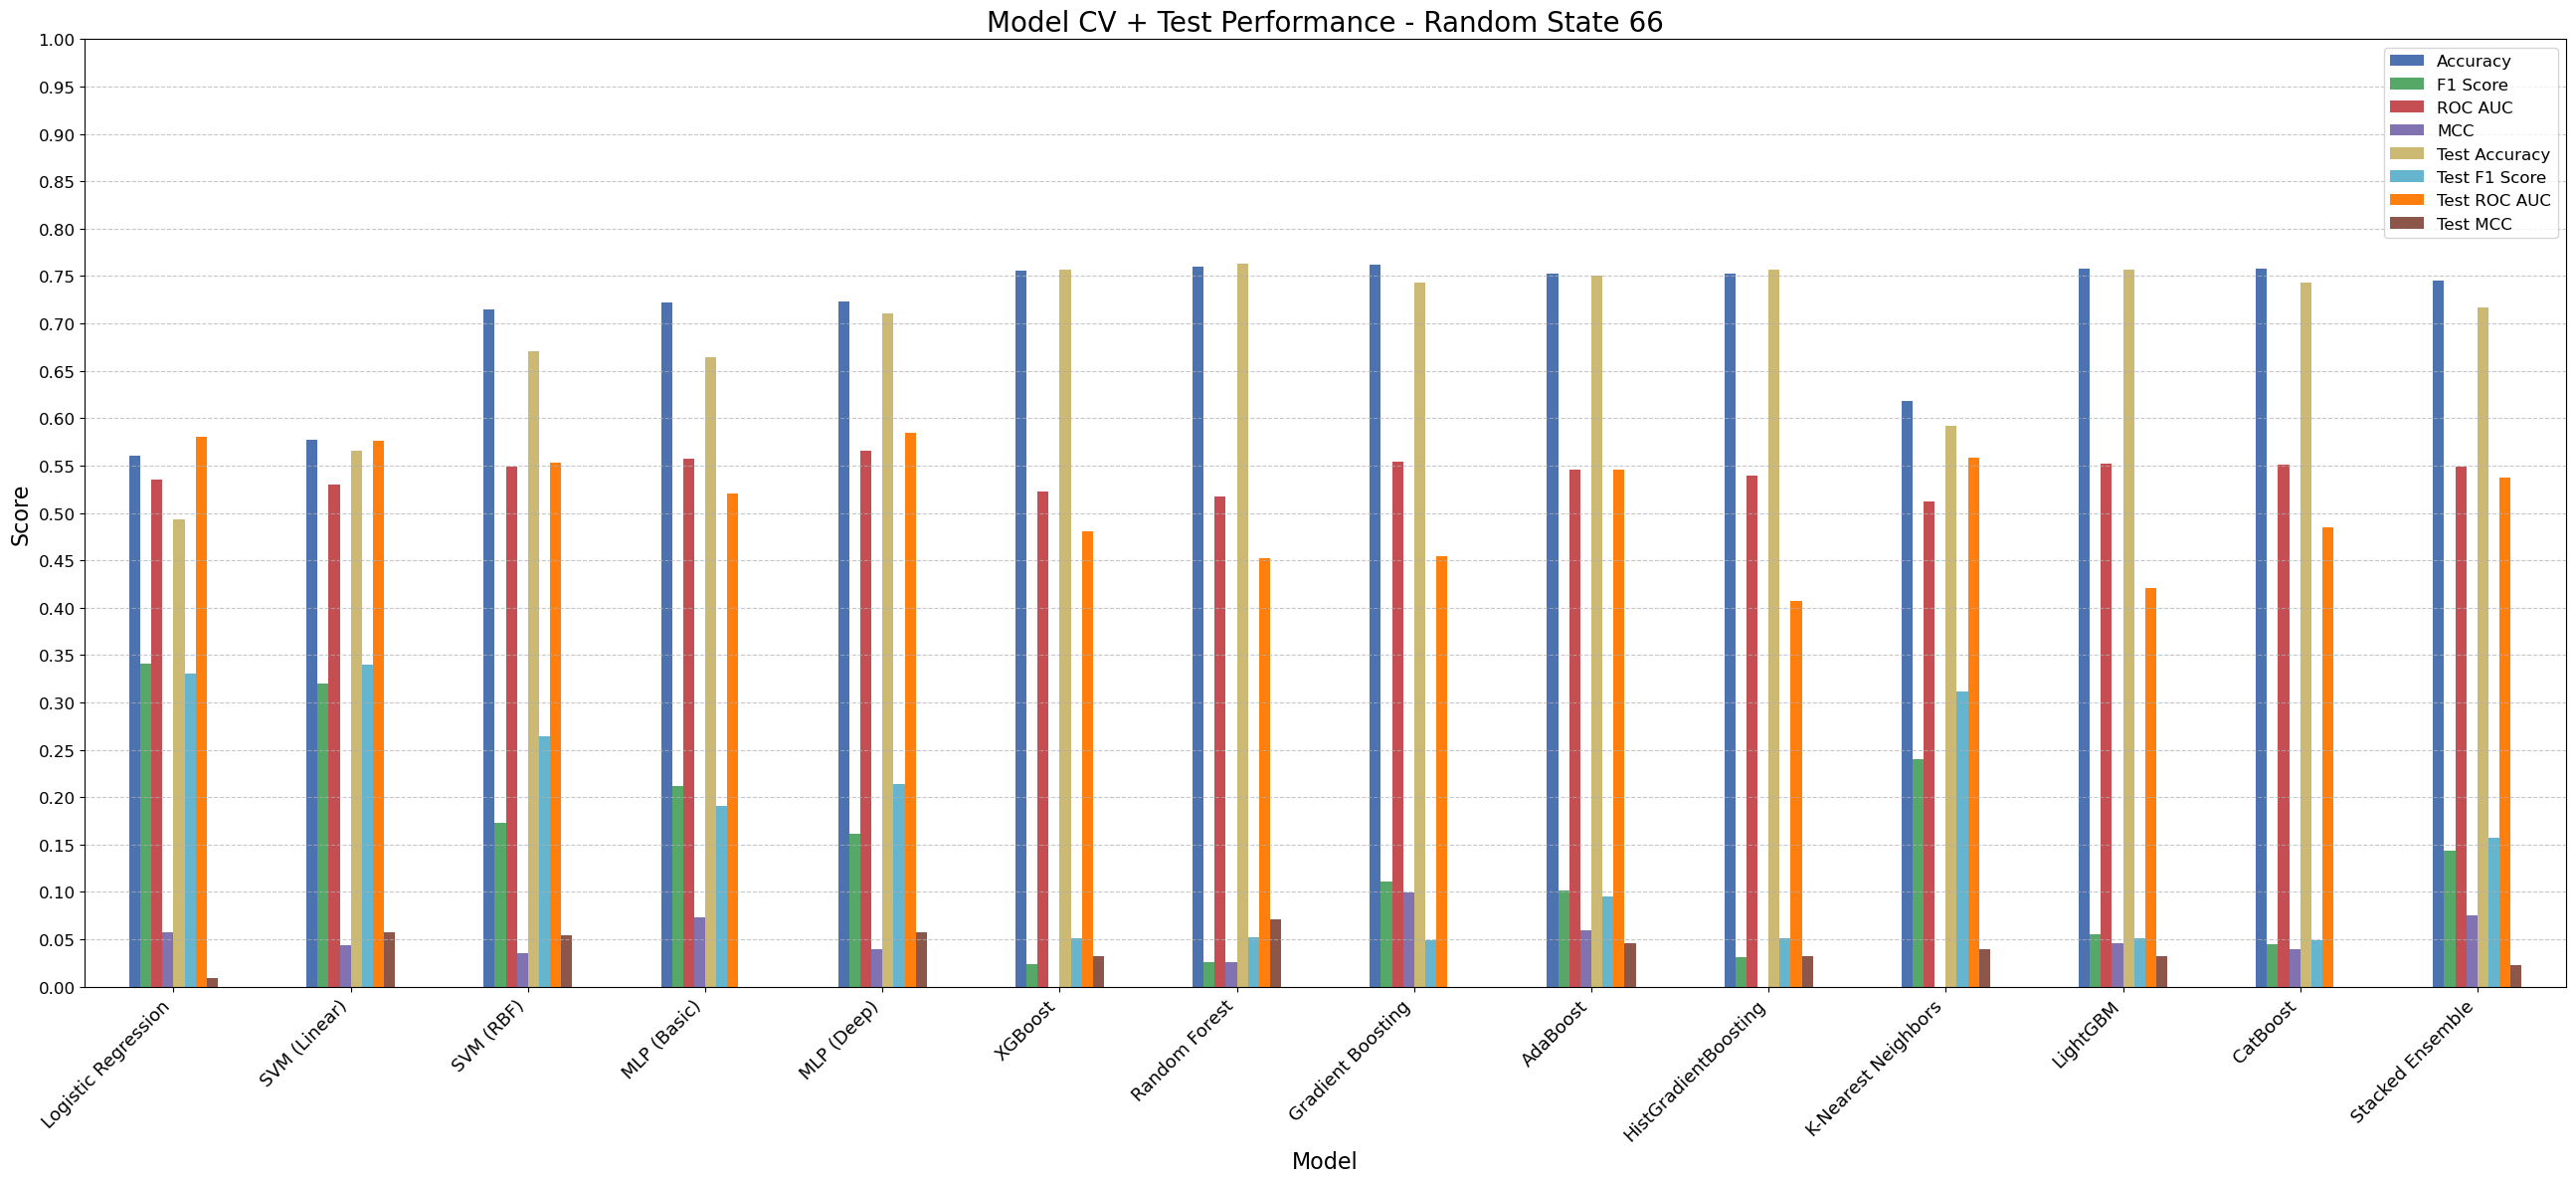


==================== Random State = 20 ====================

Train distribution: Counter({0: 461, 1: 144})

--- Logistic Regression ---
Accuracy:            0.4605
Balanced Accuracy:   0.4646
F1 Score:            0.2931
Recall:              0.4722
MCC:                 -0.0604
ROC AUC Score:       0.5148
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.46      0.56       116
           1       0.21      0.47      0.29        36

    accuracy                           0.46       152
   macro avg       0.47      0.46      0.43       152
weighted avg       0.61      0.46      0.50       152


--- SVM (Linear) ---
Accuracy:            0.5066
Balanced Accuracy:   0.4852
F1 Score:            0.2991
Recall:              0.4444
MCC:                 -0.0253
ROC AUC Score:       0.5399
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       116
           1       0.

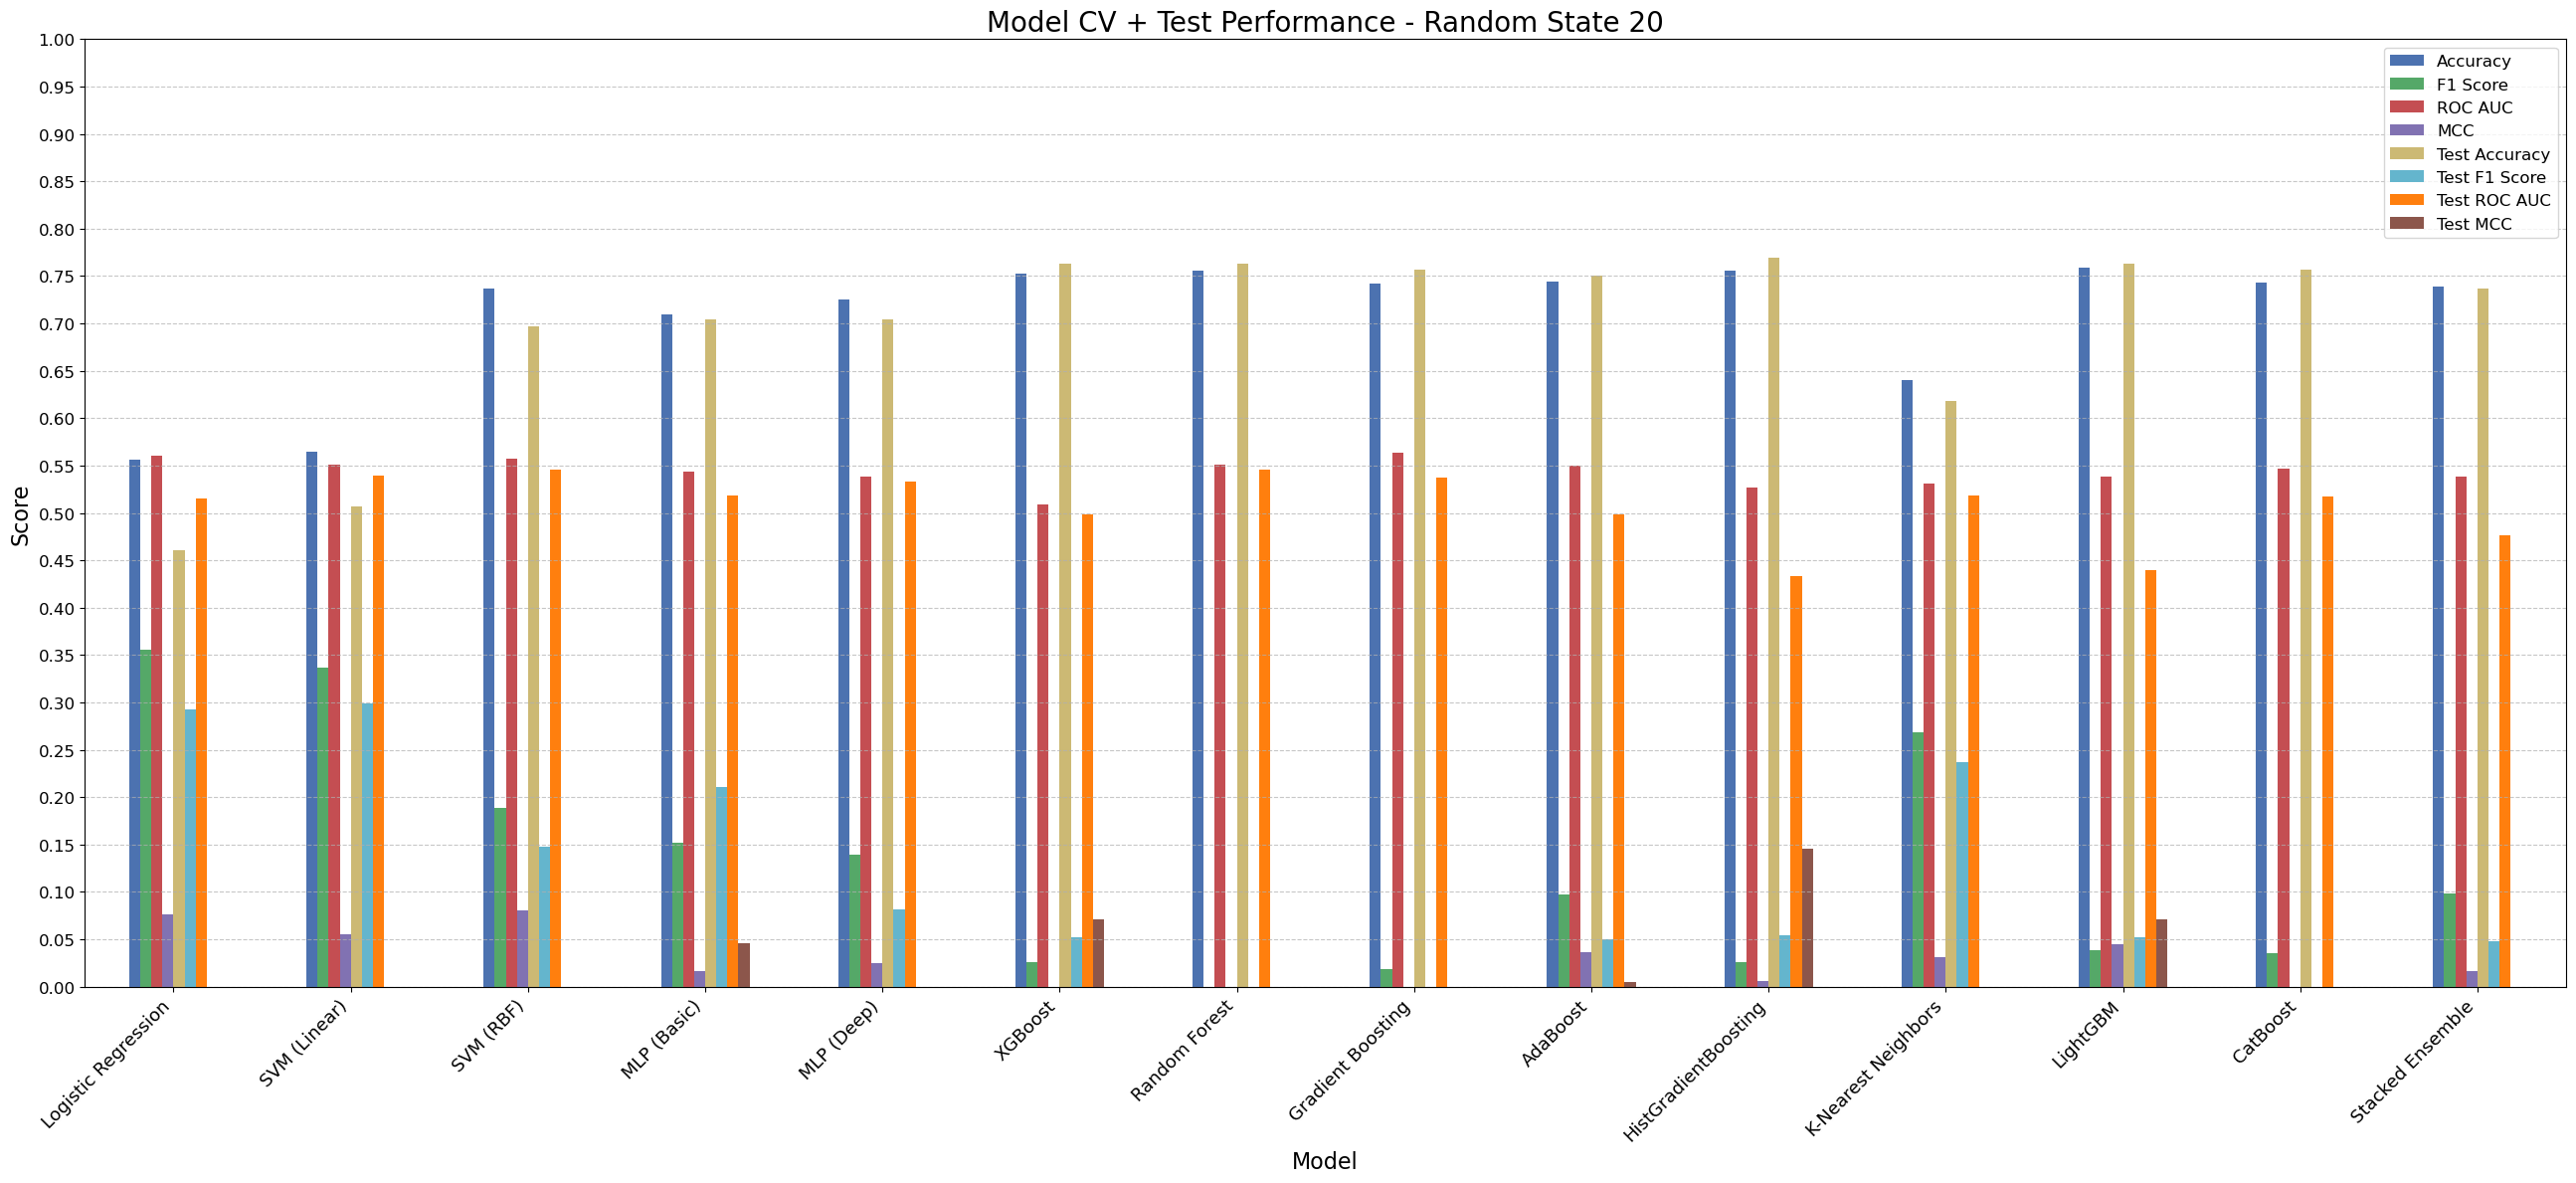


==================== Random State = 87 ====================

Train distribution: Counter({0: 461, 1: 144})

--- Logistic Regression ---
Accuracy:            0.5461
Balanced Accuracy:   0.5493
F1 Score:            0.3670
Recall:              0.5556
MCC:                 0.0840
ROC AUC Score:       0.5382
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.54      0.65       116
           1       0.27      0.56      0.37        36

    accuracy                           0.55       152
   macro avg       0.54      0.55      0.51       152
weighted avg       0.67      0.55      0.58       152


--- SVM (Linear) ---
Accuracy:            0.5263
Balanced Accuracy:   0.4981
F1 Score:            0.3077
Recall:              0.4444
MCC:                 -0.0033
ROC AUC Score:       0.5368
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       116
           1       0.2

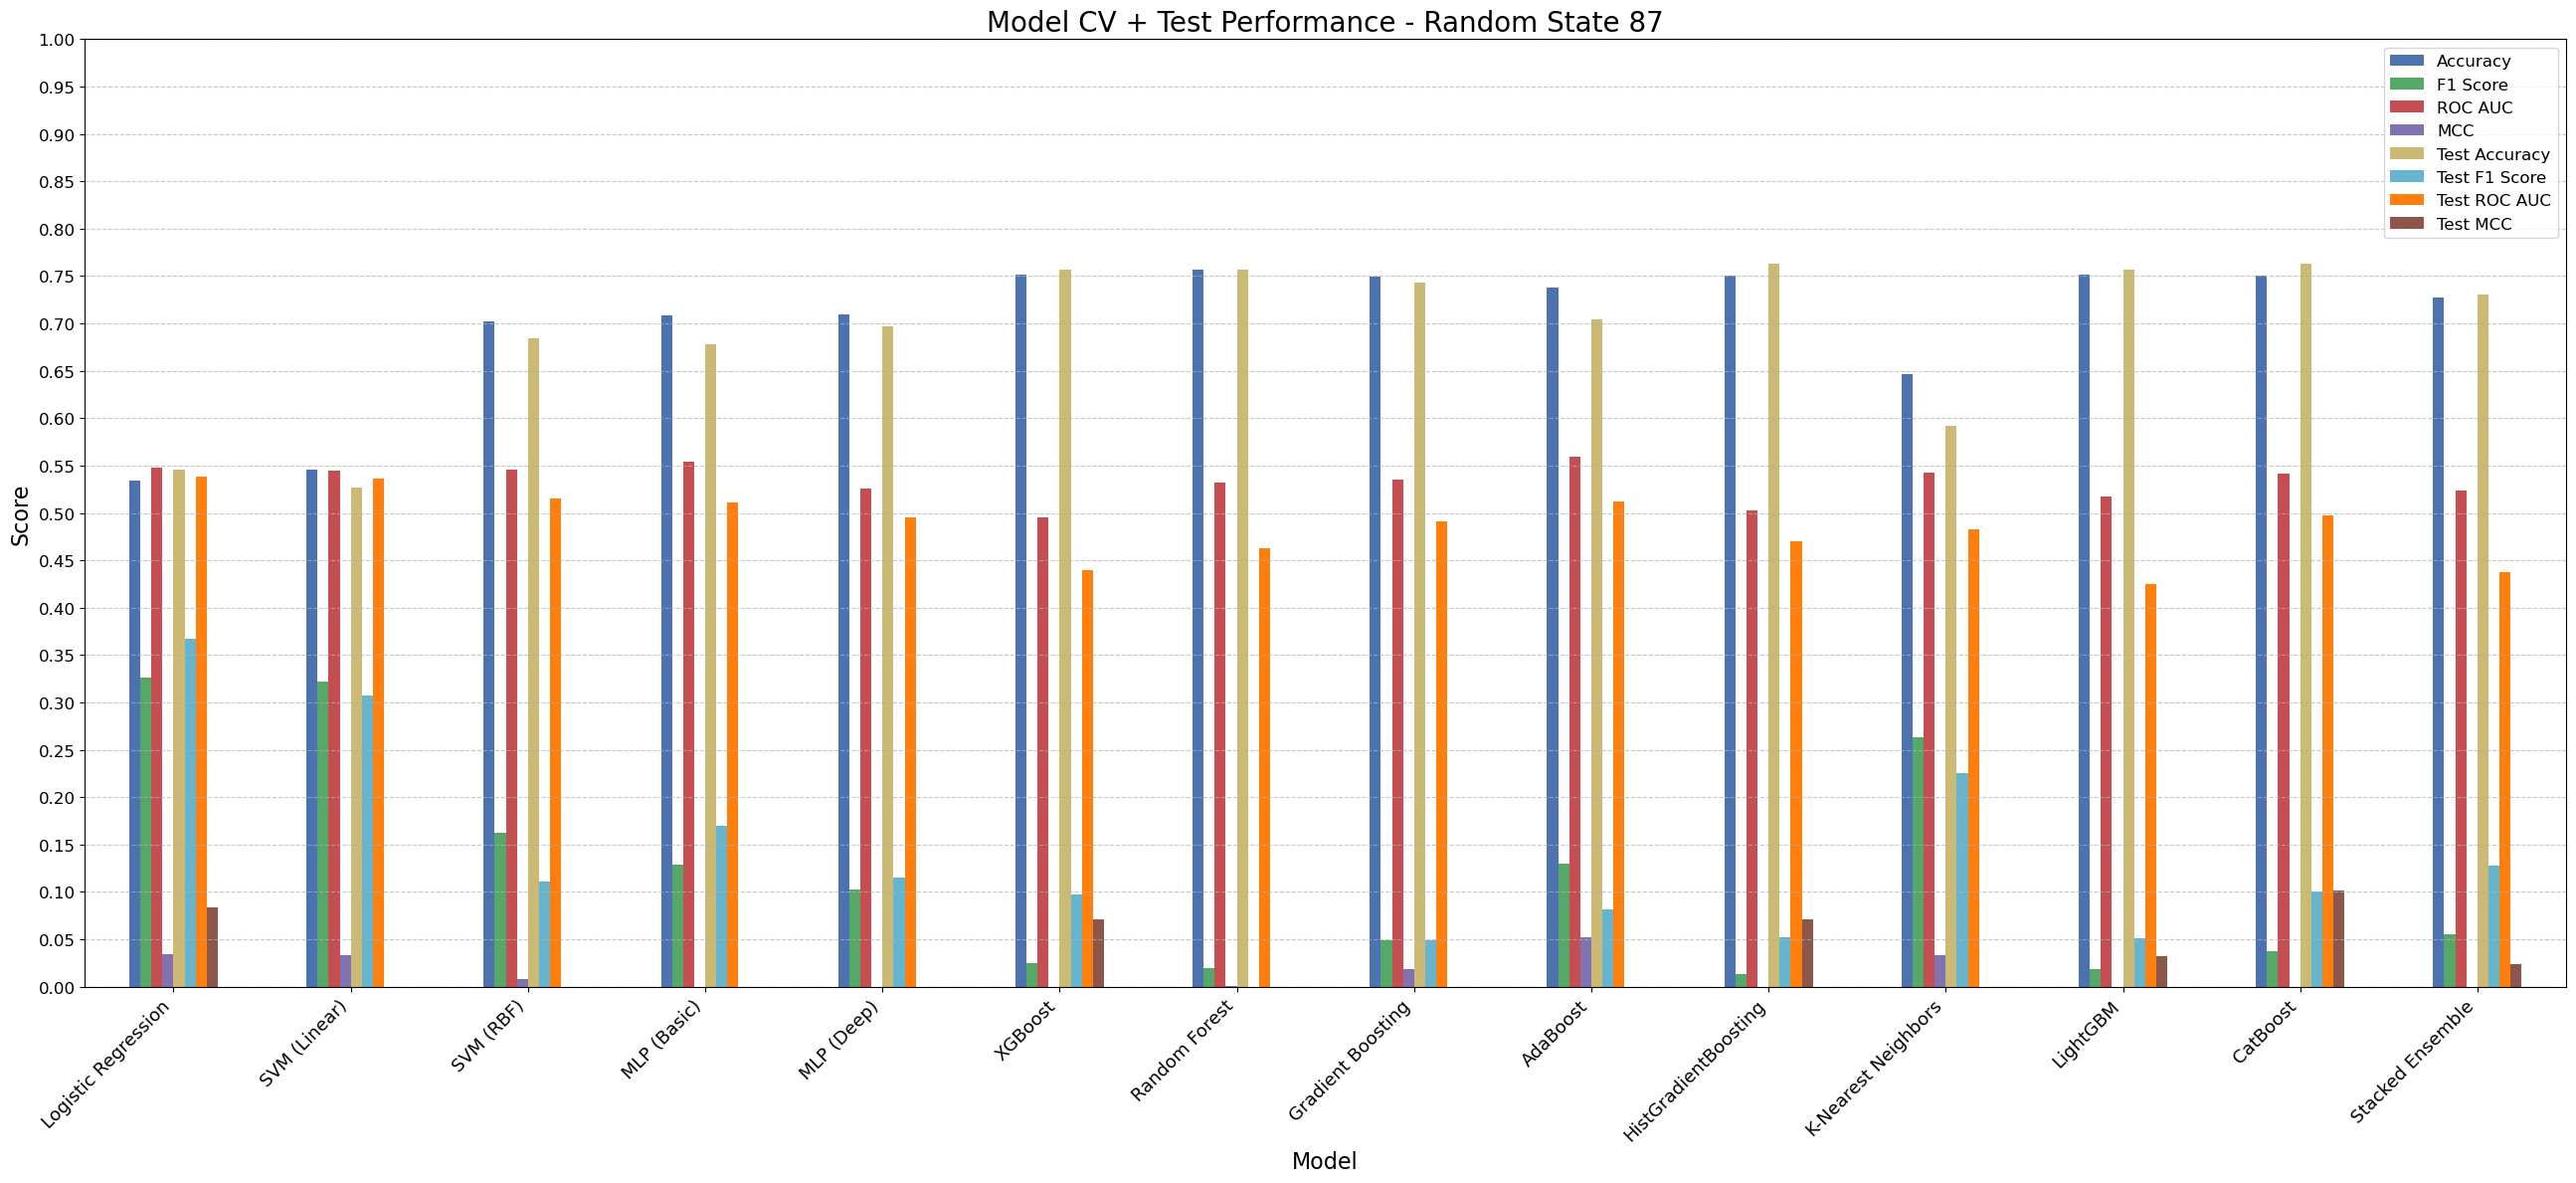


==================== Random State = 141 ====================

Train distribution: Counter({0: 461, 1: 144})

--- Logistic Regression ---
Accuracy:            0.5132
Balanced Accuracy:   0.5182
F1 Score:            0.3393
Recall:              0.5278
MCC:                 0.0309
ROC AUC Score:       0.5338
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.51      0.61       116
           1       0.25      0.53      0.34        36

    accuracy                           0.51       152
   macro avg       0.51      0.52      0.48       152
weighted avg       0.65      0.51      0.55       152


--- SVM (Linear) ---
Accuracy:            0.5263
Balanced Accuracy:   0.4981
F1 Score:            0.3077
Recall:              0.4444
MCC:                 -0.0033
ROC AUC Score:       0.5183
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       116
           1       0.

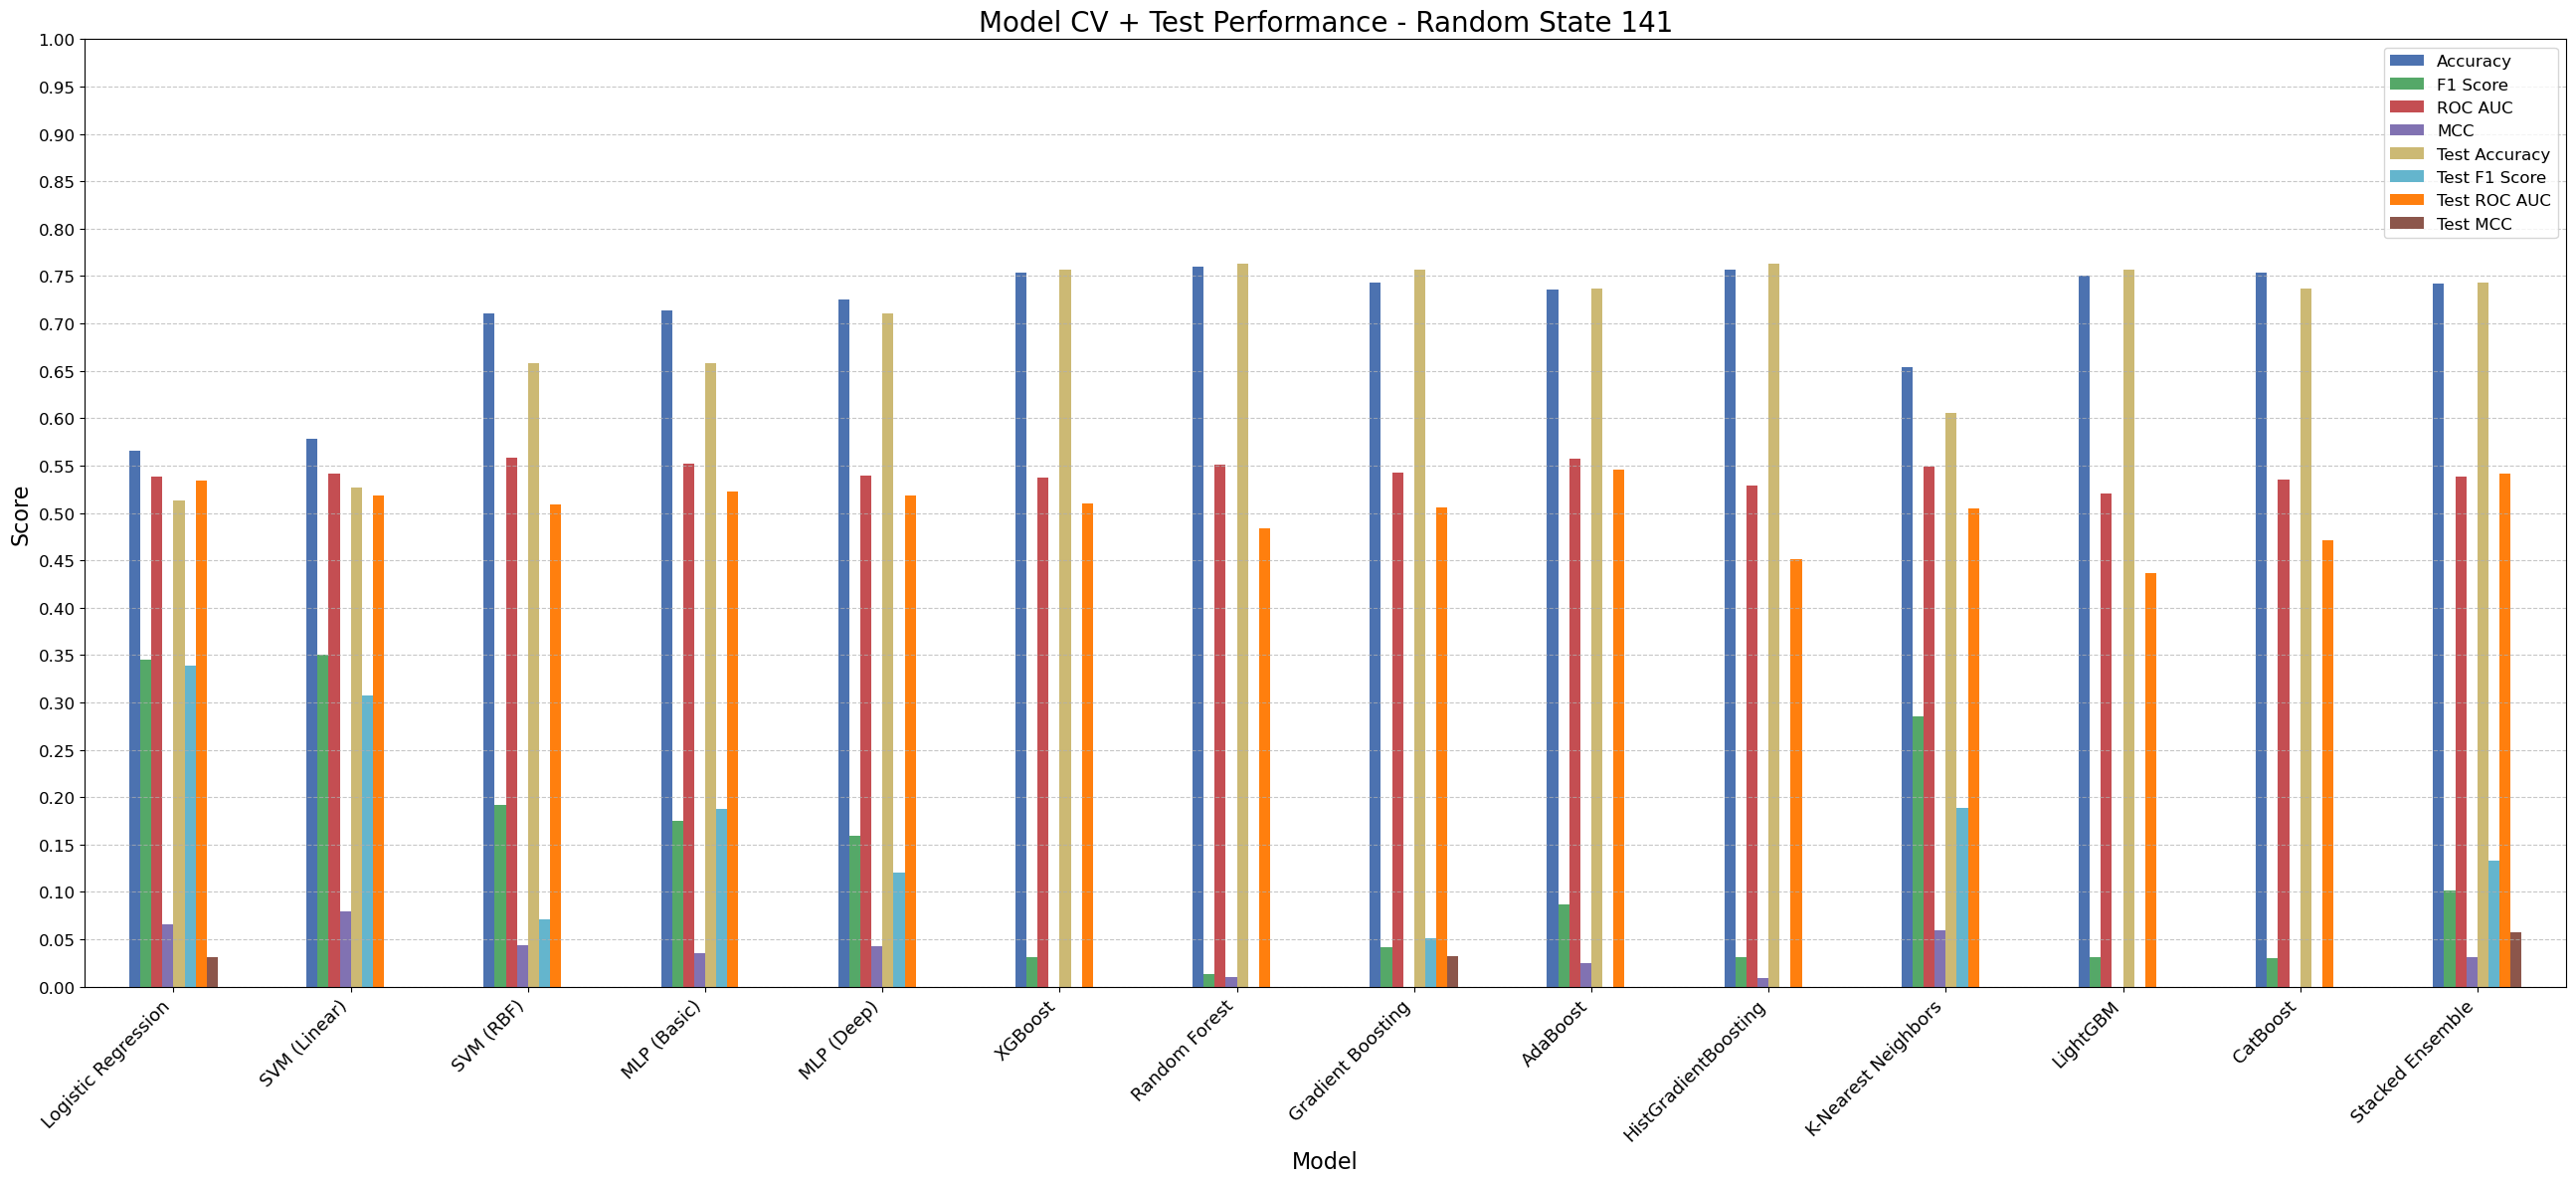


==================== Random State = 69 ====================

Train distribution: Counter({0: 461, 1: 144})

--- Logistic Regression ---
Accuracy:            0.5329
Balanced Accuracy:   0.5120
F1 Score:            0.3238
Recall:              0.4722
MCC:                 0.0204
ROC AUC Score:       0.5079
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       116
           1       0.25      0.47      0.32        36

    accuracy                           0.53       152
   macro avg       0.51      0.51      0.48       152
weighted avg       0.65      0.53      0.57       152


--- SVM (Linear) ---
Accuracy:            0.5197
Balanced Accuracy:   0.4938
F1 Score:            0.3048
Recall:              0.4444
MCC:                 -0.0106
ROC AUC Score:       0.4949
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63       116
           1       0.2

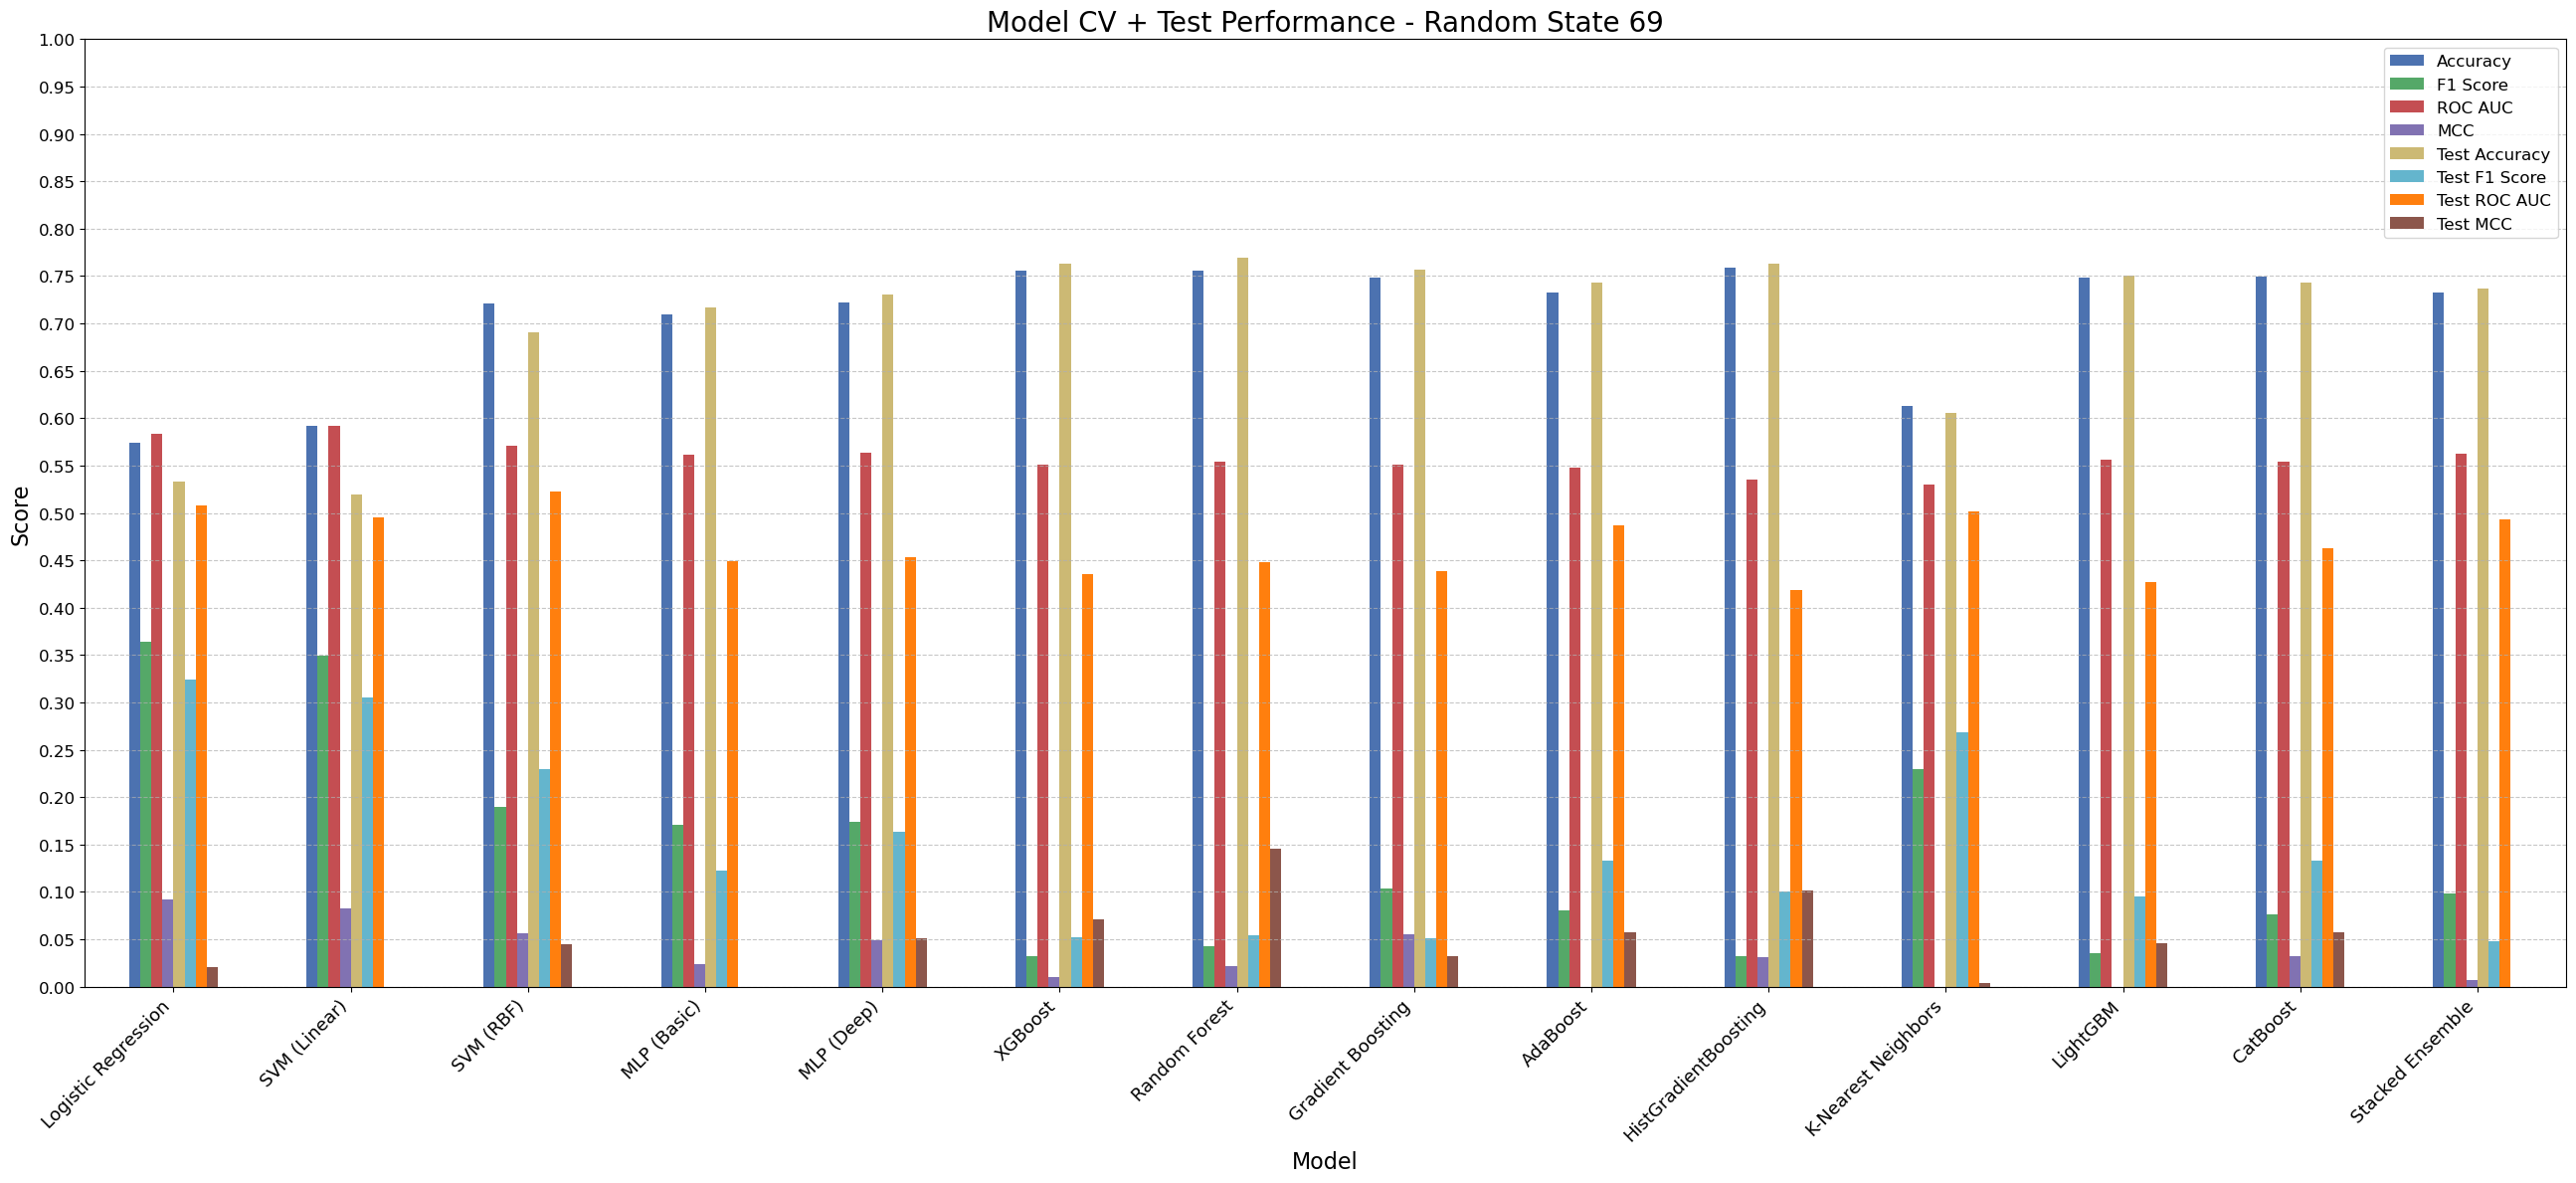


==================== Random State = 87 ====================

Train distribution: Counter({0: 461, 1: 144})

--- Logistic Regression ---
Accuracy:            0.5461
Balanced Accuracy:   0.5493
F1 Score:            0.3670
Recall:              0.5556
MCC:                 0.0840
ROC AUC Score:       0.5382
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.54      0.65       116
           1       0.27      0.56      0.37        36

    accuracy                           0.55       152
   macro avg       0.54      0.55      0.51       152
weighted avg       0.67      0.55      0.58       152


--- SVM (Linear) ---
Accuracy:            0.5263
Balanced Accuracy:   0.4981
F1 Score:            0.3077
Recall:              0.4444
MCC:                 -0.0033
ROC AUC Score:       0.5368
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       116
           1       0.2

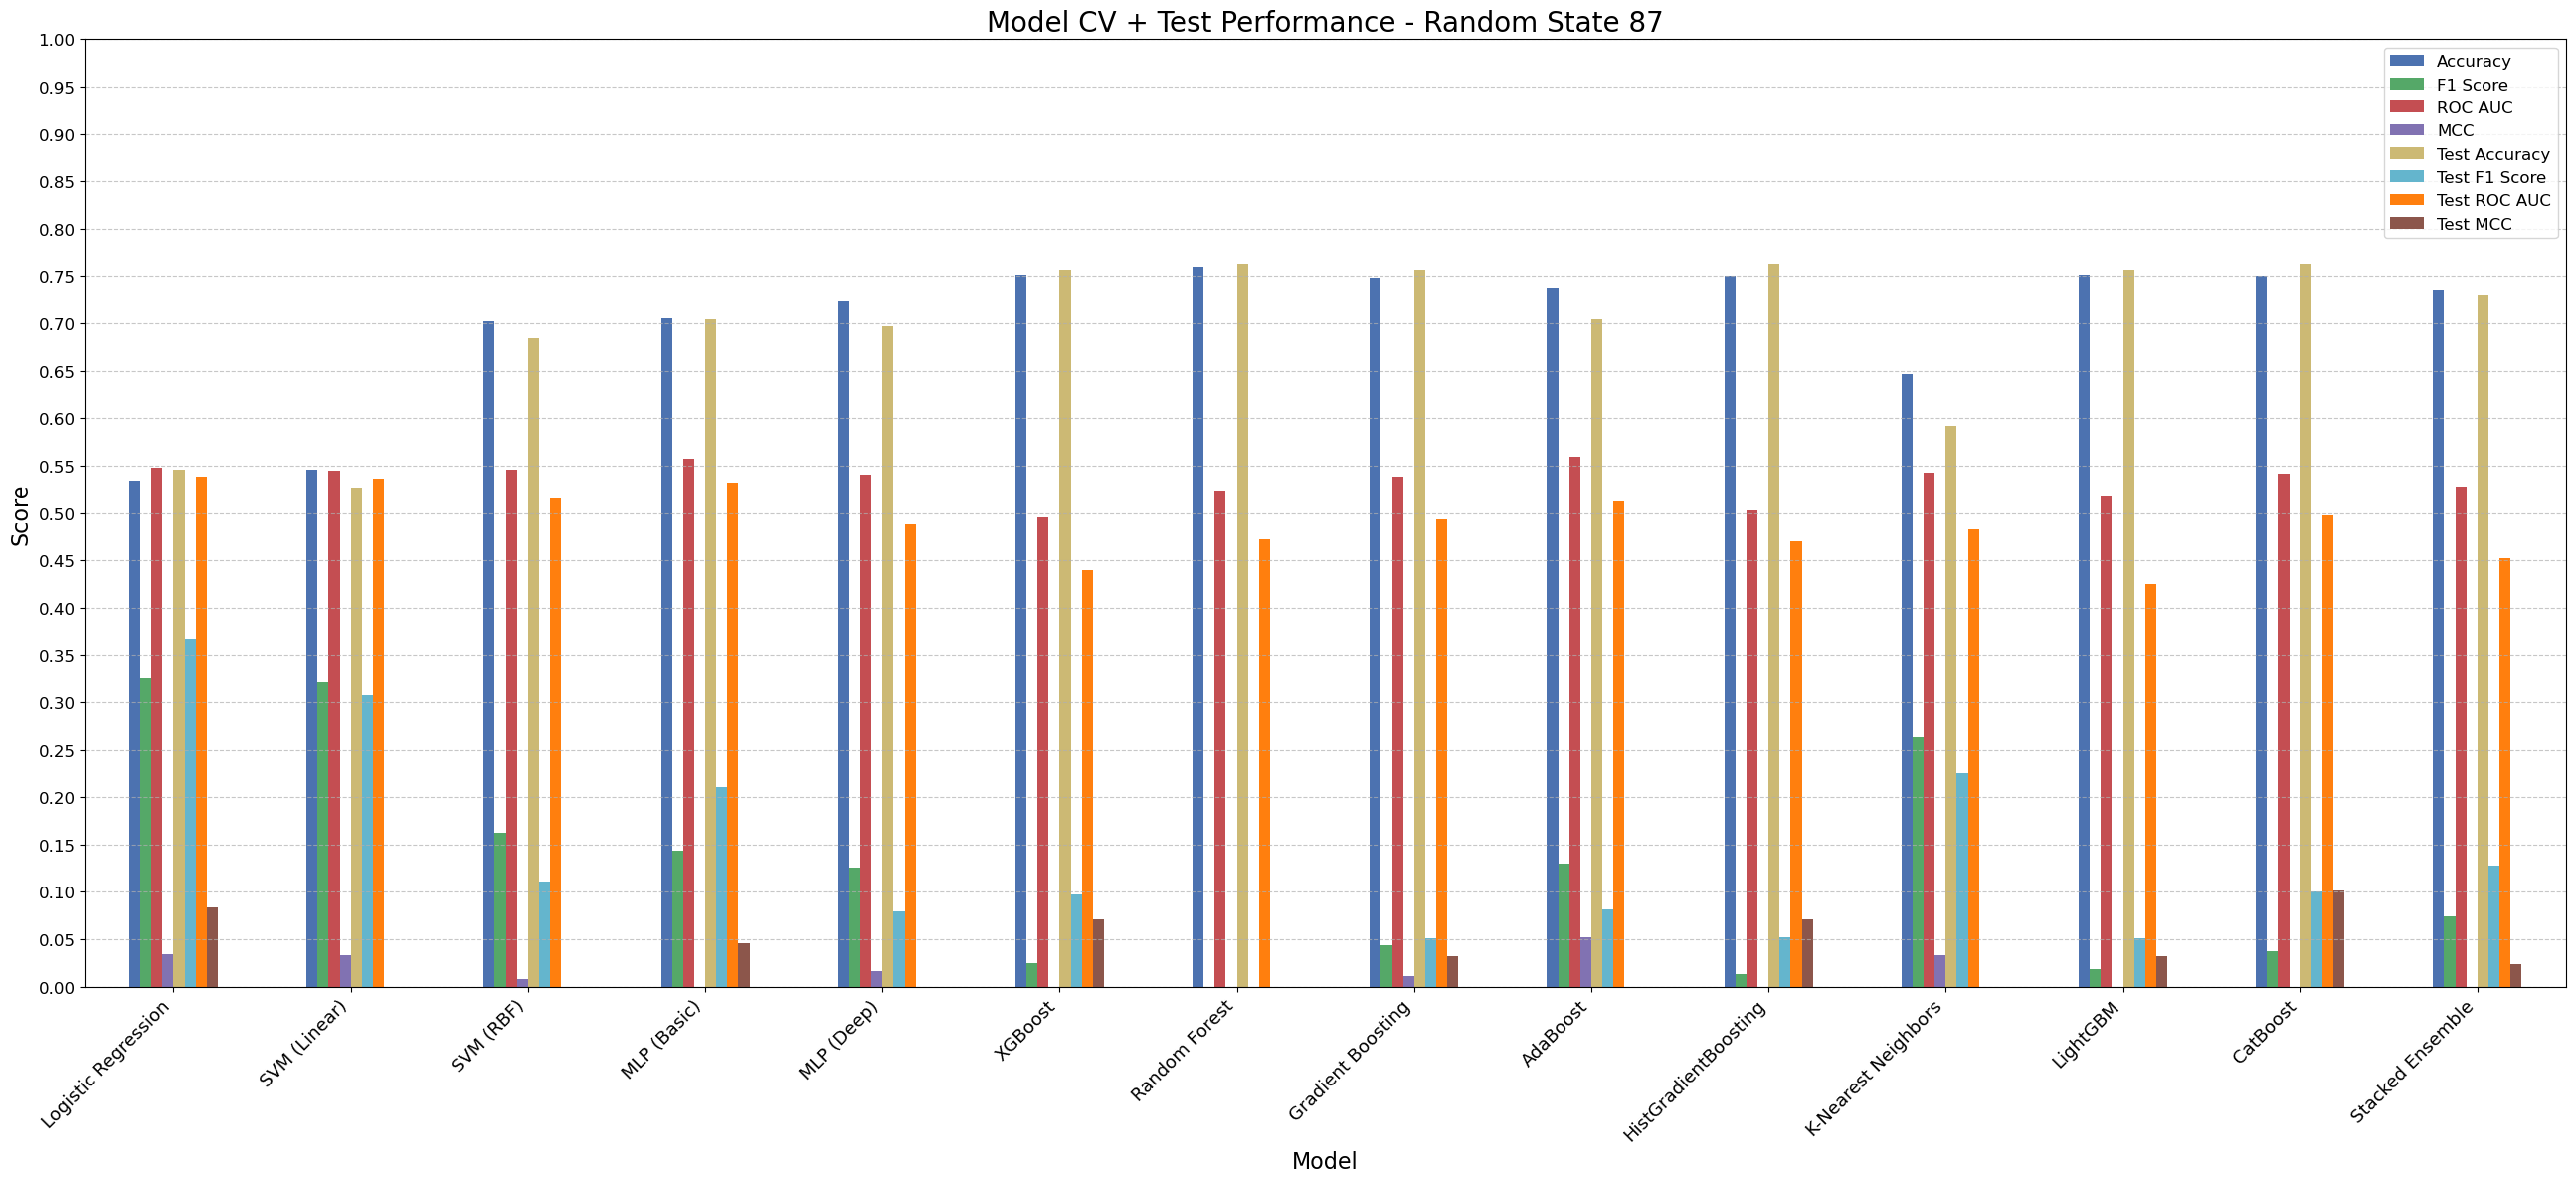


==================== Random State = 90 ====================

Train distribution: Counter({0: 461, 1: 144})

--- Logistic Regression ---
Accuracy:            0.5987
Balanced Accuracy:   0.5742
F1 Score:            0.3838
Recall:              0.5278
MCC:                 0.1281
ROC AUC Score:       0.6039
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       116
           1       0.30      0.53      0.38        36

    accuracy                           0.60       152
   macro avg       0.56      0.57      0.54       152
weighted avg       0.69      0.60      0.63       152


--- SVM (Linear) ---
Accuracy:            0.5921
Balanced Accuracy:   0.5508
F1 Score:            0.3542
Recall:              0.4722
MCC:                 0.0883
ROC AUC Score:       0.5797
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       116
           1       0.28

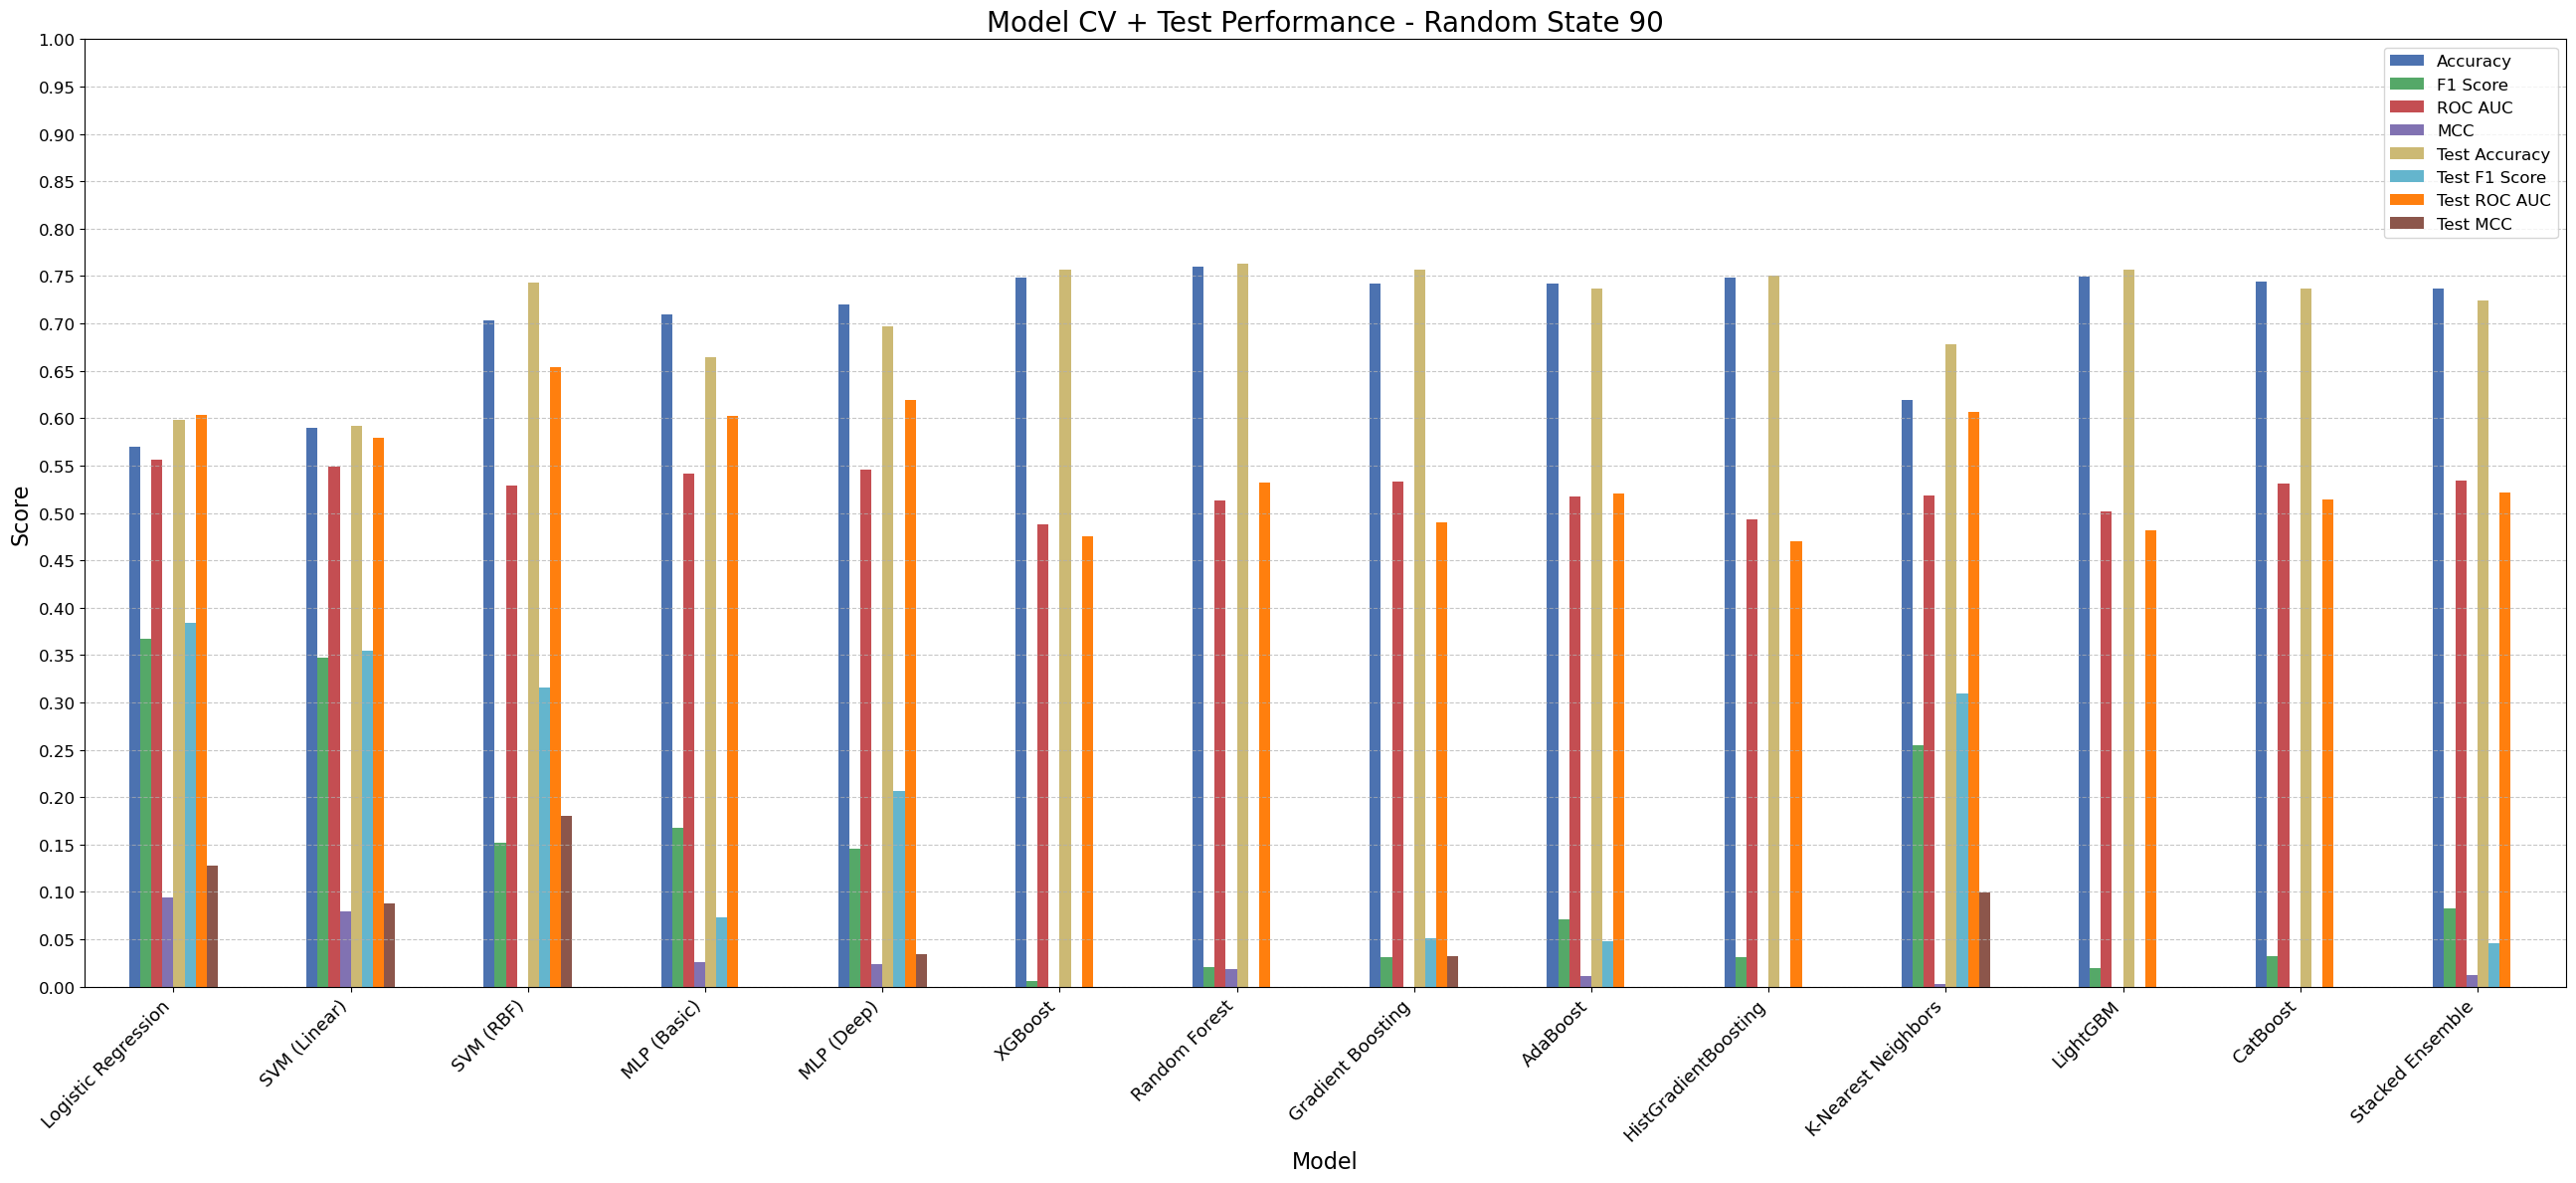

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
from collections import Counter

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef, recall_score
)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

warnings.filterwarnings("ignore")

# Evaluate model with CV, no test leakage
def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_pred))
        baccs.append(balanced_accuracy_score(y_val, y_pred))
        f1s.append(f1_score(y_val, y_pred))
        mccs.append(matthews_corrcoef(y_val, y_pred))
        recalls.append(recall_score(y_val, y_pred))
        aucs.append(roc_auc_score(y_val, y_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

# Final test evaluation
def evaluate_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_pred):.4f}")
    print(f"Recall:              {recall_score(y_test, y_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba),
        "Test MCC": matthews_corrcoef(y_test, y_pred)
    }

# Define base models
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Colors for plotting
custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

# Load your dataset (replace this with your actual data)
# Example:
# X, y = your_dataframe.drop('target', axis=1), your_dataframe['target']

random_states = [66, 20, 87, 141, 69, 87, 90]
all_results = {}

for seed in random_states:
    print(f"\n==================== Random State = {seed} ====================\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

    print("Train distribution:", Counter(y_train))

    result_dict = {}

    for name, model in base_models.items():
        print(f"\n--- {name} ---")

        pipeline = ImbPipeline([
            ('scale', StandardScaler()),
            ('smote', SMOTETomek(random_state=42)),
            ('clf', CalibratedClassifierCV(model, method='isotonic', cv=3))
        ])

        X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
        y_train_np = np.array(y_train)

        cv_metrics = evaluate_model_cv(pipeline, X_train_np, y_train_np)
        pipeline.fit(X_train_np, y_train_np)
        test_metrics = evaluate_test(pipeline, X_train_np, y_train_np, X_test, y_test)

        result_dict[name] = {**cv_metrics, **test_metrics}

    df_results = pd.DataFrame(result_dict).T
    all_results[seed] = df_results

    # Plotting with MCC
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC", "MCC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC", "Test MCC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



📌 Evaluating for random state: 87
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.5876             0.4860    0.2494   
SVM (Linear)            0.5793             0.4877    0.2601   
SVM (RBF)               0.6769             0.4834    0.1418   
MLP (Basic)             0.6521             0.5033    0.2291   
MLP (Deep)              0.6595             0.5104    0.2384   
XGBoost                 0.6760             0.5034    0.2001   
Random Forest           0.7116             0.4979    0.1263   
Gradient Boosting       0.6455             0.5036    0.2350   
AdaBoost                0

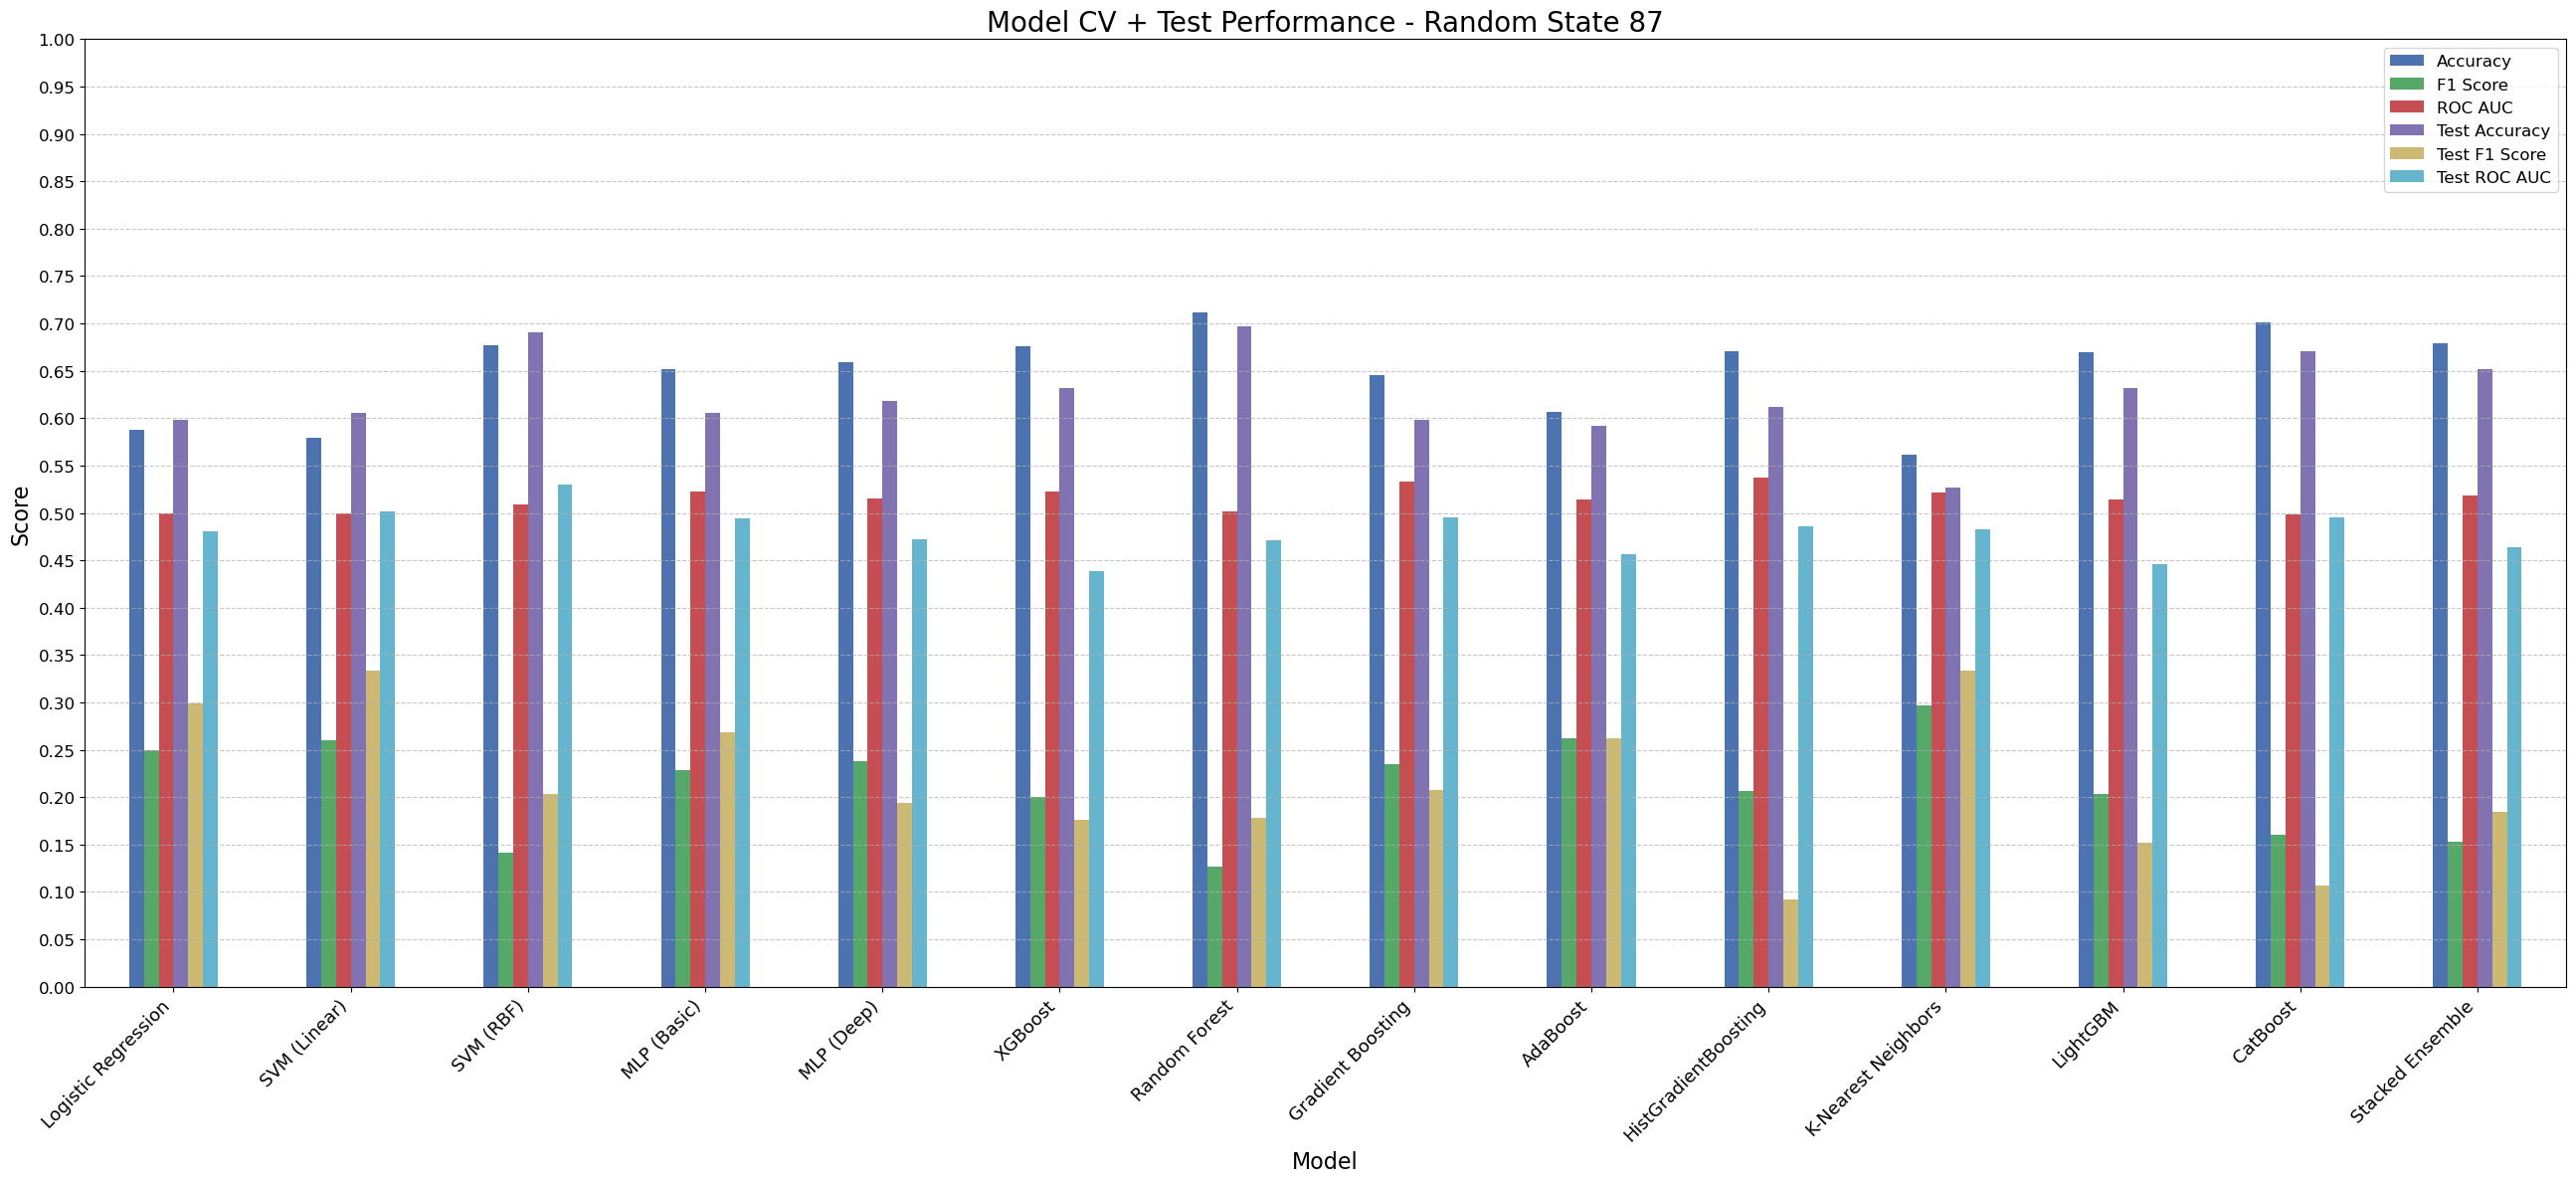

In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE


def generate_smote_data(X, y):
    smote = SMOTETomek(
    smote=SMOTE(k_neighbors=3, sampling_strategy='minority', random_state=42),
    random_state=42
    )
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res


def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        X_syn, y_syn = generate_smote_data(X_tr, y_tr)

        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_syn)
        X_val_scaled = scaler.transform(X_val)

        model.fit(X_tr_scaled, y_syn)
        y_val_pred = model.predict(X_val_scaled)
        y_val_proba = model.predict_proba(X_val_scaled)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }


def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    X_syn, y_syn = generate_smote_data(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_syn)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_syn)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }


# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [87]
all_results = {}

# 🔁 Replace below with your actual data
# X = pd.DataFrame(...)  # SNP features
# y = pd.Series(...)     # labels

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")

    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(X), pd.Series(y), test_size=0.2, random_state=seed, stratify=y
    )

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train, y_train)
        test_metrics = evaluate_on_test(model, X_train, y_train, X_test, y_test)
        metrics.update(test_metrics)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



📌 Evaluating for random state: 42
→ Evaluating Logistic Regression
🔍 Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.27      0.41       116
           1       0.26      0.83      0.40        36

    accuracy                           0.40       152
   macro avg       0.55      0.55      0.40       152
weighted avg       0.70      0.40      0.40       152

→ Evaluating SVM (Linear)
🔍 Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.04      0.08       116
           1       0.24      0.97      0.38        36

    accuracy                           0.26       152
   macro avg       0.54      0.51      0.23       152
weighted avg       0.69      0.26      0.15       152

→ Evaluating Random Forest
🔍 Test Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67       116
           1       0.25

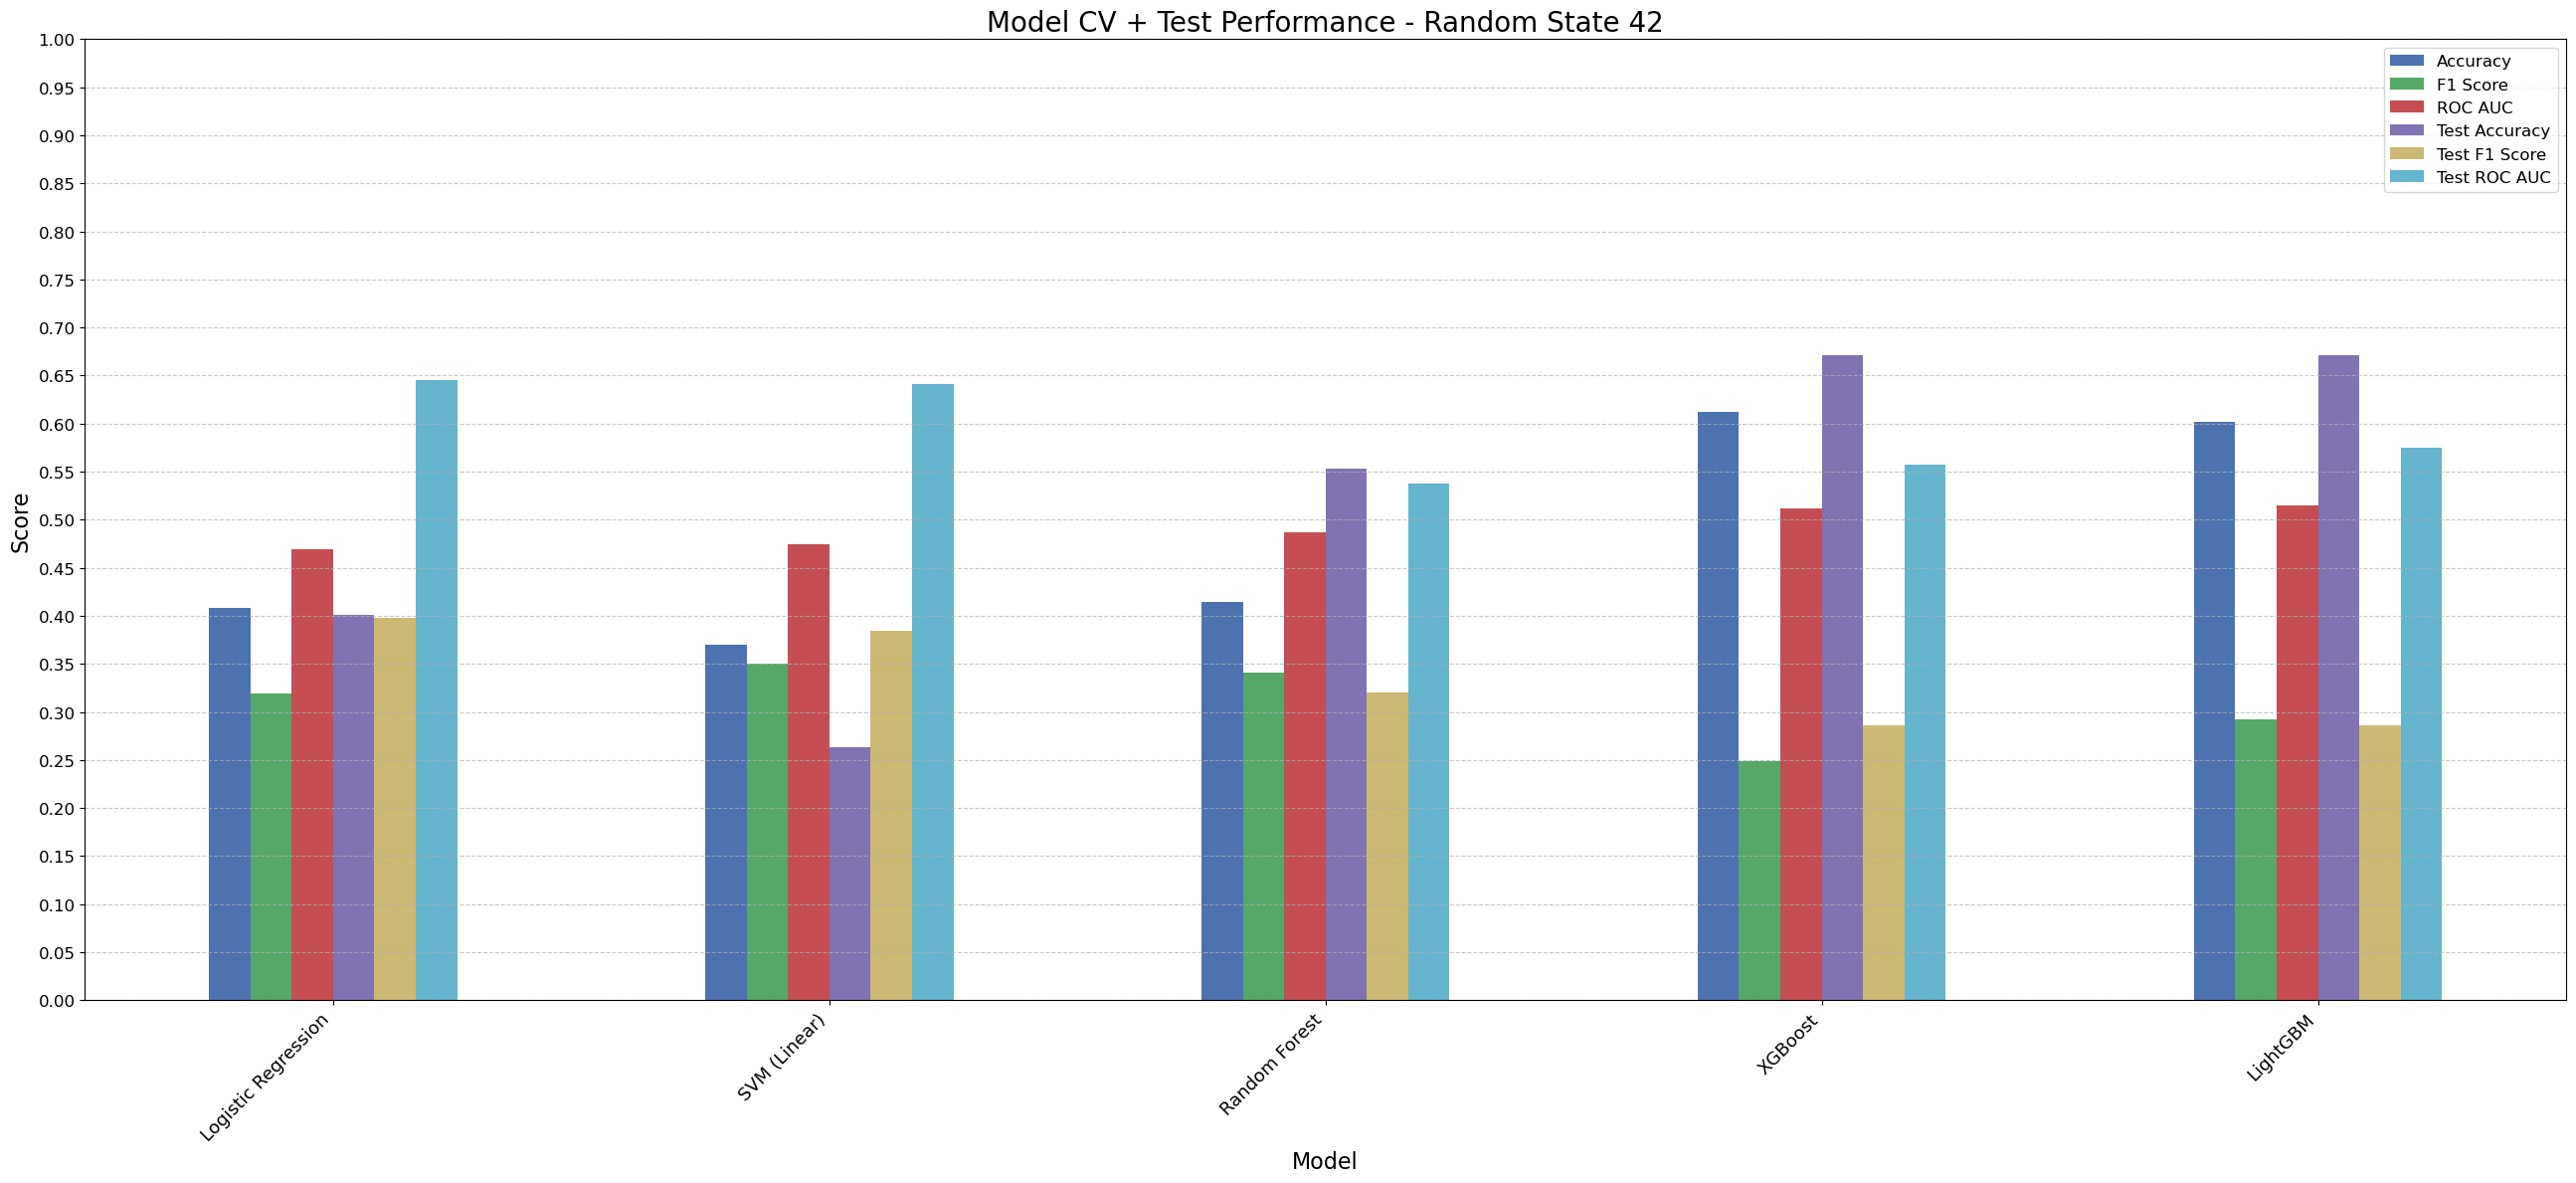

In [15]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score, classification_report
)
from imblearn.over_sampling import ADASYN


def evaluate_model_cv(model, X, y, threshold=0.5):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Apply ADASYN inside the fold
        ada = ADASYN(random_state=42)
        X_tr, y_tr = ada.fit_resample(X_tr, y_tr)

        # Scale
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        # Train and predict
        model.fit(X_tr, y_tr)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        y_val_pred = (y_val_proba >= threshold).astype(int)

        # Collect metrics
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }


def evaluate_on_test(model, X_train, y_train, X_test, y_test, threshold=0.5):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ada = ADASYN(random_state=42)
    X_train_aug, y_train_aug = ada.fit_resample(X_train_scaled, y_train)

    model.fit(X_train_aug, y_train_aug)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    print("🔍 Test Classification Report:\n", classification_report(y_test, y_pred))

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }


# Define models (simplified for smaller dataset)
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1)
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [42]
all_results = {}

# Replace these lines with your actual SNP dataset
# Example placeholder:
# X = pd.DataFrame(...)   # shape (n_samples, 30)
# y = pd.Series(...)      # binary labels (0 or 1)

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")

    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(X), pd.Series(y), test_size=0.2, random_state=seed, stratify=y
    )

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train, y_train, threshold=0.3)  # Adjusted threshold
        test_metrics = evaluate_on_test(model, X_train, y_train, X_test, y_test, threshold=0.3)
        metrics.update(test_metrics)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sdv.tabular import CTGAN
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)




def generate_ctgan_data(X, y, samples=None):
    df = X.copy()
    df['target'] = y.reset_index(drop=True)

    ctgan = CTGAN(epochs=300)
    ctgan.fit(df)

    synthetic = ctgan.sample(len(df) if samples is None else samples)
    y_syn = synthetic['target']
    X_syn = synthetic.drop(columns=['target'])
    return X_syn, y_syn


def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        X_syn, y_syn = generate_ctgan_data(X_tr, y_tr)

        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_syn)
        X_val_scaled = scaler.transform(X_val)

        model.fit(X_tr_scaled, y_syn)
        y_val_pred = model.predict(X_val_scaled)
        y_val_proba = model.predict_proba(X_val_scaled)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }


def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    X_syn, y_syn = generate_ctgan_data(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_syn)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_syn)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }


# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [87]
all_results = {}

# Dummy dataset placeholder (replace with your real data)
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, weights=[0.7, 0.3], random_state=42)

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")

    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(X), pd.Series(y), test_size=0.2, random_state=seed, stratify=y
    )

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train, y_train)
        test_metrics = evaluate_on_test(model, X_train, y_train, X_test, y_test)
        metrics.update(test_metrics)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


ModuleNotFoundError: No module named 'sdv.tabular'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek


def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Apply SMOTETomek inside the fold
        smt = SMOTETomek(random_state=42)
        X_tr, y_tr = smt.fit_resample(X_tr, y_tr)

        # Scale
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        # Train and predict
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        # Collect metrics
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }


def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    smt = SMOTETomek(random_state=42)
    X_train_aug, y_train_aug = smt.fit_resample(X_train_scaled, y_train)

    model.fit(X_train_aug, y_train_aug)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }


# Define your models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [87]
all_results = {}

# Example X, y loading placeholder
# Replace with your real dataset
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, weights=[0.7, 0.3], random_state=42)

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")

    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(X), pd.Series(y), test_size=0.2, random_state=seed, stratify=y
    )

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train, y_train)
        test_metrics = evaluate_on_test(model, X_train, y_train, X_test, y_test)
        metrics.update(test_metrics)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)

    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
    


ImportError: cannot import name 'SMOTENN' from 'imblearn.combine' (c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\imblearn\combine\__init__.py)


📌 Evaluating for random state: 66
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble

📊 CV + Test Results:
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.5636             0.5273    0.3317   
SVM (Linear)            0.5587             0.5312    0.3398   
SVM (RBF)               0.7000             0.5201    0.2166   
MLP (Basic)             0.6777             0.5295    0.2626   
MLP (Deep)              0.6744             0.5165    0.2359   
XGBoost                 0.7124             0.5282    0.2257   
Random Forest           0.7504             0.5030    0.0543   
Gradient Boosting       0.7463             0.5481    0.2391   
Ada

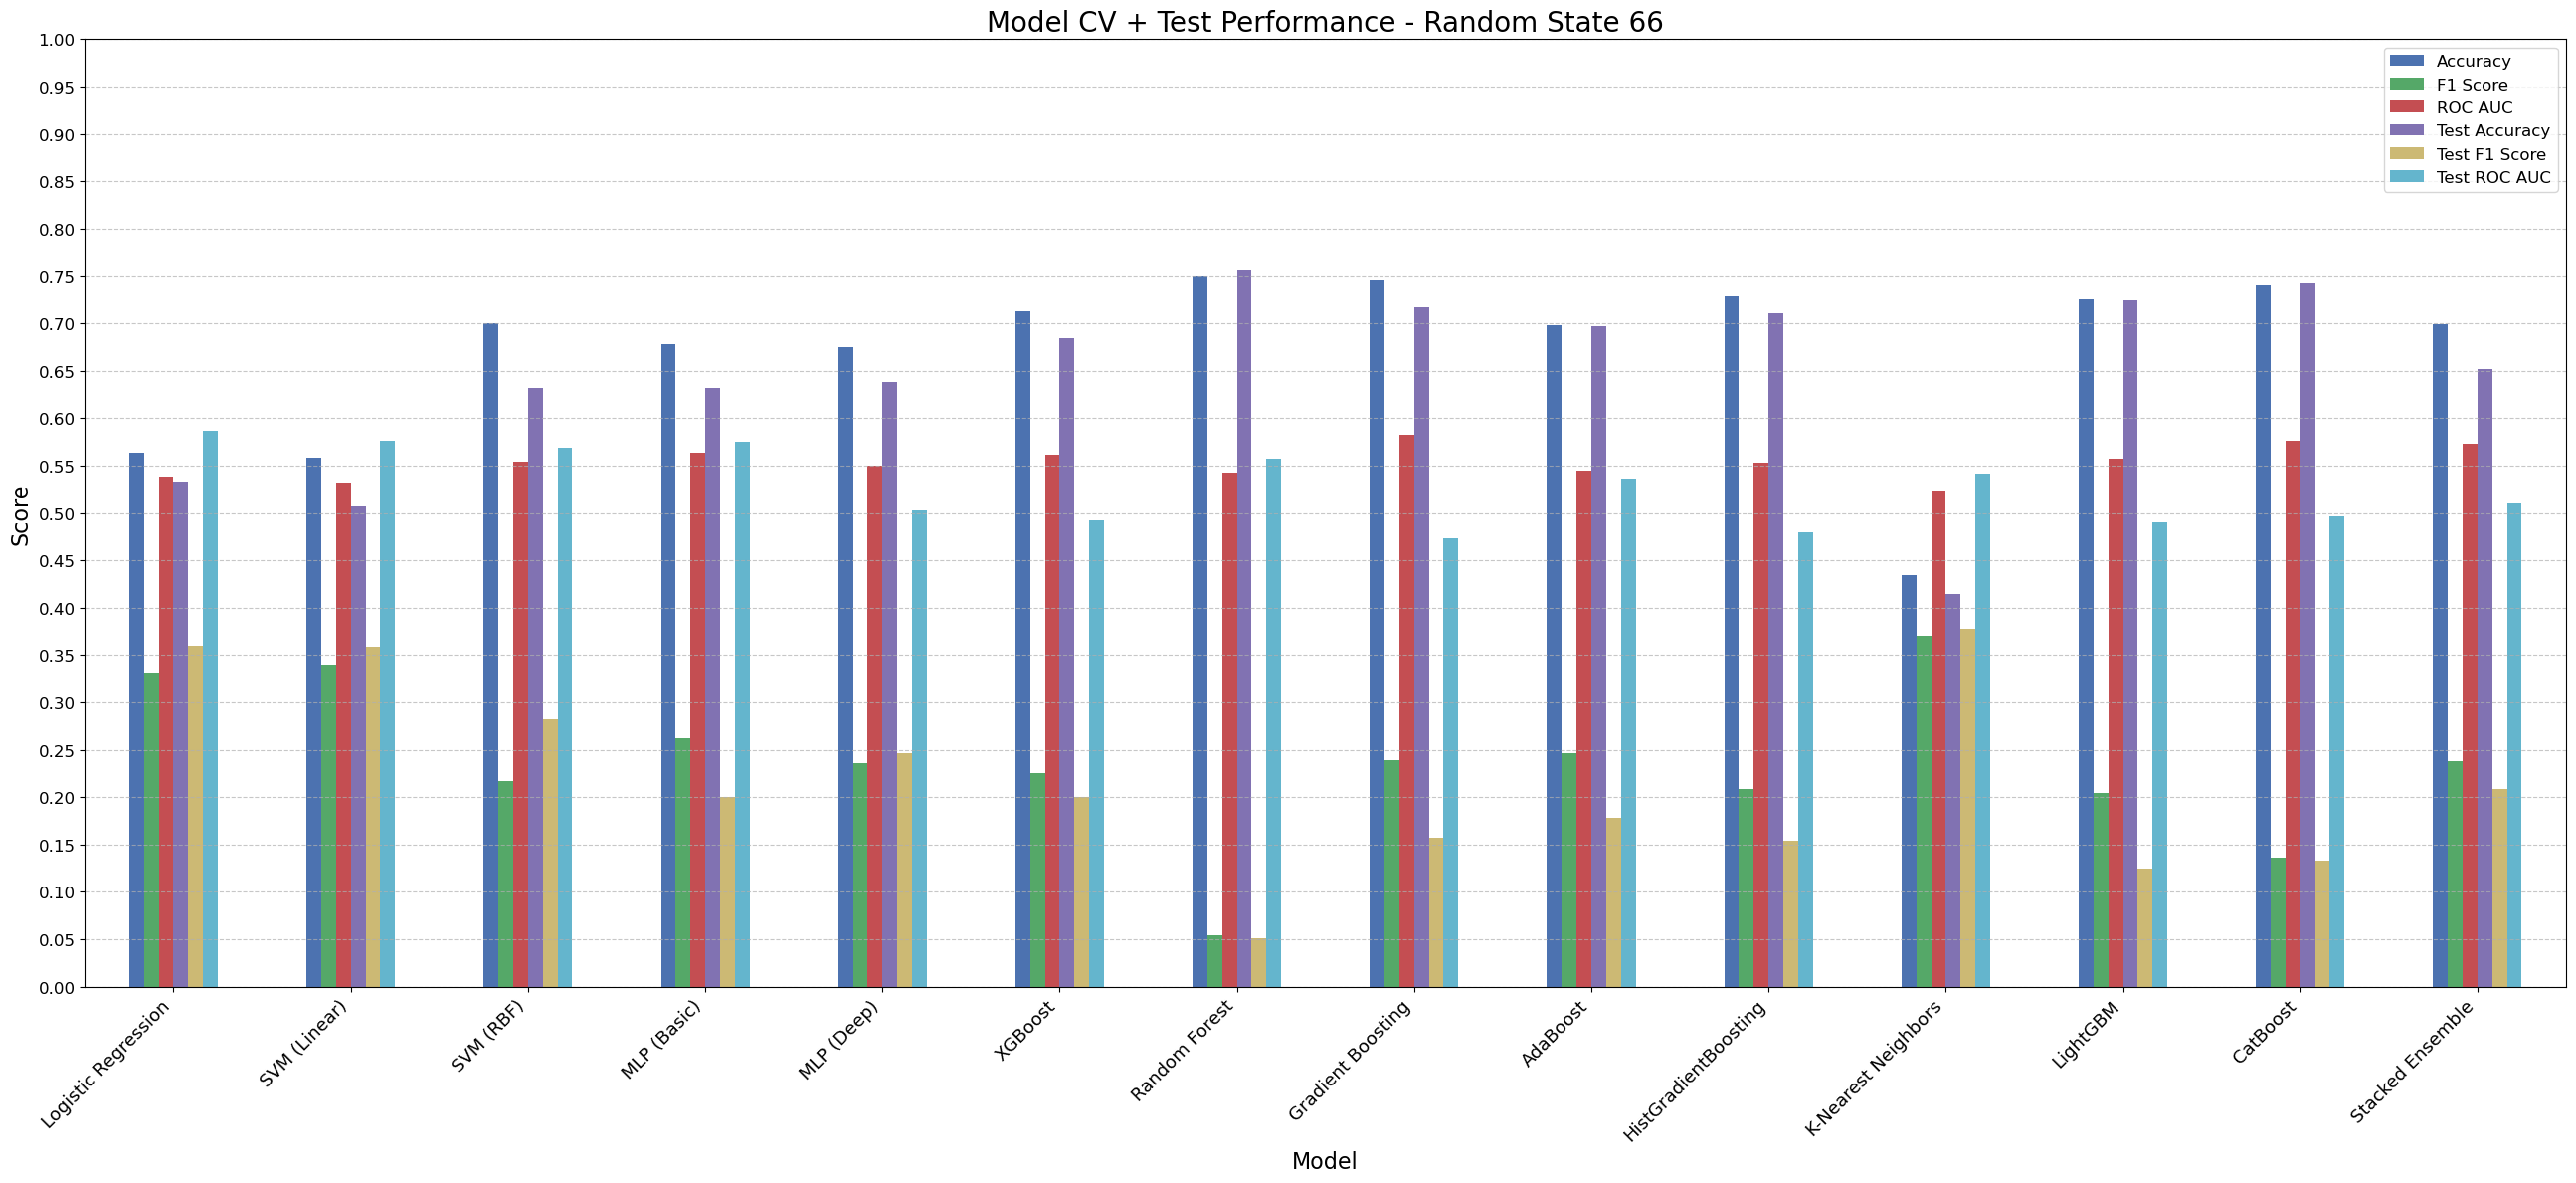

In [21]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Generate a synthetic dataset


# Cross-validation evaluation
def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]


        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('smt', SMOTETomek(random_state=42)),
            ('clf', model)
        ])

        pipeline.fit(X_tr, y_tr)
        y_val_pred = pipeline.predict(X_val)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

# Test set evaluation
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smt', SMOTETomek(random_state=42)),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

# Multiple random seeds
random_states = [66]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    results_combined = {}

    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics_cv = evaluate_model_cv(model, X_train, y_train)
        metrics_test = evaluate_on_test(model, X_train, y_train, X_test, y_test)
        combined = {**metrics_cv, **metrics_test}
        results_combined[name] = combined

    df_results = pd.DataFrame(results_combined).T
    all_results[seed] = df_results

    print("\n📊 CV + Test Results:")
    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # ✅ Set y-axis from 0.00 to 1.00 with ticks every 0.05
    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', which='major', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


📌 Evaluating for random state: 87
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8302             0.8302    0.8299   
SVM (Linear)            0.8351             0.8352    0.8376   
SVM (RBF)               0.9731             0.9731    0.9735   
MLP (Basic)             0.9767             0.9767    0.9769   
MLP (Deep)              0.9754             0.9754    0.9756   
XGBoost                 0.9453             0.9454    0.9459   
Random Forest           0.9427             0.9427    0.9428   
Gradient Boosting       0.9350             0.9350    0.9361   
AdaBoost                0

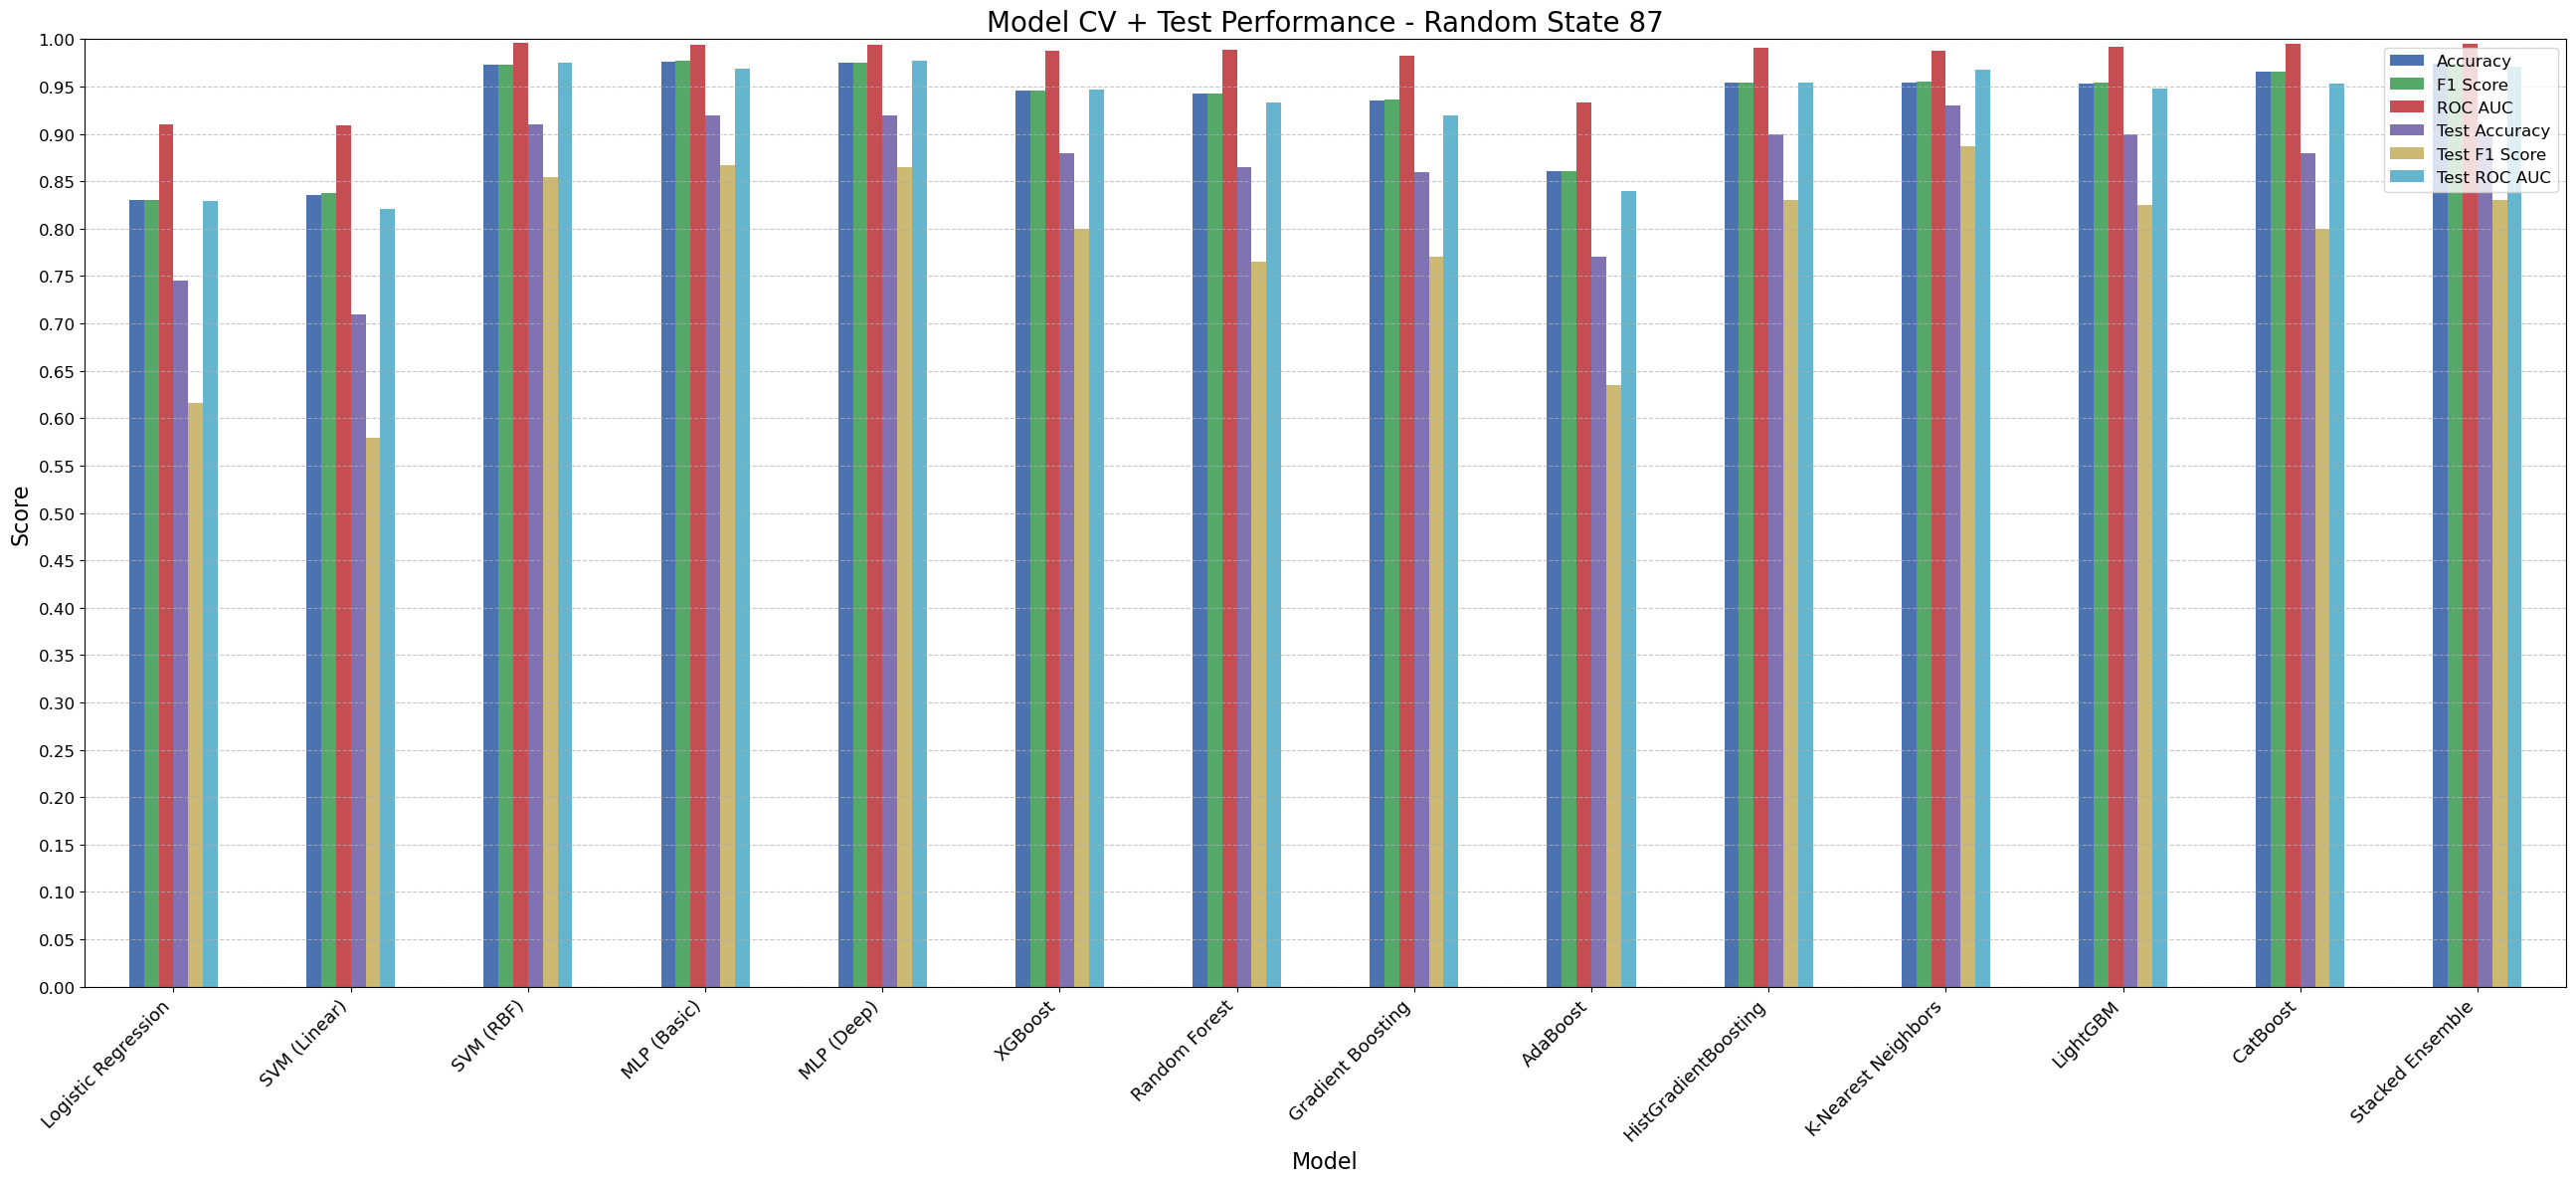

In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek



def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    smt = SMOTETomek(random_state=42)
    X_train_aug, y_train_aug = smt.fit_resample(X_train_scaled, y_train)

    model.fit(X_train_aug, y_train_aug)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [87]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(X), pd.Series(y), test_size=0.2, random_state=seed, stratify=y
    )
    
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train_aug, y_train_aug)
        test_metrics = evaluate_on_test(model, X_train, y_train, X_test, y_test)
        metrics.update(test_metrics)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # Y-axis ticks at 0.00, 0.05, ..., 1.00
    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)

    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



📌 Evaluating for random state: 87
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8238             0.8136    0.7294   
SVM (Linear)            0.8188             0.8096    0.7236   
SVM (RBF)               0.9606             0.9553    0.9351   
MLP (Basic)             0.9556             0.9494    0.9267   
MLP (Deep)              0.9538             0.9434    0.9225   
XGBoost                 0.9169             0.8981    0.8602   
Random Forest           0.9106             0.8836    0.8456   
Gradient Boosting       0.8994             0.8827    0.8341   
AdaBoost                0

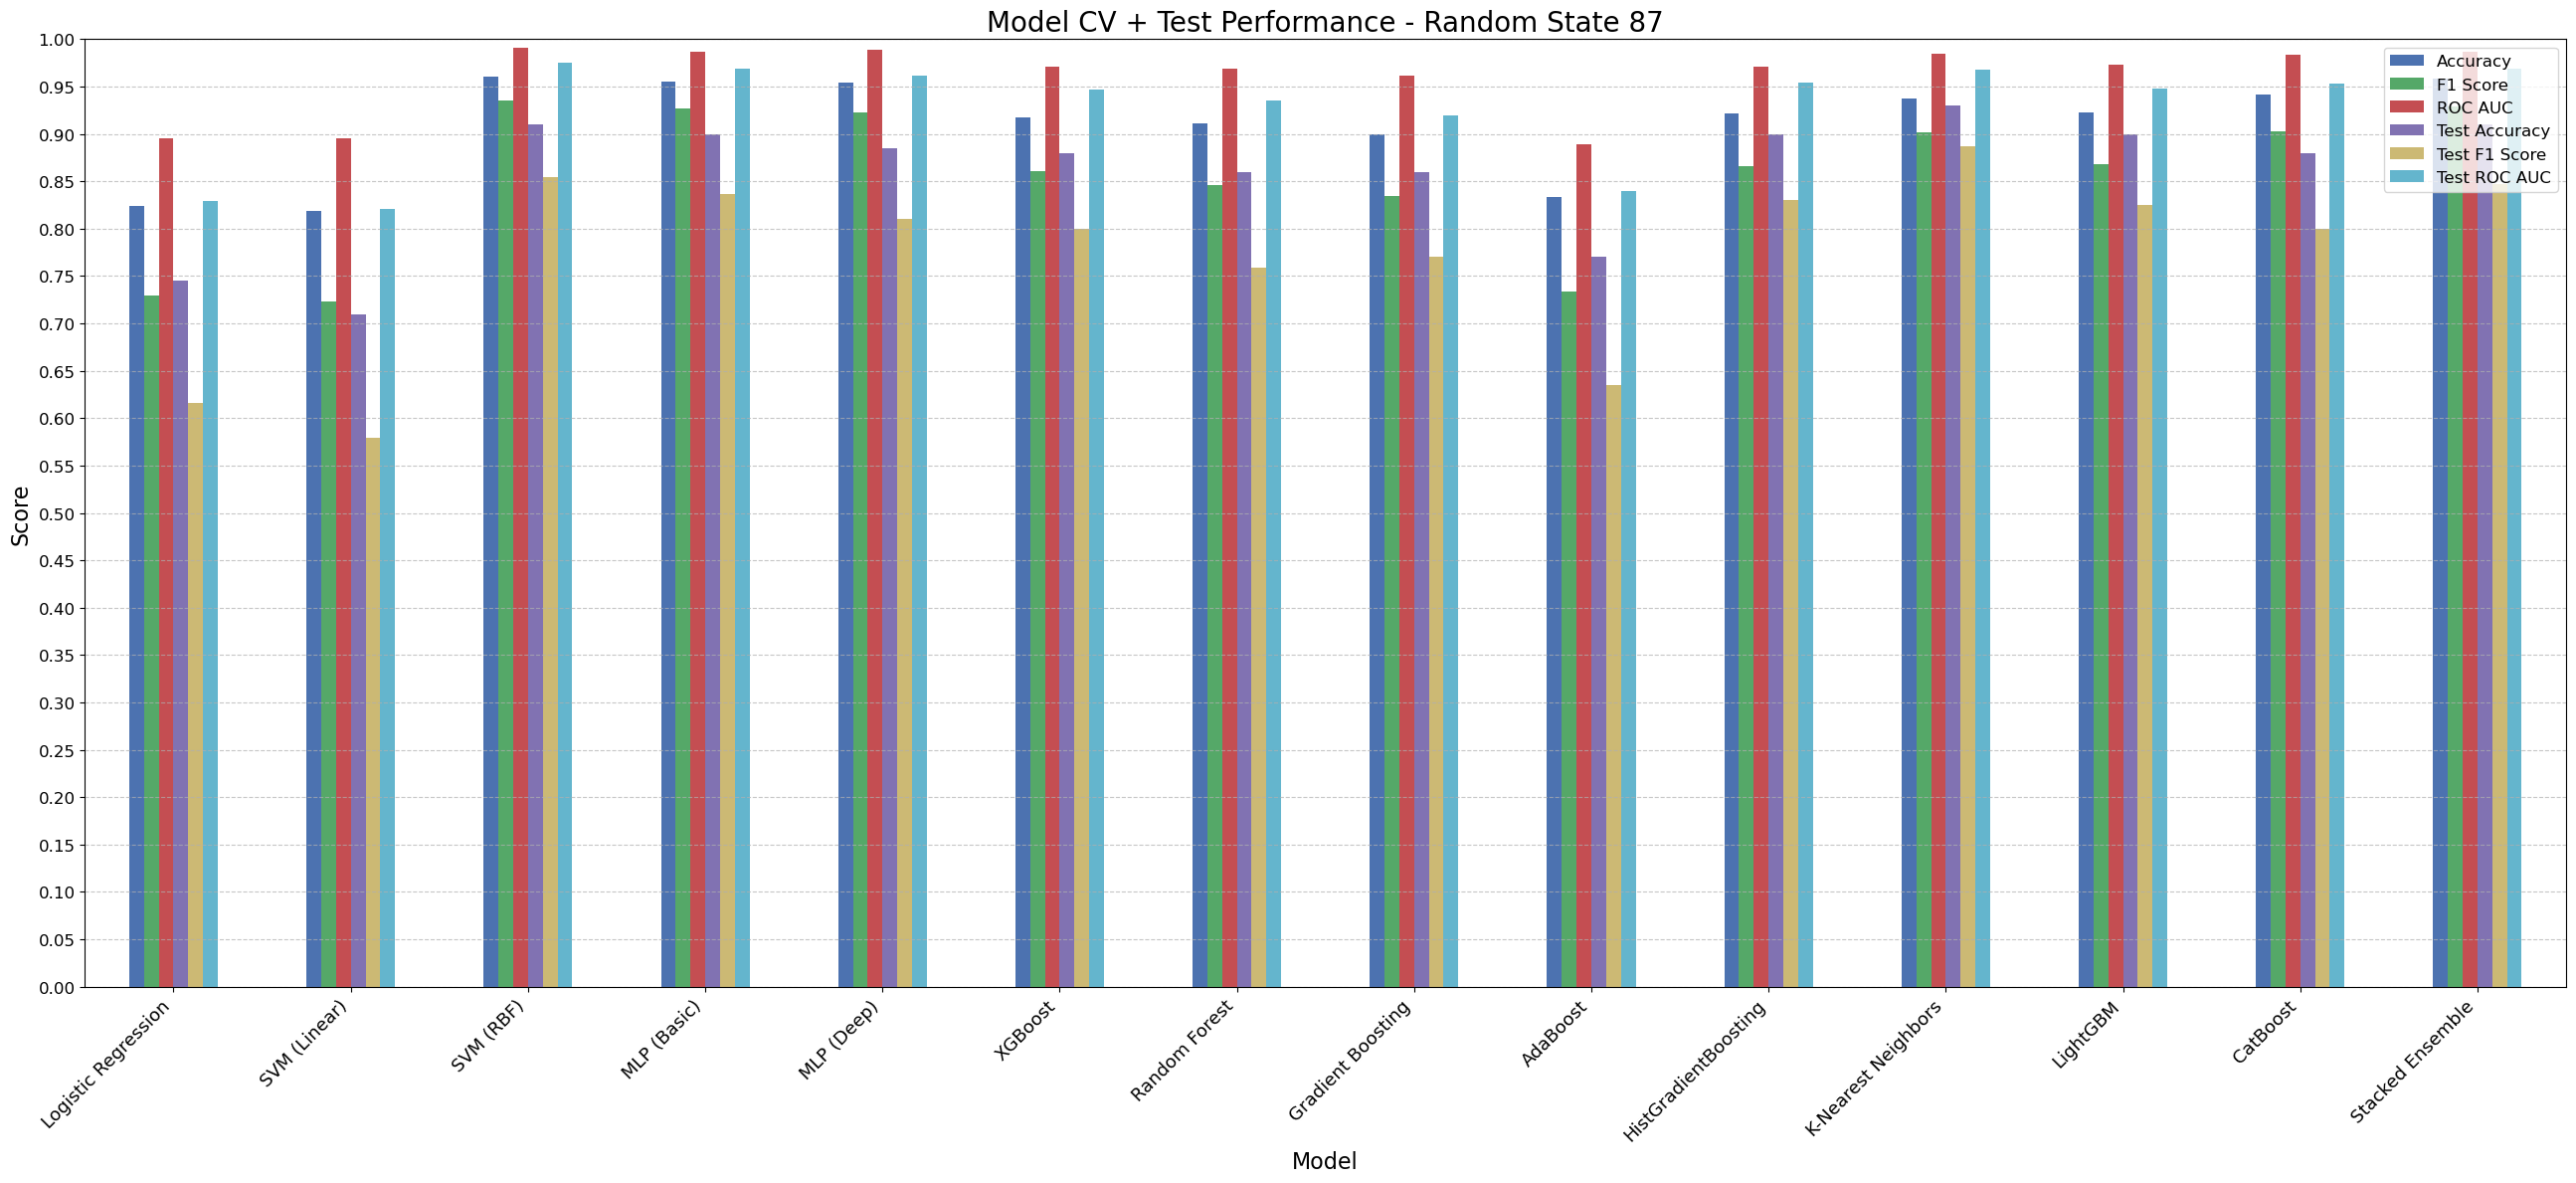

In [29]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek


def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Apply SMOTETomek inside the fold
        smt = SMOTETomek(random_state=42)
        X_tr, y_tr = smt.fit_resample(X_tr, y_tr)

        # Scale
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        # Train and predict
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        # Collect metrics
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }


def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    smt = SMOTETomek(random_state=42)
    X_train_aug, y_train_aug = smt.fit_resample(X_train_scaled, y_train)

    model.fit(X_train_aug, y_train_aug)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }


# Define your models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [87]
all_results = {}

# Example X, y loading placeholder
# Replace with your real dataset
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, weights=[0.7, 0.3], random_state=42)

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")

    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(X), pd.Series(y), test_size=0.2, random_state=seed, stratify=y
    )

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train, y_train)
        test_metrics = evaluate_on_test(model, X_train, y_train, X_test, y_test)
        metrics.update(test_metrics)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)

    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



📌 Evaluating for random state: 87
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.6857             0.6857    0.6909   
SVM (Linear)            0.6934             0.6934    0.7022   
SVM (RBF)               0.8231             0.8231    0.8231   
MLP (Basic)             0.8000             0.8000    0.8071   
MLP (Deep)              0.7995             0.7995    0.8061   
XGBoost                 0.8297             0.8297    0.8341   
Random Forest           0.8588             0.8588    0.8582   
Gradient Boosting       0.7857             0.7857    0.7915   
AdaBoost                0

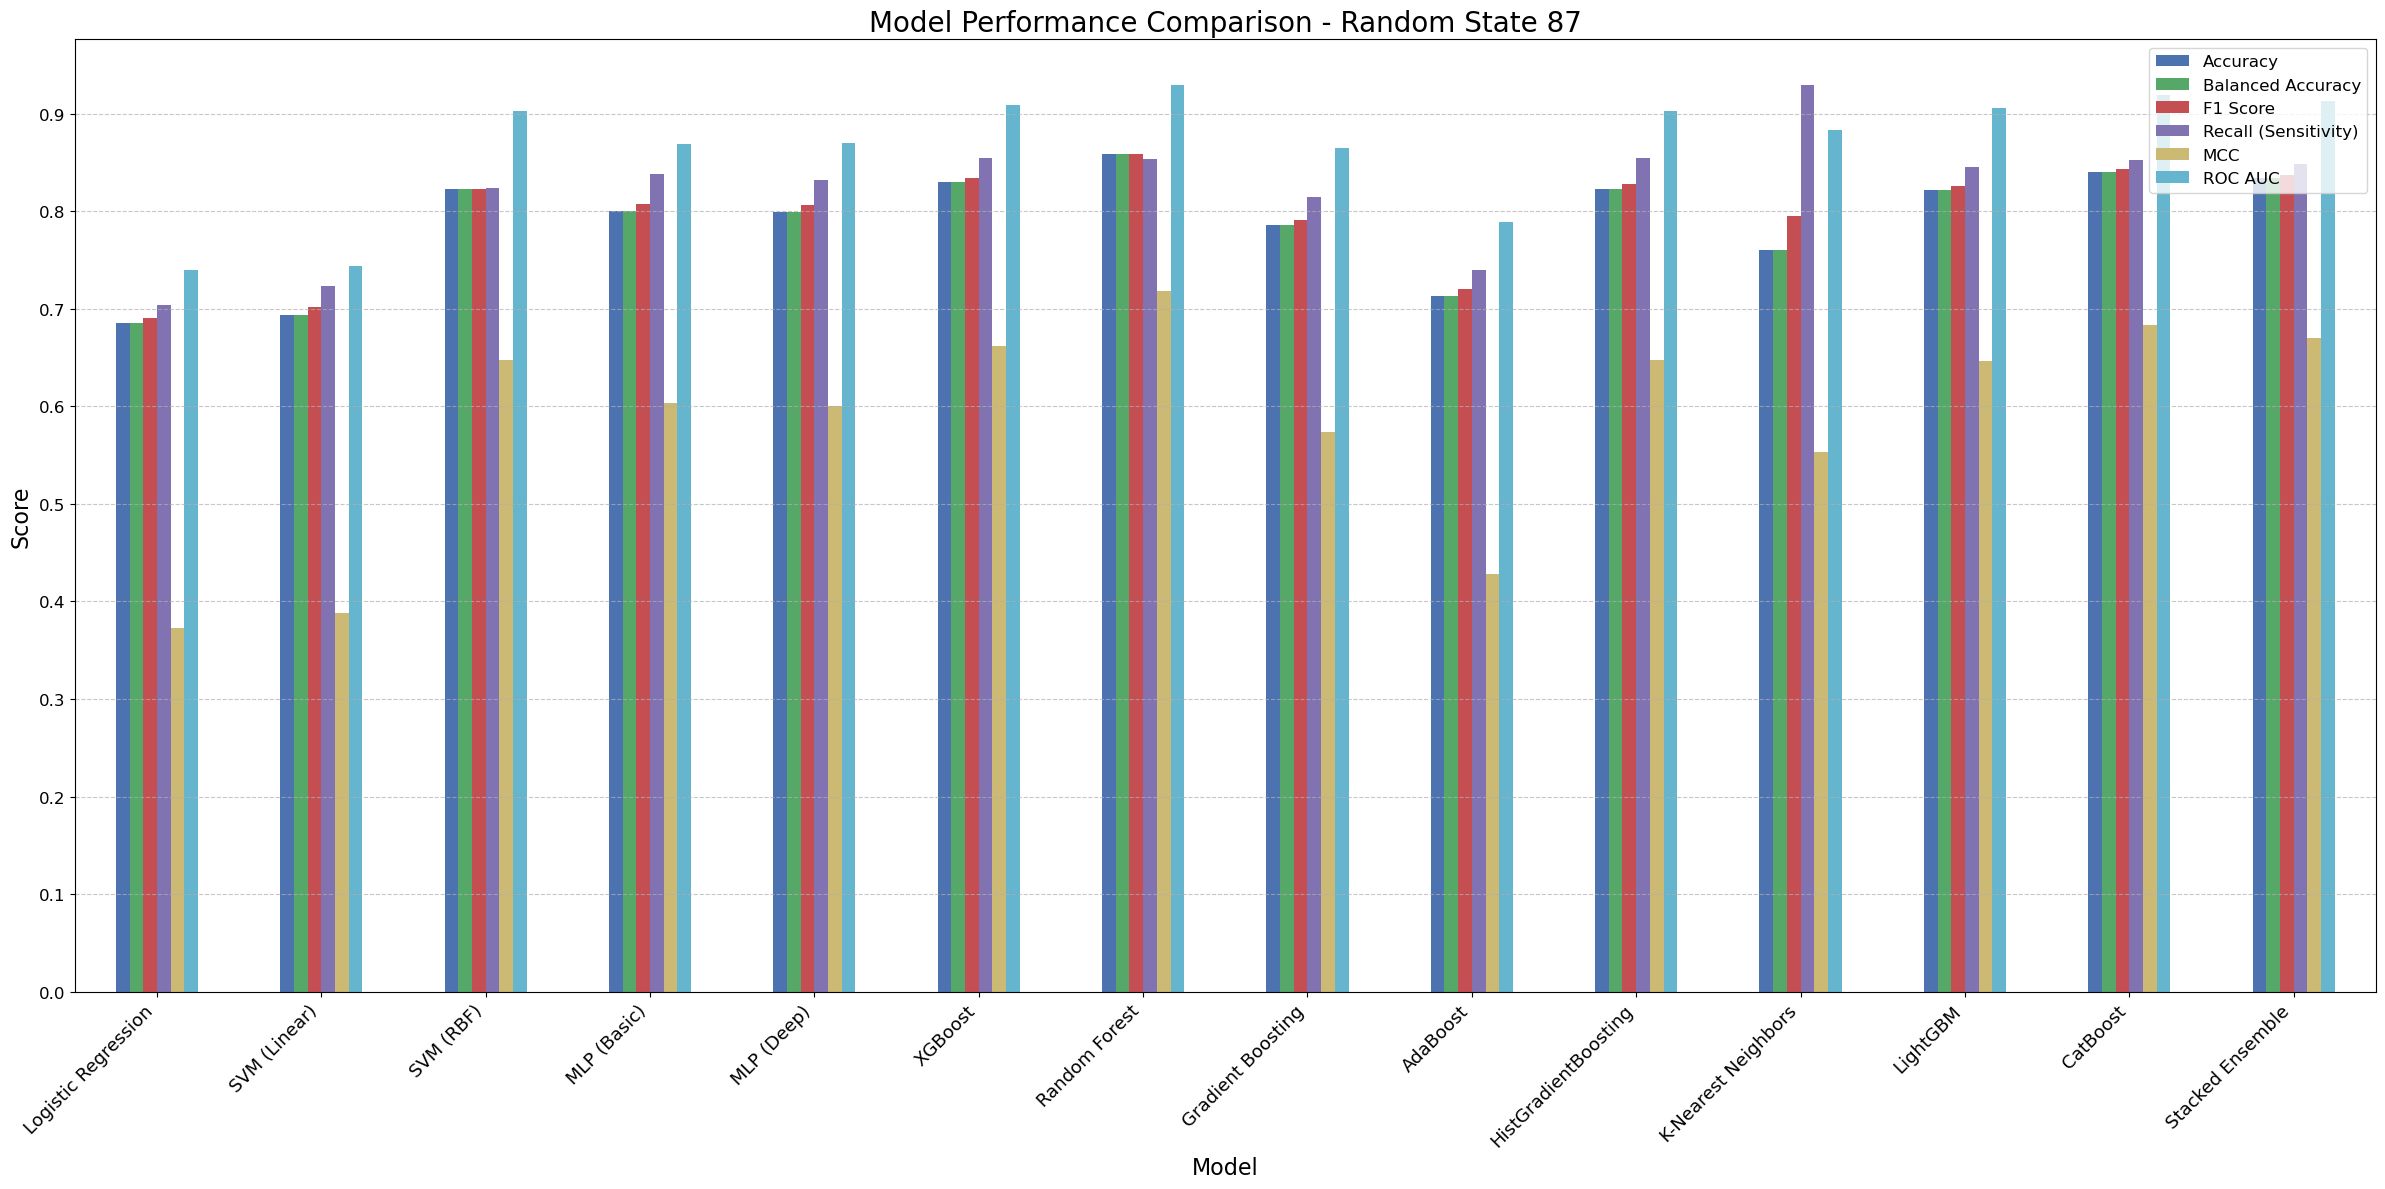

In [24]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek

# Generate sample data


def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]


        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [ 87]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )
    
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train_aug, y_train_aug)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(24, 12))
    df_results.plot(kind='bar', ax=ax, color=custom_colors[:len(df_results.columns)])

    ax.set_title(f"Model Performance Comparison - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # Y-axis ticks at 0.0, 0.1, ..., 1.0
    ax.yaxis.set_major_locator(mticker.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.tick_params(axis='y', labelsize=12)

    # Only major gridlines (0.1 step)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Generate synthetic dataset


# Evaluation function using CV with SMOTE + Scaling
def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('smt', SMOTETomek(random_state=42)),
            ('clf', model)
        ])

        pipeline.fit(X_tr, y_tr)
        y_val_pred = pipeline.predict(X_val)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

# Function to retrain on full train set and evaluate on test set
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smt', SMOTETomek(random_state=42)),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Plotting config
custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

# Run evaluations over multiple random seeds
random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    results_cv = {}
    results_test = {}

    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics_cv = evaluate_model_cv(model, X_train, y_train)
        metrics_test = evaluate_on_test(model, X_train, y_train, X_test, y_test)

        combined = {**metrics_cv, **metrics_test}
        results_cv[name] = combined

    df_results = pd.DataFrame(results_cv).T
    all_results[seed] = df_results

    print("\n📊 CV + Test Results:")
    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    df_results[[col for col in df_results.columns if "Test" not in col]].plot(kind='bar', ax=ax, color=custom_colors[:len(df_results.columns)])

    ax.set_title(f"Model CV Performance Comparison - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    custom_yticks = sorted(set(np.round(np.arange(0.0, 1.01, 0.1).tolist() + [0.75, 0.85])))
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.0, 1.0)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', which='major', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



📌 Evaluating for random state: 66


NameError: name 'X' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
# from ctgan import CTGAN
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, classification_report,
    roc_auc_score, matthews_corrcoef, recall_score, precision_recall_curve
)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.combine import SMOTETomek

# Sampling strategy using SMOTETomek after split
def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

# Threshold optimization function
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# Store metrics by seed
metrics_by_seed = {
    "RandomState": [],
    "Accuracy": [],
    "BalancedAccuracy": [],
    "F1Score": [],
    "Recall": [],
    "MCC": [],
    "ROC_AUC": []
}

# Evaluate model and collect metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, seed=None):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []
    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))
    mean_metrics = {
        "Accuracy": np.mean(accs),
        "BalancedAccuracy": np.mean(baccs),
        "F1Score": np.mean(f1s),
        "Recall": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC_AUC": np.mean(aucs)
    }

    if seed is not None:
        metrics_by_seed["RandomState"].append(seed)
        for k, v in mean_metrics.items():
            metrics_by_seed[k].append(v)

    print(f"CV Accuracy:            {mean_metrics['Accuracy']:.4f}")
    print(f"CV Balanced Accuracy:   {mean_metrics['BalancedAccuracy']:.4f}")
    print(f"CV F1 Score:            {mean_metrics['F1Score']:.4f}")
    print(f"CV Recall (Sens.):      {mean_metrics['Recall']:.4f}")
    print(f"CV MCC:                 {mean_metrics['MCC']:.4f}")
    print(f"CV ROC AUC Score:       {mean_metrics['ROC_AUC']:.4f}")

    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_test_proba)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score:            {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall (Sensitivity):{recall_score(y_test, y_test_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss')),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Run training pipeline for different random seeds
random_states = [66]
# , 20, 87, 141, 69, 87, 90
for seed in random_states:
    print(f"\n==================== Random State = {seed} ====================\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

    print("Train distribution before sampling:", Counter(y_train))

    # Apply SMOTETomek
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)
    print("Train distribution after SMOTETomek:", Counter(y_train_aug))

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)
    X_test_scaled = scaler.transform(X_test)

    for name, model in models.items():
        print(f"\n--- {name} ---")
        calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
        evaluate_model(calibrated_model, X_train_scaled, y_train_aug, X_test_scaled, y_test, seed=seed)

# Plotting metrics across random states
df_metrics = pd.DataFrame(metrics_by_seed).sort_values("RandomState")
print(df_metrics.round(4))
df_metrics["NormalizedRandomState"] = np.round(df_metrics["RandomState"] / max(df_metrics["RandomState"]), 2)

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
metrics = ["Accuracy", "BalancedAccuracy", "F1Score", "Recall", "MCC", "ROC_AUC"]

for metric, color in zip(metrics, colors):
    plt.plot(df_metrics["NormalizedRandomState"], df_metrics[metric], label=metric, color=color, marker='o')

plt.xticks(np.arange(0.0, 1.05, 0.05))
plt.xlabel("Normalized Random State")
plt.ylabel("Metric Score")
plt.title("CV Metrics Across Random States")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



==================== Random State = 66 ====================

Train distribution before sampling: Counter({0: 461, 1: 144})
Train distribution after SMOTETomek: Counter({0: 454, 1: 454})

--- Logistic Regression ---
CV Accuracy:            0.6454
CV Balanced Accuracy:   0.6453
CV F1 Score:            0.6502
CV Recall (Sens.):      0.6617
CV MCC:                 0.2922
CV ROC AUC Score:       0.6968

--- Final Test Performance ---
Accuracy:            0.5921
Balanced Accuracy:   0.6178
F1 Score:            0.4364
Recall (Sensitivity):0.6667
MCC:                 0.2004
ROC AUC Score:       0.5942
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       116
           1       0.32      0.67      0.44        36

    accuracy                           0.59       152
   macro avg       0.59      0.62      0.56       152
weighted avg       0.72      0.59      0.62       152


--- SVM (Linear) ---
CV Accuracy:            0.

In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek

# Generate sample data


def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )
    
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train_aug, y_train_aug)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(24, 12))
    df_results.plot(kind='bar', ax=ax, color=custom_colors[:len(df_results.columns)])

    ax.set_title(f"Model Performance Comparison - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # Y-axis ticks at 0.0, 0.1, ..., 1.0
    ax.yaxis.set_major_locator(mticker.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.tick_params(axis='y', labelsize=12)

    # Only major gridlines (0.1 step)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



📌 Evaluating for random state: 66
→ Evaluating Logistic Regression


KeyError: "None of [Index([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,\n       ...\n       895, 896, 897, 898, 901, 902, 903, 905, 906, 907],\n      dtype='int64', length=726)] are in the [columns]"

In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=20,
    n_classes=2, weights=[0.7, 0.3], random_state=42
)

# Evaluation function using SMOTE + Scaling in CV loop
def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('smt', SMOTETomek(random_state=42)),
            ('clf', model)
        ])

        pipeline.fit(X_tr, y_tr)
        y_val_pred = pipeline.predict(X_val)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Plot colors
custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

# Run evaluation over multiple random seeds
random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train, y_train)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(24, 12))
    df_results.plot(kind='bar', ax=ax, color=custom_colors[:len(df_results.columns)])

    ax.set_title(f"Model Performance Comparison - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # Add ticks from 0.0 to 1.0 + 0.75 and 0.85
    custom_yticks = sorted(set(np.round(np.arange(0.0, 1.01, 0.1).tolist() + [0.75, 0.85])))
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.0, 1.0)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', which='major', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



📌 Evaluating for random state: 66
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost


KeyboardInterrupt: 


📌 Evaluating for random state: 66
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8132             0.8132    0.8145   
SVM (Linear)            0.8172             0.8172    0.8191   
SVM (RBF)               0.9560             0.9560    0.9556   
MLP (Basic)             0.9569             0.9569    0.9573   
MLP (Deep)              0.9479             0.9480    0.9484   
XGBoost                 0.9400             0.9400    0.9403   
Random Forest           0.9315             0.9315    0.9307   
Gradient Boosting       0.9057             0.9057    0.9067   
AdaBoost                0

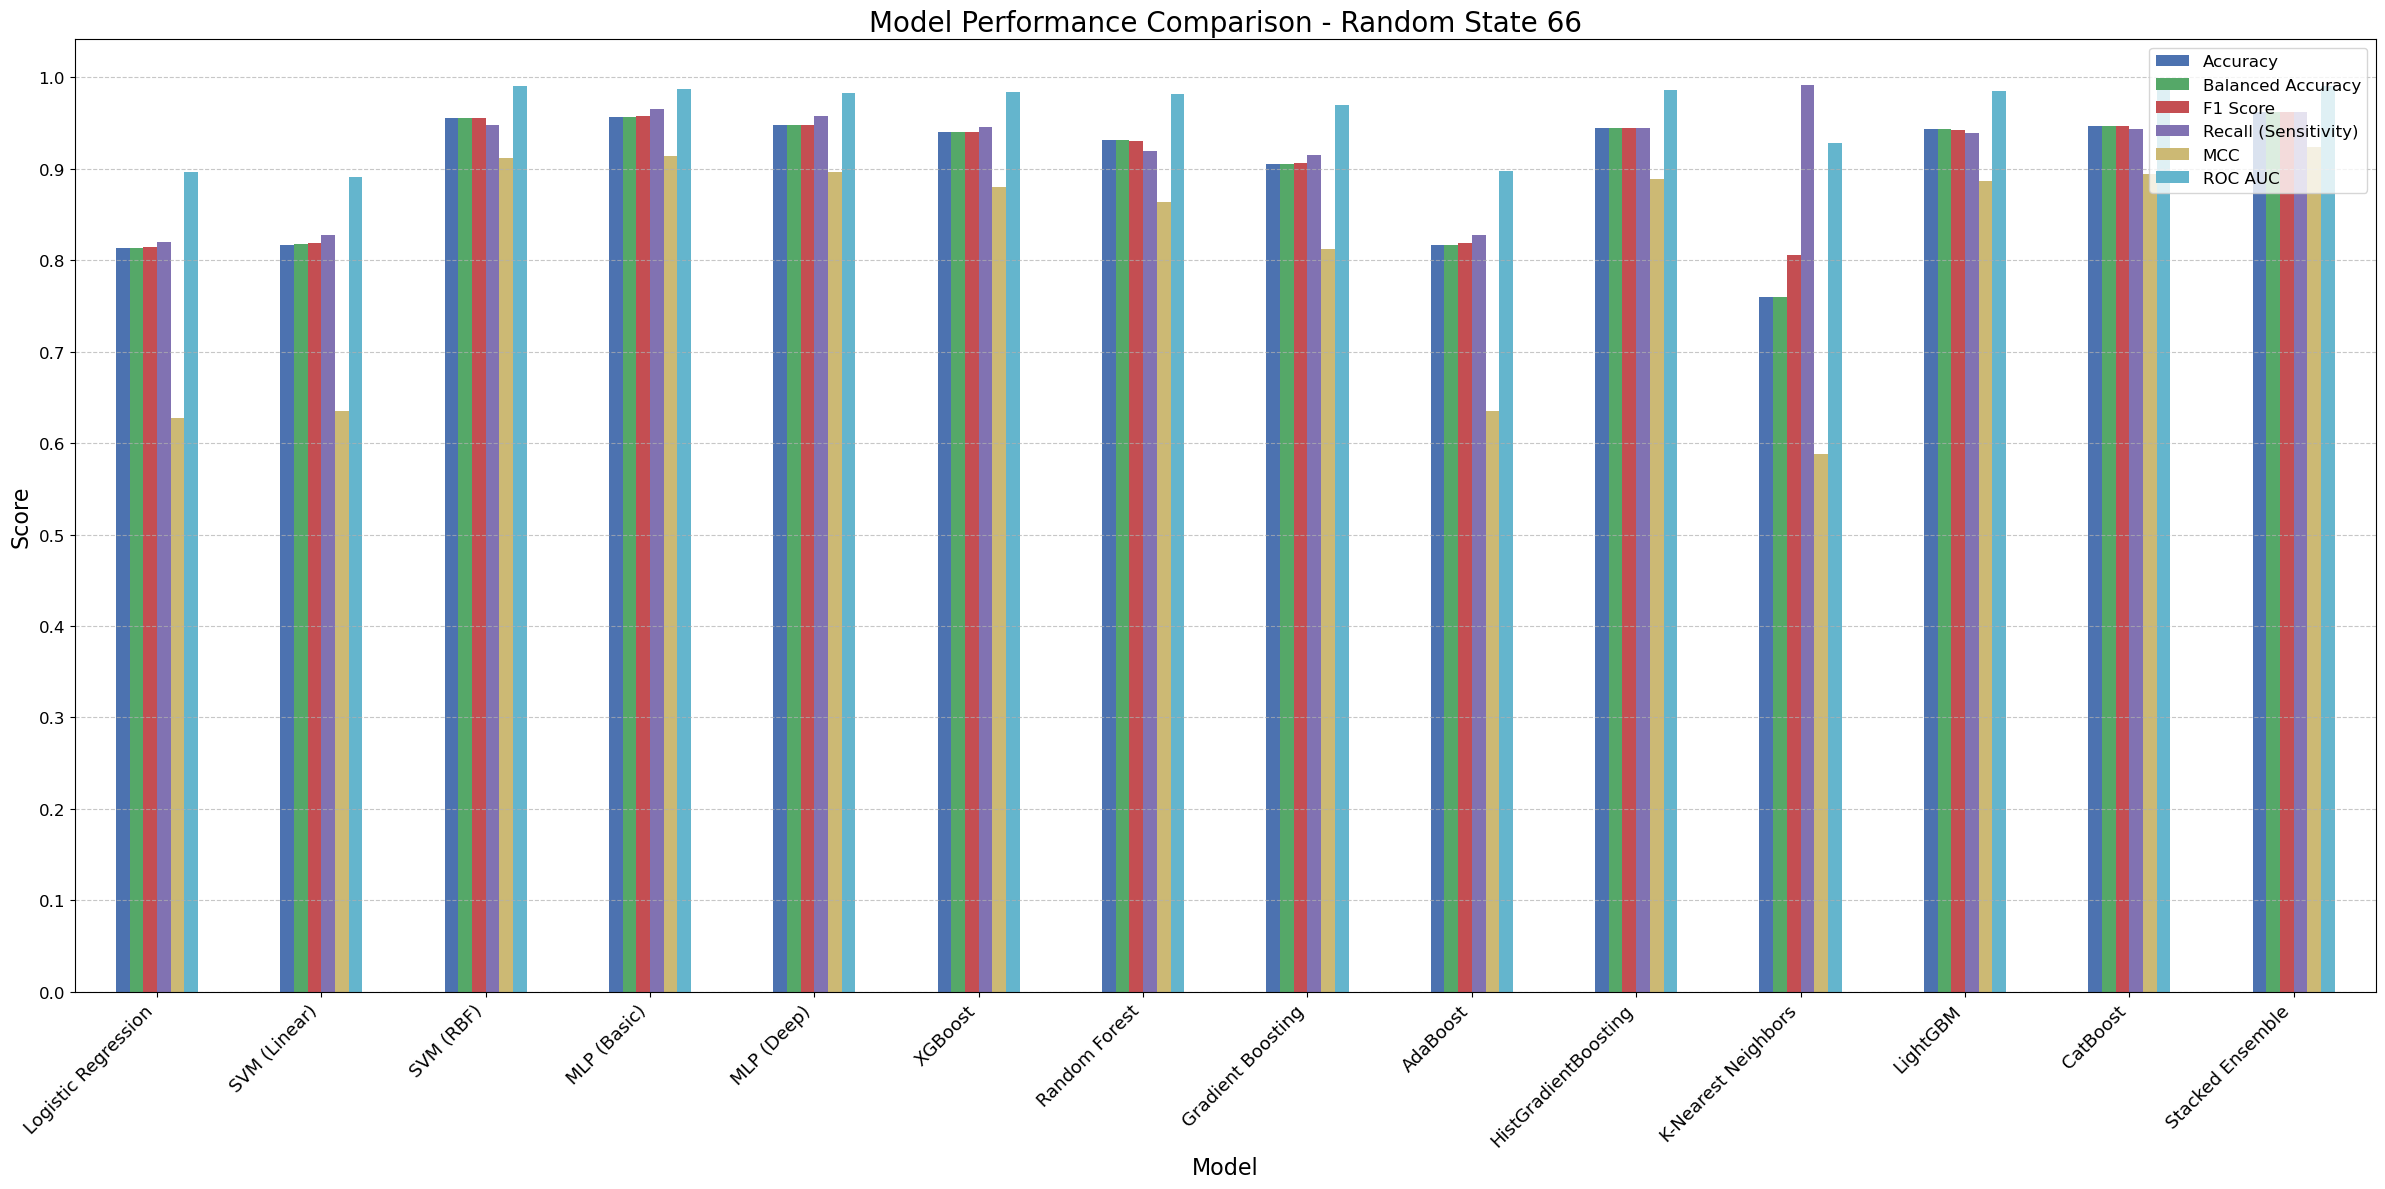


📌 Evaluating for random state: 20
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8021             0.8020    0.8013   
SVM (Linear)            0.7981             0.7981    0.7975   
SVM (RBF)               0.9662             0.9662    0.9662   
MLP (Basic)             0.9595             0.9595    0.9602   
MLP (Deep)              0.9497             0.9497    0.9508   
XGBoost                 0.9462             0.9462    0.9466   
Random Forest           0.9342             0.9342    0.9332   
Gradient Boosting       0.9186             0.9186    0.9194   
AdaBoost                0

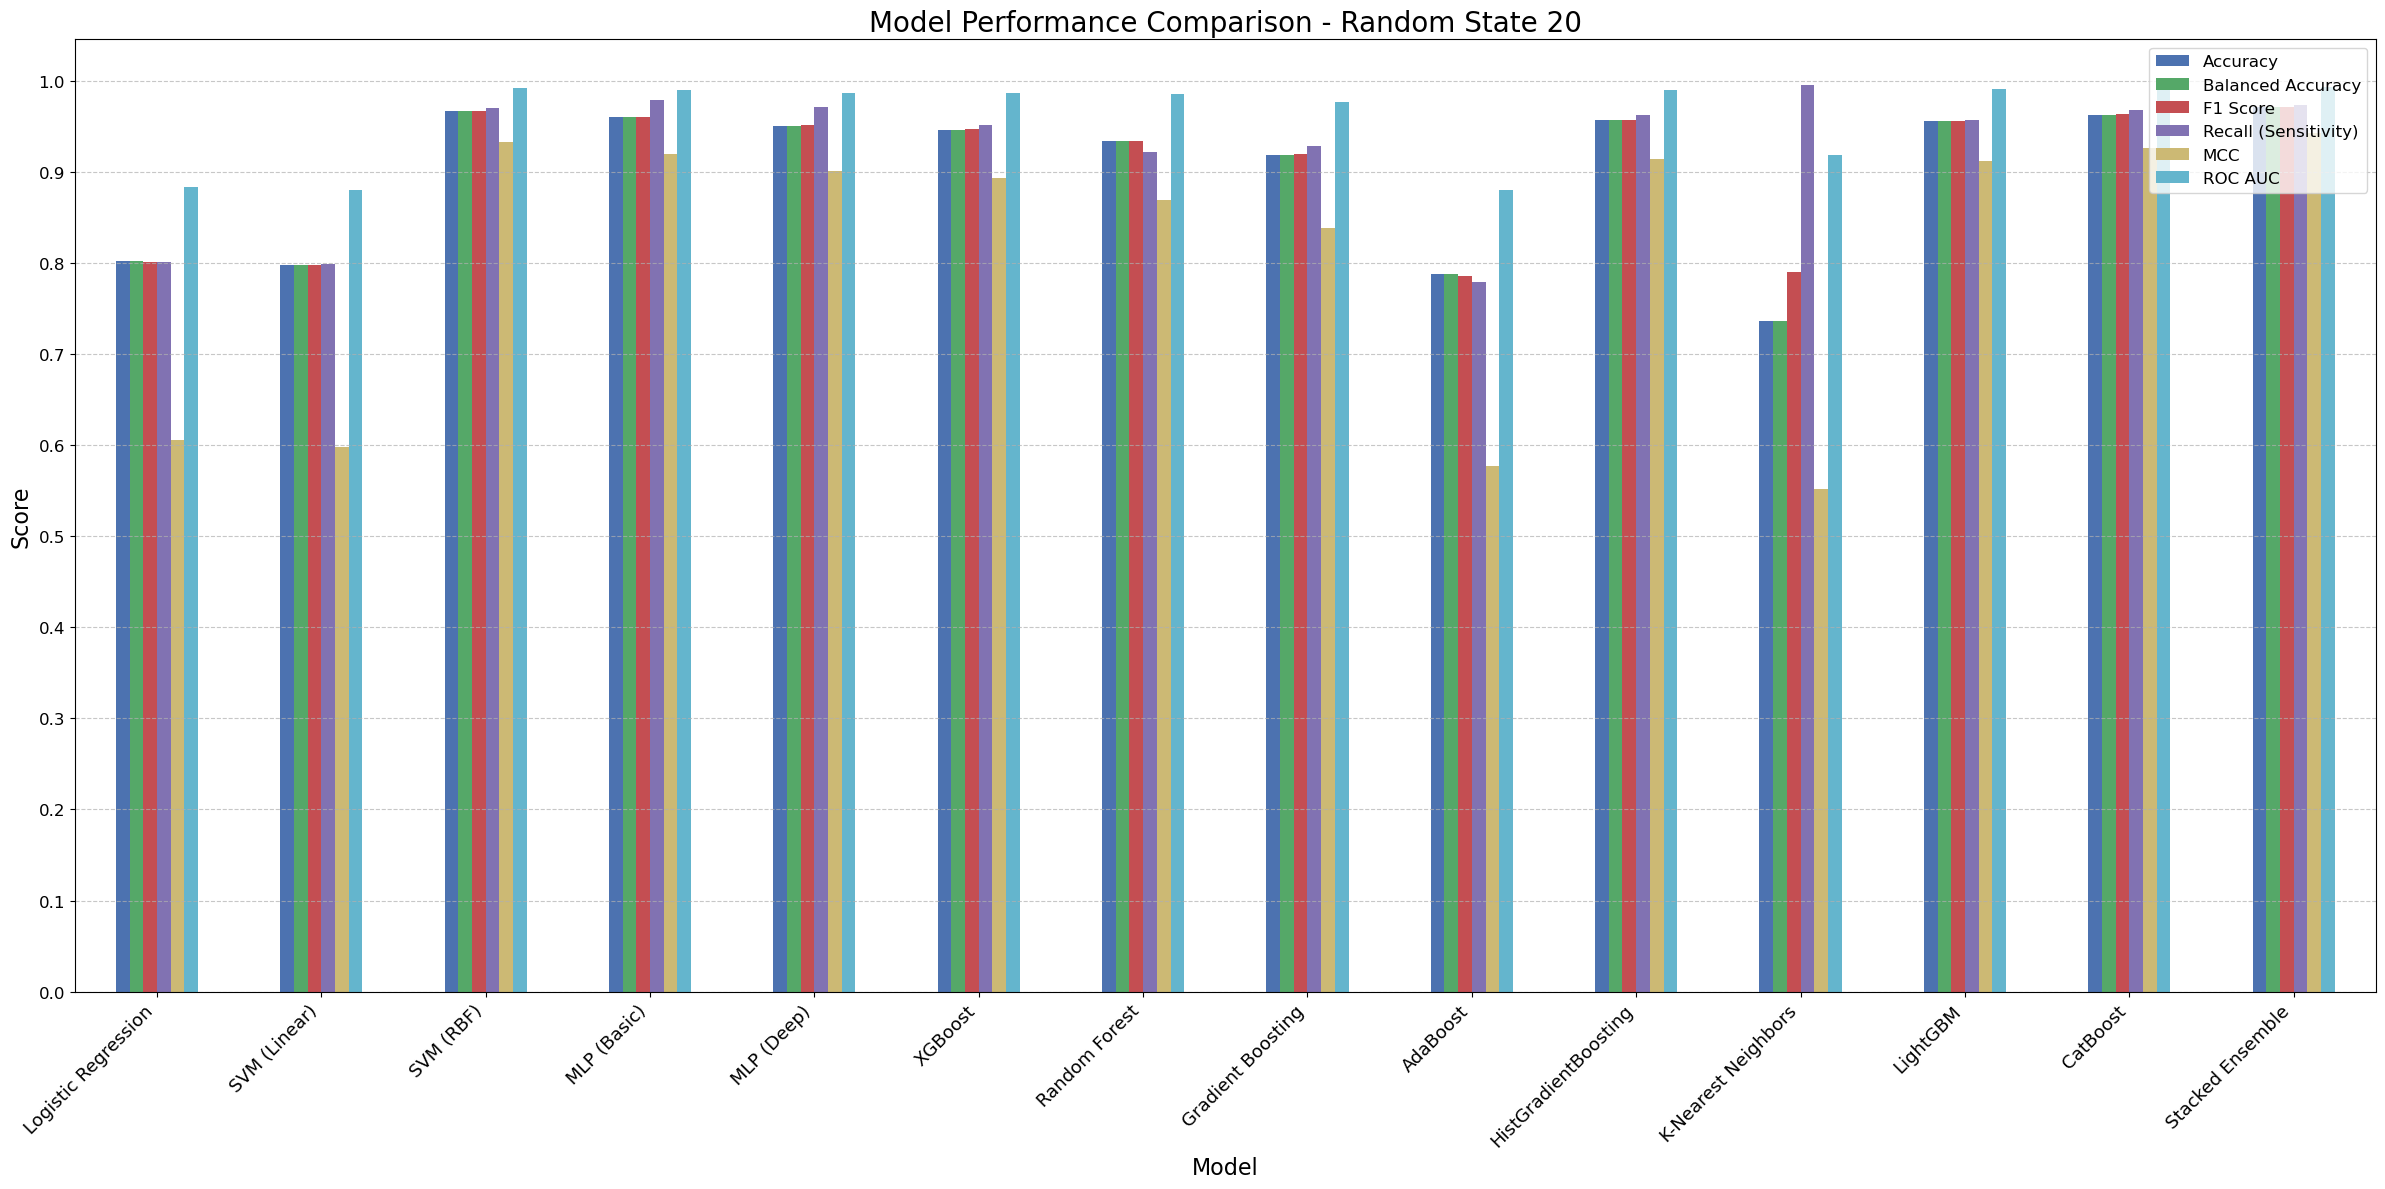


📌 Evaluating for random state: 87
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost


KeyboardInterrupt: 

In [17]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek

# Generate sample data


def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )
    
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train_aug, y_train_aug)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(24, 12))
    df_results.plot(kind='bar', ax=ax, color=custom_colors[:len(df_results.columns)])

    ax.set_title(f"Model Performance Comparison - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # Y-axis ticks at 0.0, 0.1, ..., 1.0
    ax.yaxis.set_major_locator(mticker.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.tick_params(axis='y', labelsize=12)

    # Only major gridlines (0.1 step)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


<Figure size 1600x800 with 0 Axes>

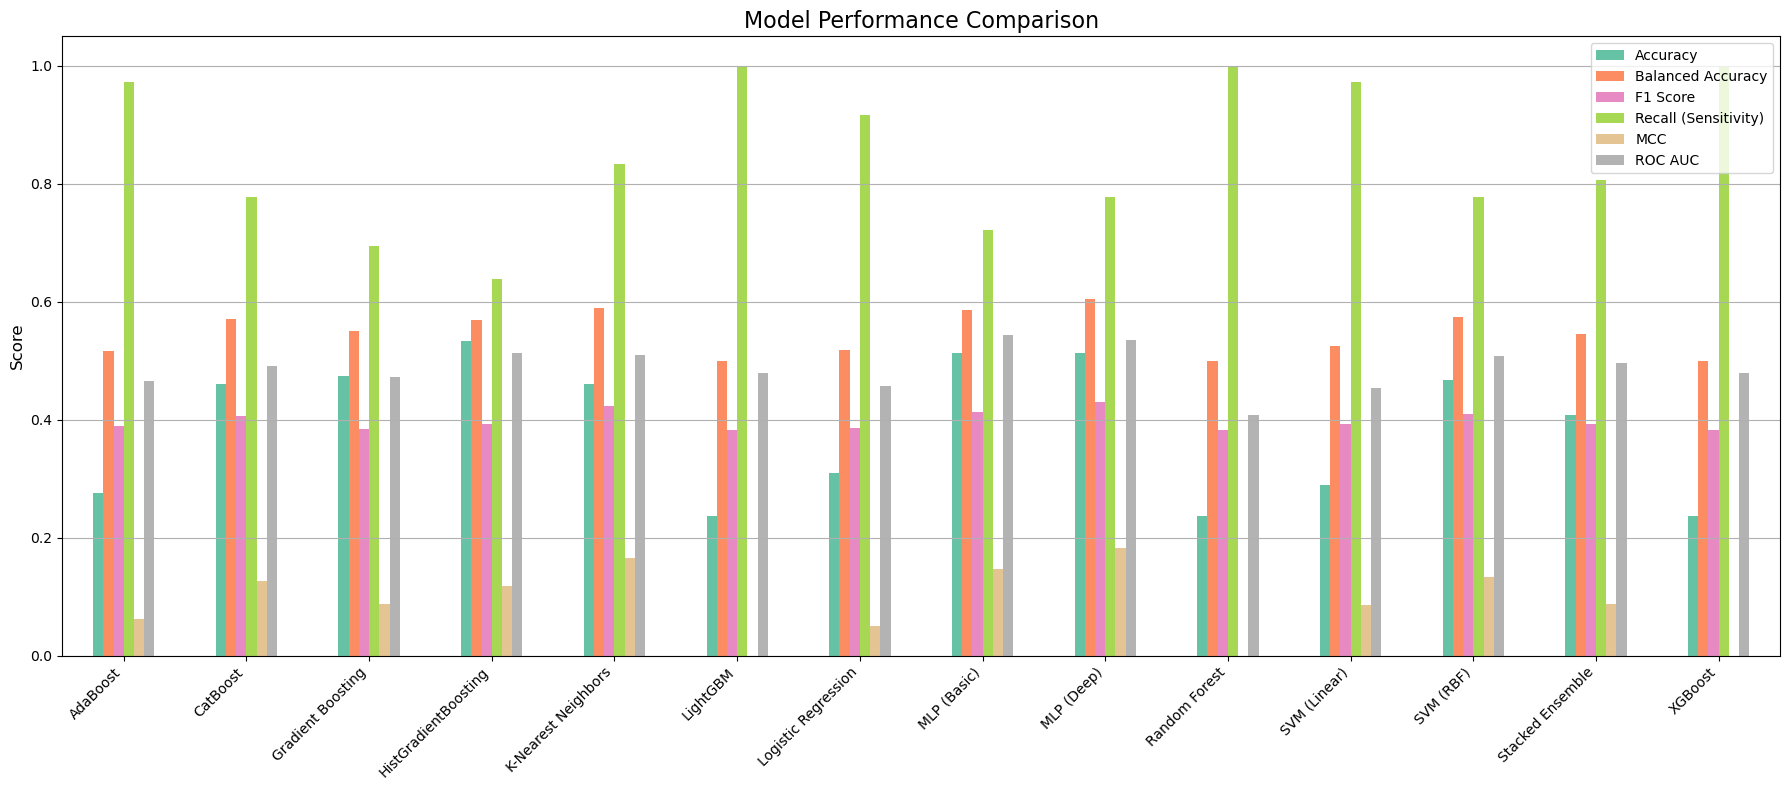

In [15]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score, precision_recall_curve,
    classification_report
)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.combine import SMOTETomek

# --- Functions ---
def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_test_proba)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "Recall (Sensitivity)": recall_score(y_test, y_test_pred),
        "MCC": matthews_corrcoef(y_test, y_test_pred),
        "ROC AUC": roc_auc_score(y_test, y_test_proba)
    }

# --- Define models ---
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss')),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# --- Main Run ---
random_states = [66, 20, 87, 141, 69, 87, 90]  # Use one seed to simplify plot

# Make sure X and y are defined
# Example:
# X = df.drop("target", axis=1).values
# y = df["target"].values

results = {}

for seed in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)
    X_test_scaled = scaler.transform(X_test)

   

    for name, model in models.items():
        calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
        metrics = evaluate_model(calibrated_model, X_train_scaled, y_train_aug, X_test_scaled, y_test)
        results[name] = metrics

# --- Plotting ---
df_results = pd.DataFrame(results).T  # Transpose to make models rows
df_results = df_results.sort_index()

plt.figure(figsize=(16, 8))
df_results.plot(kind='bar', figsize=(18, 8), colormap='Set2')
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="upper right", fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
for seed, df in all_results.items():
    plt.figure(figsize=(16, 8))
    df.plot(kind='bar', figsize=(18, 8), colormap='tab10')
    plt.title(f"Model Performance Comparison - Random State {seed}", fontsize=16)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

NameError: name 'all_results' is not defined


📌 Evaluating for random state: 66
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8779             0.8779    0.8793   
SVM (Linear)            0.8775             0.8775    0.8782   
SVM (RBF)               0.9135             0.9135    0.9123   
MLP (Basic)             0.9234             0.9234    0.9228   
MLP (Deep)              0.9225             0.9225    0.9226   
XGBoost                 0.9279             0.9279    0.9268   
Random Forest           0.9104             0.9104    0.9113   
Gradient Boosting       0.9113             0.9113    0.9116   
AdaBoost                0.8968             0.8968    0.8956   
HistGradientBoosting    0.9432             0.9432    0.9424   
K-Nearest Neighbors     0.8221             0.8221    0.8245   
LightGBM                0.9378             0.9378    0.9371   
CatBoost                0.9144             0.9144    0.9151   
Stacked Ensemble        0.9311             0.9311    0.9306   

                   

<Figure size 1600x800 with 0 Axes>

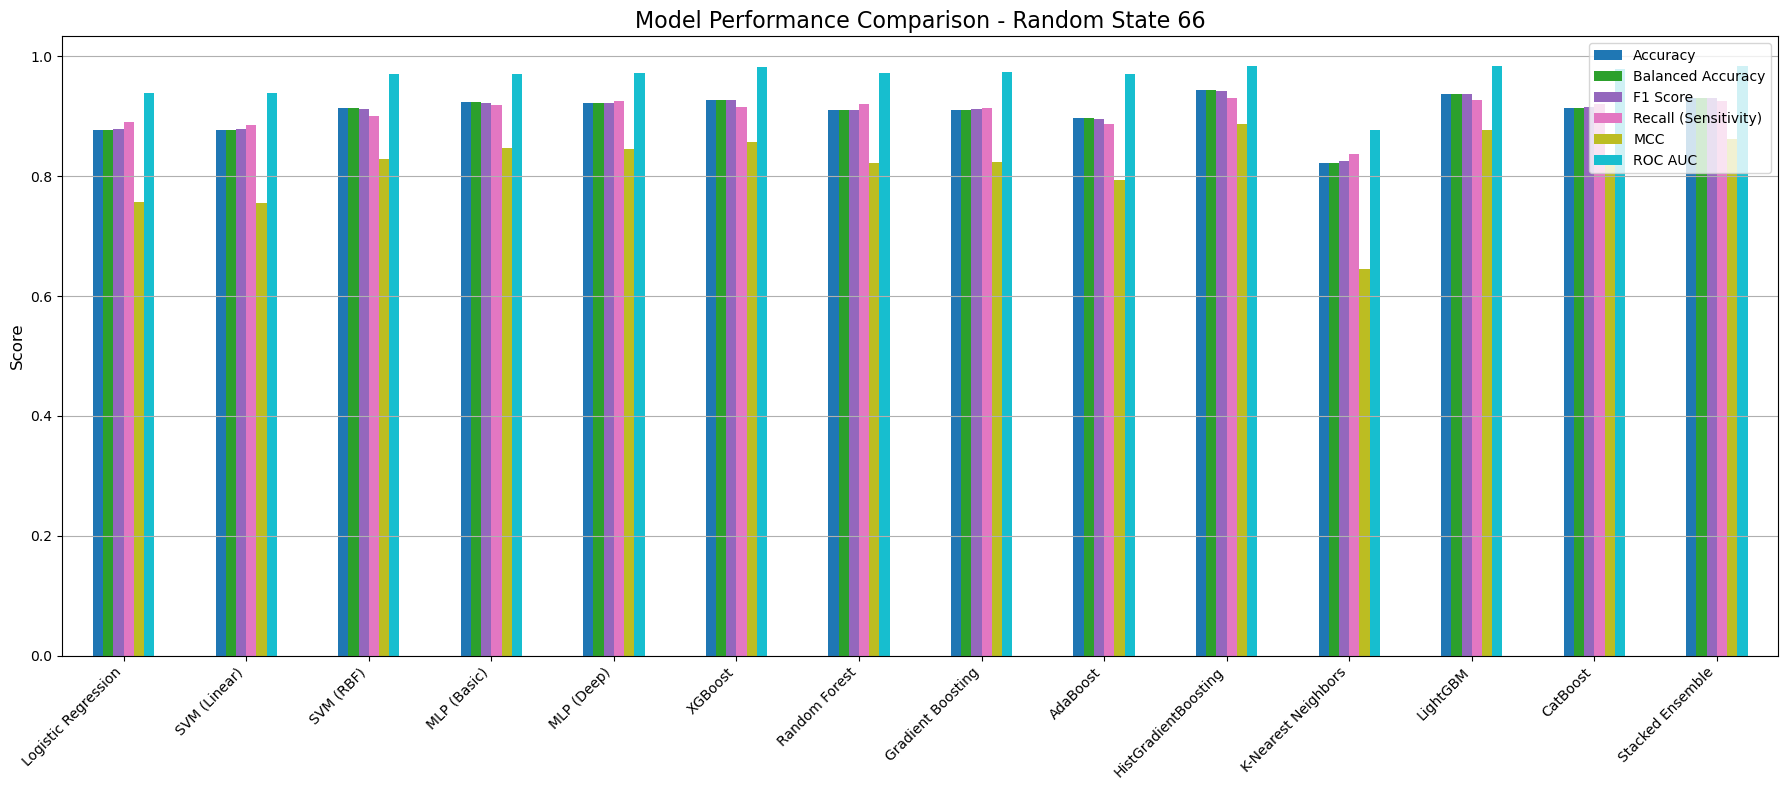


📌 Evaluating for random state: 20
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8883             0.8883    0.8905   
SVM (Linear)            0.8874             0.8874    0.8885   
SVM (RBF)               0.9167             0.9167    0.9155   
MLP (Basic)             0.9257             0.9257    0.9245   
MLP (Deep)              0.9261             0.9261    0.9254   
XGBoost                 0.9446             0.9446    0.9441   
Random Forest           0.9203             0.9203    0.9201   
Gradient Boosting       0.9239             0.9239    0.9239   
AdaBoost                0.9108             0.9108    0.9097   
HistGradientBoosting    0.9482             0.9482    0.9473   
K-Nearest Neighbors     0.8113             0.8113    0.8107   
LightGBM                0.9446             0.9446    0.9438   
CatBoost                0.9302             0.9302    0.9299   
Stacked Ensemble        0.9423             0.9423    0.9420   

                   

<Figure size 1600x800 with 0 Axes>

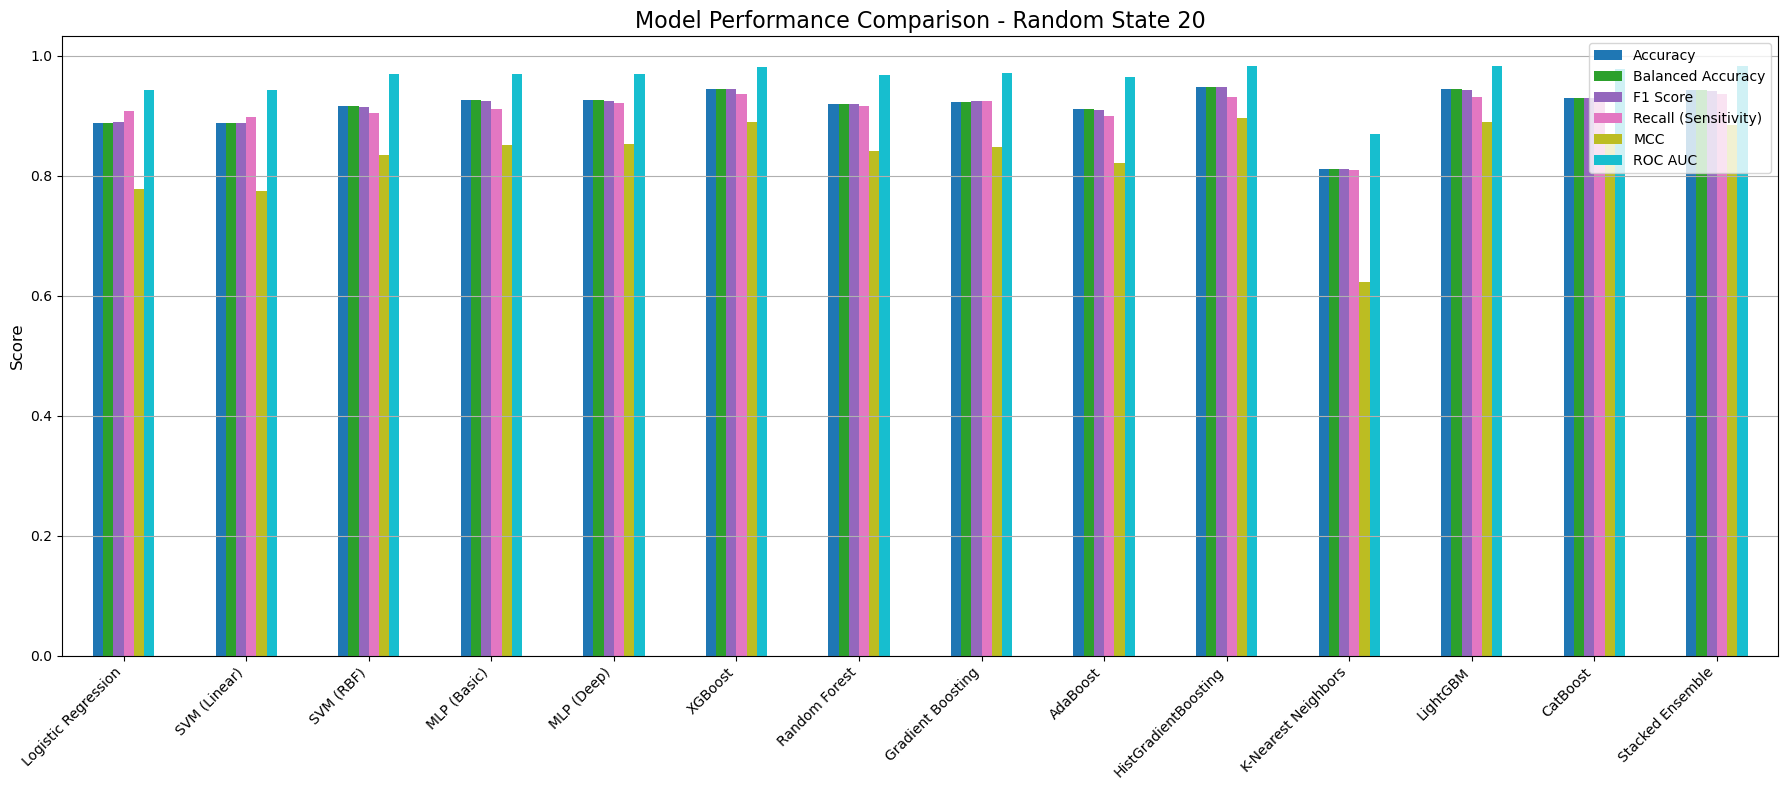


📌 Evaluating for random state: 87
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8698             0.8698    0.8716   
SVM (Linear)            0.8680             0.8680    0.8675   
SVM (RBF)               0.9152             0.9152    0.9142   
MLP (Basic)             0.9134             0.9134    0.9125   
MLP (Deep)              0.9120             0.9120    0.9112   
XGBoost                 0.9286             0.9286    0.9282   
Random Forest           0.9147             0.9147    0.9146   
Gradient Boosting       0.9102             0.9103    0.9090   
AdaBoost                0.8963             0.8963    0.8941   
HistGradientBoosting    0.9381             0.9380    0.9369   
K-Nearest Neighbors     0.8240             0.8241    0.8191   
LightGBM                0.9340             0.9340    0.9329   
CatBoost                0.9223             0.9224    0.9219   
Stacked Ensemble        0.9291             0.9291    0.9290   

                   

<Figure size 1600x800 with 0 Axes>

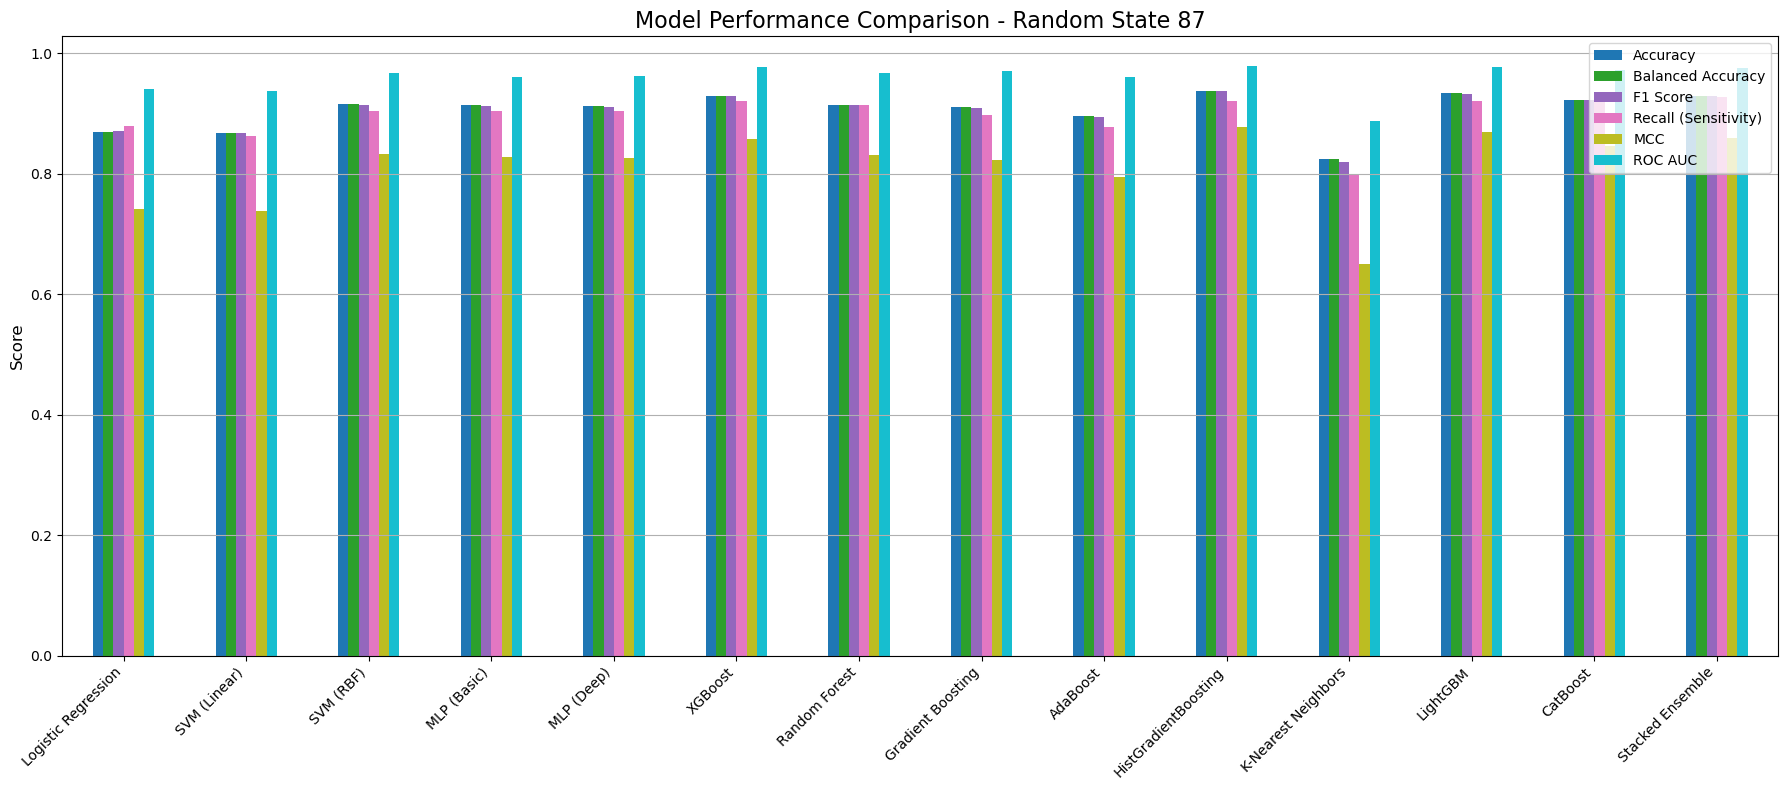


📌 Evaluating for random state: 141
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8764             0.8764    0.8774   
SVM (Linear)            0.8777             0.8777    0.8772   
SVM (RBF)               0.9150             0.9151    0.9130   
MLP (Basic)             0.9168             0.9168    0.9155   
MLP (Deep)              0.9177             0.9177    0.9168   
XGBoost                 0.9236             0.9236    0.9229   
Random Forest           0.9096             0.9097    0.9100   
Gradient Boosting       0.9119             0.9119    0.9120   
AdaBoost                0.9025             0.9025    0.9020   
HistGradientBoosting    0.9312             0.9312    0.9300   
K-Nearest Neighbors     0.8049             0.8049    0.8065   
LightGBM                0.9339             0.9339    0.9335   
CatBoost                0.9141             0.9141    0.9144   
Stacked Ensemble        0.9267             0.9267    0.9266   

                  

<Figure size 1600x800 with 0 Axes>

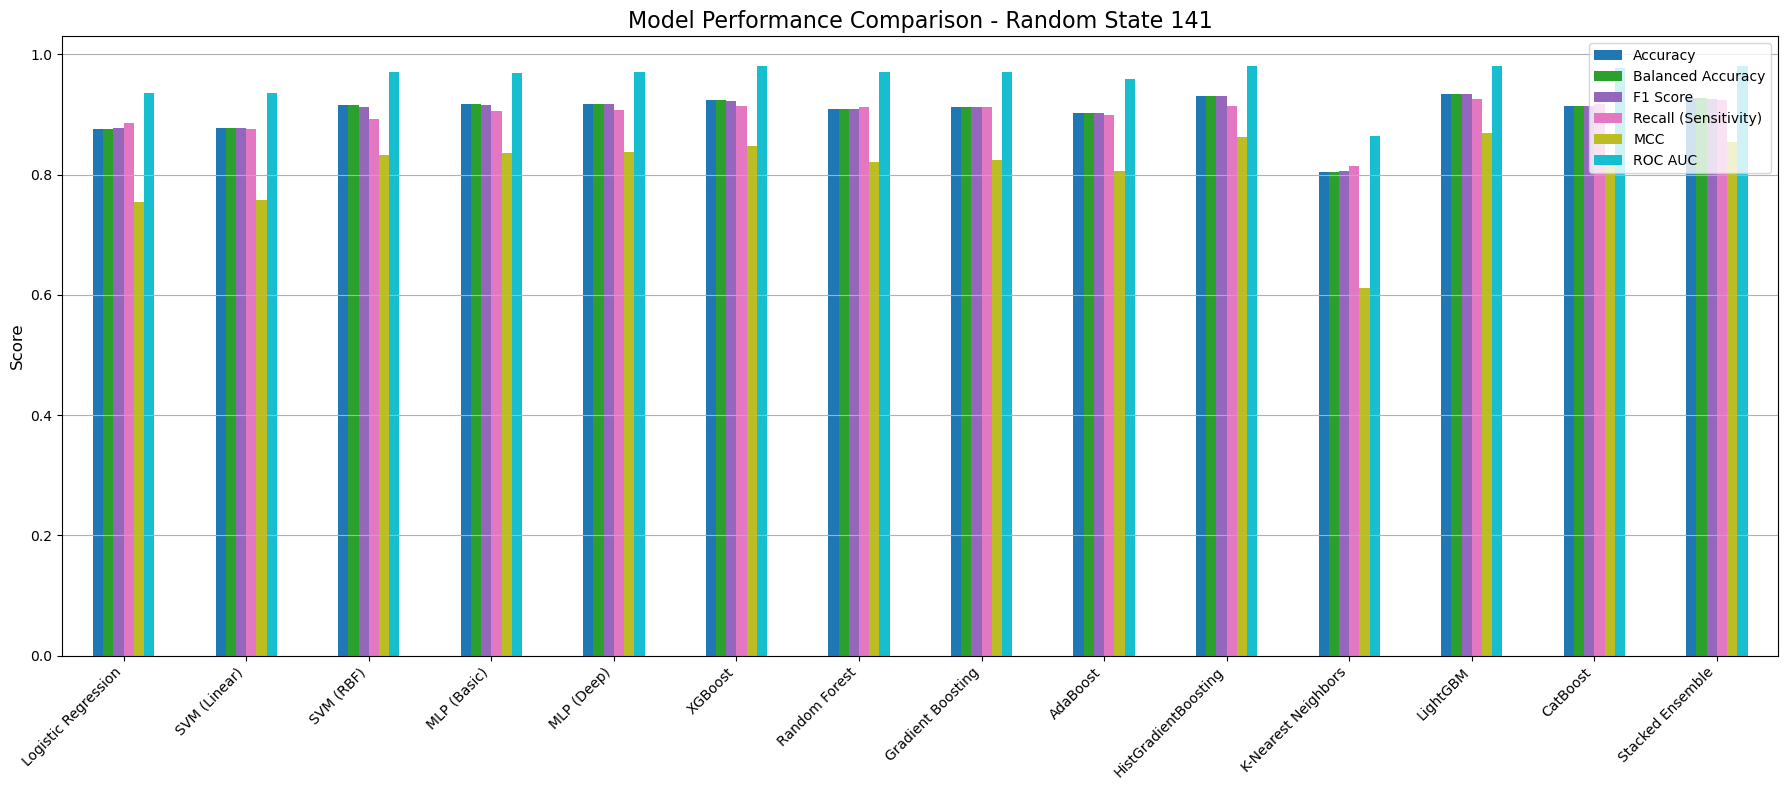


📌 Evaluating for random state: 69
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8730             0.8730    0.8750   
SVM (Linear)            0.8748             0.8749    0.8759   
SVM (RBF)               0.9147             0.9148    0.9135   
MLP (Basic)             0.9188             0.9188    0.9184   
MLP (Deep)              0.9201             0.9201    0.9198   
XGBoost                 0.9291             0.9292    0.9280   
Random Forest           0.9080             0.9080    0.9079   
Gradient Boosting       0.9147             0.9148    0.9133   
AdaBoost                0.9049             0.9049    0.9035   
HistGradientBoosting    0.9367             0.9368    0.9358   
K-Nearest Neighbors     0.7999             0.7998    0.8062   
LightGBM                0.9363             0.9363    0.9353   
CatBoost                0.9206             0.9206    0.9193   
Stacked Ensemble        0.9345             0.9345    0.9338   

                   

<Figure size 1600x800 with 0 Axes>

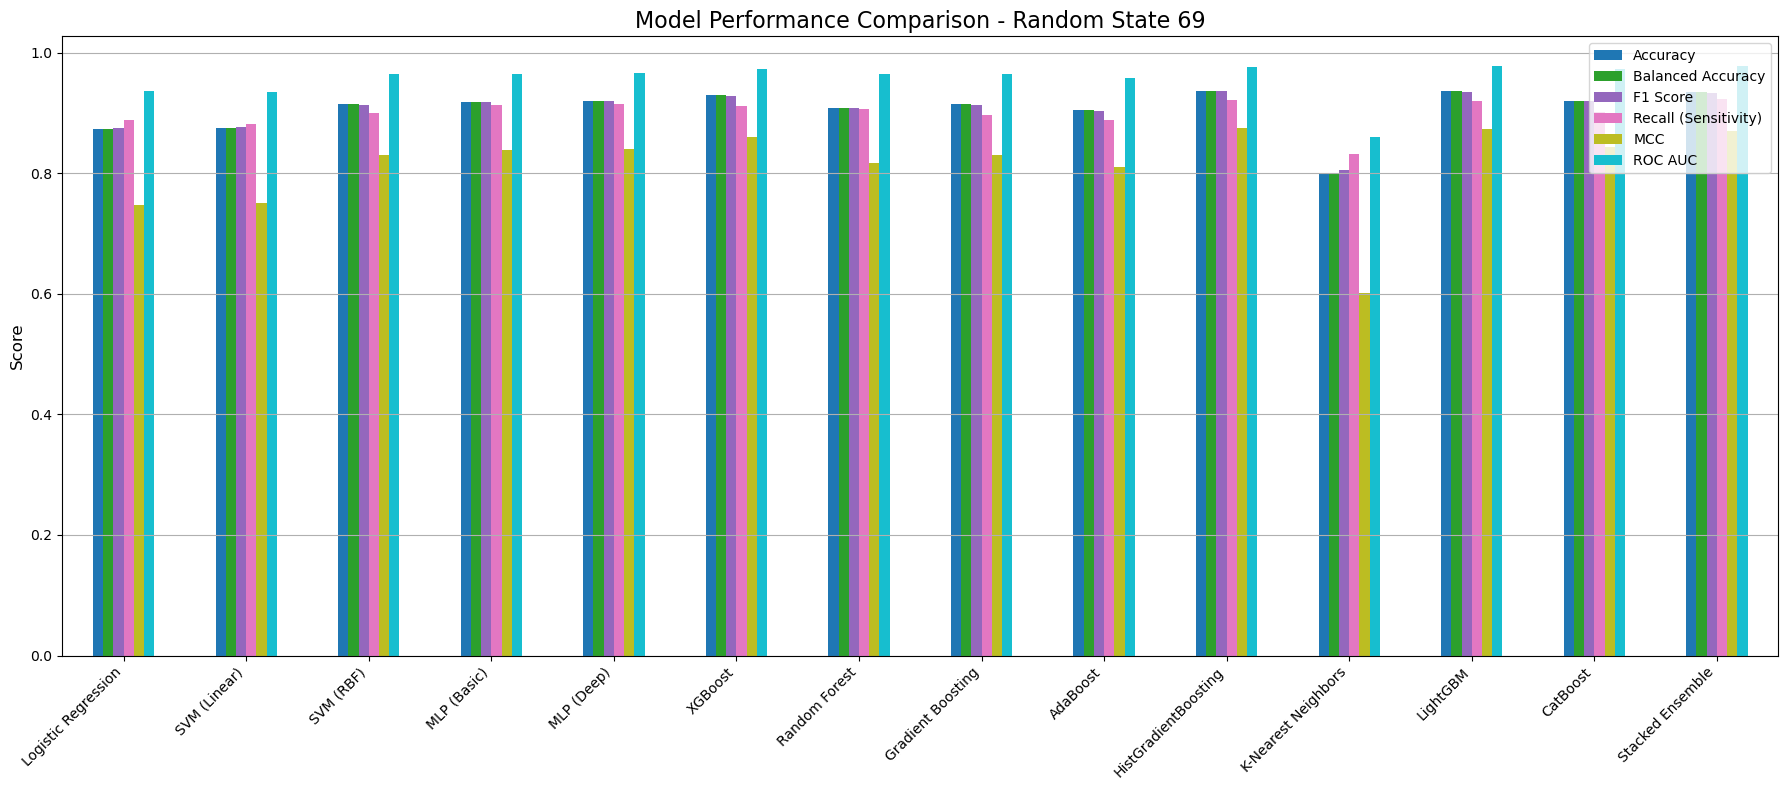


📌 Evaluating for random state: 90
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8844             0.8844    0.8868   
SVM (Linear)            0.8813             0.8813    0.8830   
SVM (RBF)               0.9253             0.9253    0.9239   
MLP (Basic)             0.9195             0.9195    0.9184   
MLP (Deep)              0.9244             0.9245    0.9242   
XGBoost                 0.9339             0.9339    0.9329   
Random Forest           0.9159             0.9159    0.9158   
Gradient Boosting       0.9173             0.9173    0.9168   
AdaBoost                0.9110             0.9110    0.9097   
HistGradientBoosting    0.9397             0.9398    0.9387   
K-Nearest Neighbors     0.7927             0.7927    0.7931   
LightGBM                0.9371             0.9371    0.9361   
CatBoost                0.9177             0.9177    0.9176   
Stacked Ensemble        0.9348             0.9348    0.9341   

                   

<Figure size 1600x800 with 0 Axes>

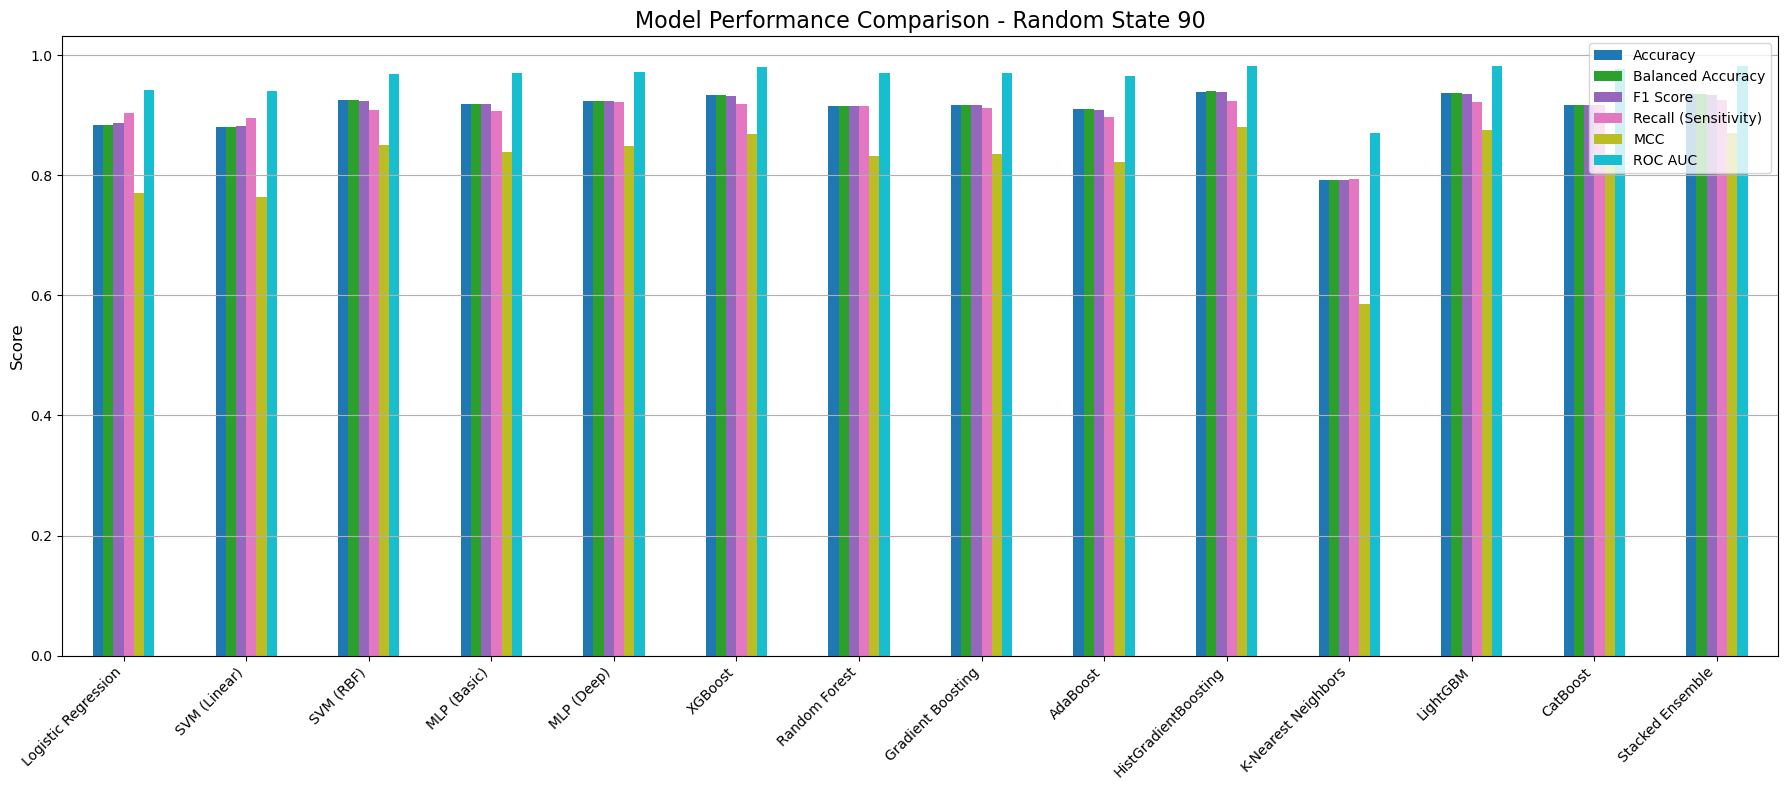

In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score, precision_recall_curve
)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.combine import SMOTETomek


# Helper functions
def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

# Models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Main loop over seeds
random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)

    results = {}
    for name, model in models.items():
        calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
        metrics = evaluate_model_cv(calibrated_model, X_train_scaled, y_train_aug)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    # Display metrics as table
    print(df_results.round(4))

    # Plotting
    plt.figure(figsize=(16, 8))
    df_results.plot(kind='bar', figsize=(18, 8), colormap='tab10')
    plt.title(f"Model Performance Comparison - Random State {seed}", fontsize=16)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [16]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import Counter
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import (
#     RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
#     HistGradientBoostingClassifier, StackingClassifier
# )
# from xgboost import XGBClassifier
# # from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import (
#     accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score,
#     matthews_corrcoef, precision_recall_curve
# )
# from sklearn.calibration import CalibratedClassifierCV
# from imblearn.combine import SMOTETomek

# # === Define models ===
# models = {
#     "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
#     "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
#     "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
#     "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000),
#     "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
#     "XGBoost": XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss'),
#     "Random Forest": RandomForestClassifier(class_weight='balanced'),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "HistGradientBoosting": HistGradientBoostingClassifier(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     # "LightGBM": LGBMClassifier(class_weight='balanced'),
#     "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
#     "Stacked Ensemble": StackingClassifier(
#         estimators=[
#             ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
#             ('mlp', MLPClassifier(max_iter=1000))
#         ],
#         final_estimator=LogisticRegression()
#     )
# }

# # === SMOTE helper ===
# def apply_smote(X_train, y_train):
#     smt = SMOTETomek(random_state=42)
#     return smt.fit_resample(X_train, y_train)

# # === Threshold Optimization ===
# def find_best_threshold(y_true, y_scores):
#     precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
#     f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
#     return thresholds[np.argmax(f1_scores)]

# # === Replace with your dataset ===
# # X = ...
# # y = ...

# # === Results dictionary ===
# model_scores = {
#     name: {"Accuracy": [], "Balanced Accuracy": [], "F1 Score": [], "AUC": [], "MCC": []}
#     for name in models
# }

# random_states = [66, 20, 87, 141, 69, 87, 90]

# for seed in random_states:
#     print(f"\n=== Random State: {seed} ===")
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

#     # Apply SMOTETomek
#     X_train_aug, y_train_aug = apply_smote(X_train, y_train)

#     # Standardize
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train_aug)
#     X_test_scaled = scaler.transform(X_test)

#     for name, model in models.items():
#         calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
#         calibrated_model.fit(X_train_scaled, y_train_aug)

#         y_pred = calibrated_model.predict(X_test_scaled)
#         y_proba = calibrated_model.predict_proba(X_test_scaled)[:, 1]

#         acc = accuracy_score(y_test, y_pred)
#         bacc = balanced_accuracy_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)
#         auc = roc_auc_score(y_test, y_proba)
#         mcc = matthews_corrcoef(y_test, y_pred)

#         model_scores[name]["Accuracy"].append(acc)
#         model_scores[name]["Balanced Accuracy"].append(bacc)
#         model_scores[name]["F1 Score"].append(f1)
#         model_scores[name]["AUC"].append(auc)
#         model_scores[name]["MCC"].append(mcc)

# # === Compute averages ===
# summary = {
#     "Model": [],
#     "Accuracy": [],
#     "Balanced Accuracy": [],
#     "F1 Score": [],
#     "AUC": [],
#     "MCC": []
# }

# for name, scores in model_scores.items():
#     summary["Model"].append(name)
#     for metric in ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC", "MCC"]:
#         summary[metric].append(np.mean(scores[metric]))

# df_results = pd.DataFrame(summary)

# # === Plot ===
# metrics = ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC", "MCC"]
# x = np.arange(len(df_results["Model"]))
# bar_width = 0.15

# plt.figure(figsize=(16, 7))
# for i, metric in enumerate(metrics):
#     plt.bar(x + i * bar_width, df_results[metric], width=bar_width, label=metric)

# plt.xticks(x + 2 * bar_width, df_results["Model"], rotation=45, ha='right')
# plt.ylabel("Score")
# plt.ylim(0, 1.1)
# plt.title("Average Evaluation Metrics by Model Across Random Seeds")
# plt.legend()
# plt.grid(True, axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()
# # Save the results to a CSV file
# df_results.to_csv('model_evaluation_results.csv', index=False)
# plt.savefig("metrics_plot.png")